In [1]:
from os import sys
sys.path.append("../../meshAfterParty/")

In [47]:
import skeleton_utils as sk
import soma_extraction_utils as sm
import trimesh_utils as tu
import trimesh
import numpy_utils as nu
import numpy as np
from importlib import reload
import networkx as nx
import time
import compartment_utils as cu
import networkx_utils as xu
import matplotlib_utils as mu


# **** Phase 1 ****

# Starting from the very beginning of a neuron mesh

In [45]:
current_neuron = trimesh.load_mesh("../../test_neurons/multi_soma_example.off")
segment_id = 12345

In [ ]:
sk.graph_skeleton_and_mesh(main_mesh_verts=current_neuron.vertices,
                          main_mesh_faces=current_neuron.faces,
                           main_mesh_color = [0.,1.,0.,0.8]
                          )

# Doing the soma detection

In [48]:
soma_mesh_list,run_time,total_soma_list_sdf = sm.extract_soma_center(segment_id,
                                             current_neuron.vertices,
                                             current_neuron.faces)

Current Arguments Using (adjusted for decimation):
 large_mesh_threshold= 15000.0 
large_mesh_threshold_inner = 10000.0 
soma_size_threshold = 1250.0 
soma_size_threshold_max = 12000.0
outer_decimation_ratio = 0.25
inner_decimation_ratio = 0.25
IN INPUT FILE VALIDATION LOOP
LEAVING LOOP, MESH VALIDATED
Using port = 3534
xvfb-run -n 3534 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/neuron_mesh_tools/meshAfterParty/development/12345/neuron_12345.off -o /notebooks/neuron_mesh_tools/meshAfterParty/development/12345/neuron_12345_decimated.off -s /notebooks/neuron_mesh_tools/meshAfterParty/development/12345/decimation_meshlab_25863820.mls
Total found significant pieces before Poisson = [<trimesh.Trimesh(vertices.shape=(139795, 3), faces.shape=(284334, 3))>]
----- working on large mesh #0: <trimesh.Trimesh(vertices.shape=(139795, 3), faces.shape=(284334, 3))>
pre_largest_mesh_path = /notebooks/neuron_mesh_tools/meshAfterParty/development/12345/neuron_12345_decimated_largest_piece

face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_norma

Total found significant pieces AFTER Poisson = [<trimesh.Trimesh(vertices.shape=(151132, 3), faces.shape=(302272, 3))>, <trimesh.Trimesh(vertices.shape=(42551, 3), faces.shape=(85098, 3))>]
----- working on mesh after poisson #0: <trimesh.Trimesh(vertices.shape=(151132, 3), faces.shape=(302272, 3))>
IN INPUT FILE VALIDATION LOOP
LEAVING LOOP, MESH VALIDATED
Using port = 5842
xvfb-run -n 5842 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/neuron_mesh_tools/meshAfterParty/development/12345/neuron_12345_decimated_largest_piece_poisson_largest_inner.off -o /notebooks/neuron_mesh_tools/meshAfterParty/development/12345/neuron_12345_decimated_largest_piece_poisson_largest_inner_decimated.off -s /notebooks/neuron_mesh_tools/meshAfterParty/development/12345/decimation_meshlab_25565124.mls
done exporting decimated mesh: neuron_12345_decimated_largest_piece_poisson_largest_inner.off
1) Starting: Mesh importing and Pymesh fix
loading mesh from vertices and triangles array
1) Finished: M

face_normals all zero, ignoring!
face_normals all zero, ignoring!


removed temporary input file: /notebooks/neuron_mesh_tools/meshAfterParty/development/Poisson_temp/neuron_47863.off
removed temporary output file: /notebooks/neuron_mesh_tools/meshAfterParty/development/Poisson_temp/neuron_47863_poisson.off
/notebooks/neuron_mesh_tools/meshAfterParty/development/Poisson_temp/poisson_307266.mls is being deleted....
Inside sphere validater: ratio_val = 2.882922788675577
----- working on mesh after poisson #1: <trimesh.Trimesh(vertices.shape=(42551, 3), faces.shape=(85098, 3))>
IN INPUT FILE VALIDATION LOOP
LEAVING LOOP, MESH VALIDATED
Using port = 915
xvfb-run -n 915 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/neuron_mesh_tools/meshAfterParty/development/12345/neuron_12345_decimated_largest_piece_poisson_largest_inner.off -o /notebooks/neuron_mesh_tools/meshAfterParty/development/12345/neuron_12345_decimated_largest_piece_poisson_largest_inner_decimated.off -s /notebooks/neuron_mesh_tools/meshAfterParty/development/12345/decimation_meshlab_

face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!


removed temporary input file: /notebooks/neuron_mesh_tools/meshAfterParty/development/Poisson_temp/neuron_942675.off
removed temporary output file: /notebooks/neuron_mesh_tools/meshAfterParty/development/Poisson_temp/neuron_942675_poisson.off
/notebooks/neuron_mesh_tools/meshAfterParty/development/Poisson_temp/poisson_776810.mls is being deleted....
Inside sphere validater: ratio_val = 3.0502651518210446



 Total time for run = 118.48883605003357


In [49]:
total_soma = tu.combine_meshes(soma_mesh_list)
soma_meshes = total_soma
sk.graph_skeleton_and_mesh(main_mesh_verts=soma_meshes.vertices,
                          main_mesh_faces=soma_meshes.faces,
                           main_mesh_color = [0.,1.,0.,0.8]
                          )

/usr/local/lib/python3.6/dist-packages/traittypes/traittypes.py:101: UserWarning: Given trait value dtype "float64" does not match required type "float64". A coerced copy has been created.
  np.dtype(self.dtype).name))


In [50]:
if len(soma_mesh_list) <= 0:
    print(f"**** No Somas Found for Mesh {segment_id} so just one mesh")
    soma_mesh_list_centers = []
else:
    #compute the soma centers
    print(f"Soma List = {soma_mesh_list}")

    soma_mesh_list_centers = sm.find_soma_centroids(soma_mesh_list)
    print(f"soma_mesh_list_centers = {soma_mesh_list_centers}")

Soma List = [<trimesh.Trimesh(vertices.shape=(3177, 3), faces.shape=(6235, 3))>, <trimesh.Trimesh(vertices.shape=(2138, 3), faces.shape=(4236, 3))>]
soma_mesh_list_centers = [array([756915.02275732, 958987.26197671, 874182.12348127]), array([864025.20827876, 994593.71529467, 859608.41014967])]


# getting the soma submeshes that are connected to each soma and identifiying those that aren't (and eliminating any mesh pieces inside the soma)

In [51]:
main_mesh_total = current_neuron
sig_th_initial_split=15

#finding the mesh pieces that contain the soma
#splitting the current neuron into distinct pieces
split_meshes = tu.split_significant_pieces(
                            main_mesh_total,
                            significance_threshold=sig_th_initial_split,
                            print_flag=False)

print(f"# total split meshes = {len(split_meshes)}")


#returns the index of the split_meshes index that contains each soma    
containing_mesh_indices = sm.find_soma_centroid_containing_meshes(soma_mesh_list_centers,
                                        split_meshes)

containing_mesh_indices

# total split meshes = 79


{0: 0, 1: 0}

In [52]:
# filtering away any of the inside floating pieces: 

non_soma_touching_meshes = [m for i,m in enumerate(split_meshes)
                 if i not in list(containing_mesh_indices.values())]


#Adding the step that will filter away any pieces that are inside the soma
if len(non_soma_touching_meshes) > 0 and len(soma_mesh_list) > 0:
    non_soma_touching_meshes = sm.filter_away_inside_soma_pieces(soma_mesh_list,non_soma_touching_meshes,
                                    significance_threshold=sig_th_initial_split)                                                      


split_meshes # the meshes of the original mesh
containing_mesh_indices #the mapping of each soma centroid to the correct split mesh
soma_containing_meshes = sm.grouping_containing_mesh_indices(containing_mesh_indices)

soma_touching_meshes = [split_meshes[k] for k in soma_containing_meshes.keys()]

    
print(f"# of non soma touching seperate meshes = {len(non_soma_touching_meshes)}")
print(f"# of soma containing seperate meshes = {len(soma_touching_meshes)}")
print(f"meshes with somas = {soma_containing_meshes}")

There were 78 pieces found after size threshold
Mesh piece 0 OUTSIDE all meshes (corrected)
Mesh piece 1 inside mesh 0 :( 
Mesh piece 2 inside mesh 1 :( 
Mesh piece 3 inside mesh 1 :( 
Mesh piece 4 OUTSIDE all meshes (corrected)
Mesh piece 5 inside mesh 0 :( 
Mesh piece 6 inside mesh 0 :( 
Mesh piece 7 inside mesh 0 :( 
Mesh piece 8 OUTSIDE all meshes (corrected)
Mesh piece 9 OUTSIDE all meshes (corrected)
Mesh piece 10 inside mesh 0 :( 
Mesh piece 11 inside mesh 0 :( 
Mesh piece 12 inside mesh 0 :( 
Mesh piece 13 inside mesh 0 :( 
Mesh piece 14 OUTSIDE all meshes (corrected)
Mesh piece 15 OUTSIDE all meshes (corrected)
Mesh piece 16 inside mesh 1 :( 
Mesh piece 17 inside mesh 0 :( 
Mesh piece 18 inside mesh 1 :( 
Mesh piece 19 OUTSIDE all meshes (corrected)
Mesh piece 20 inside mesh 0 :( 
Mesh piece 21 OUTSIDE all meshes (corrected)
Mesh piece 22 OUTSIDE all meshes (corrected)
Mesh piece 23 OUTSIDE all meshes (corrected)
Mesh piece 24 inside mesh 0 :( 
Mesh piece 25 OUTSIDE all meshes

# Soma Extraction was great (but it wasn't the original soma faces), so now need to get the original soma faces and the original non-soma faces of original pieces

In [55]:
from importlib import reload
sm = reload(sm)
tu = reload(tu)

"""
for each soma touching mesh get the following:
1) original soma meshes
2) significant mesh pieces touching these somas
3) The soma connectivity to each of the significant mesh pieces
-- later will just translate the 


Process: 

1) Final all soma faces (through soma extraction and then soma original faces function)
2) Subtact all soma faces from original mesh
3) Find all significant mesh pieces
4) Backtrack significant mesh pieces to orignal mesh and find connectivity of each to all
   the available somas
Conclusion: Will have connectivity map


"""

soma_touching_mesh_data = dict()

for z,(mesh_idx, soma_idxes) in enumerate(soma_containing_meshes.items()):
    soma_touching_mesh_data[z] = dict()
    print("\n\n----Working on soma-containing mesh piece {z}----")

    #1) Final all soma faces (through soma extraction and then soma original faces function)
    current_mesh = split_meshes[mesh_idx]

    current_soma_mesh_list = [soma_mesh_list[k] for k in soma_idxes]

    mesh_pieces_without_soma = sm.subtract_soma(current_soma_mesh_list,current_mesh,
                                                significance_threshold=250)

    mesh_pieces_without_soma_stacked = tu.combine_meshes(mesh_pieces_without_soma)
    
    # find the original soma faces of mesh
    soma_faces = tu.original_mesh_faces_map(current_mesh,mesh_pieces_without_soma_stacked,matching=False)
    soma_meshes = current_mesh.submesh([soma_faces],append=True)
    
    # finding the non-soma original faces
    non_soma_faces = tu.original_mesh_faces_map(current_mesh,soma_meshes,matching=False)
    non_soma_stacked_mesh = current_mesh.submesh([non_soma_faces],append=True)
    
    # 3) Find all significant mesh pieces
    sig_non_soma_pieces = tu.split_significant_pieces(non_soma_stacked_mesh,significance_threshold=200)
   
    
    soma_touching_mesh_data[z]["branch_meshes"] = sig_non_soma_pieces
    
    #4) Backtrack significant mesh pieces to orignal mesh and find connectivity of each to all the available somas
    # get all the seperate mesh faces

    #How to seperate the mesh faces
    seperate_soma_meshes,soma_face_components = tu.split(soma_meshes,only_watertight=False)
    soma_touching_mesh_data[z]["soma_meshes"] = seperate_soma_meshes
    
    
    soma_to_piece_connectivity = dict()
    for i,curr_soma in enumerate(seperate_soma_meshes):
        connected_mesh_pieces,connected_mesh_pieces_vertices  = tu.mesh_pieces_connectivity(
                        main_mesh=current_mesh,
                        central_piece=curr_soma,
                        periphery_pieces = sig_non_soma_pieces,
                        return_vertices = True)
        #print(f"soma {i}: connected_mesh_pieces = {connected_mesh_pieces}")
        soma_to_piece_connectivity[i] = connected_mesh_pieces
    
    
    soma_touching_mesh_data[z]["soma_to_piece_connectivity"] = soma_to_piece_connectivity

soma_touching_mesh_data



----Working on soma-containing mesh piece {z}----

inside Soma subtraction
mesh pieces in subtact soma BEFORE the filtering inside pieces = [<trimesh.Trimesh(vertices.shape=(153651, 3), faces.shape=(308343, 3))>, <trimesh.Trimesh(vertices.shape=(87663, 3), faces.shape=(176175, 3))>, <trimesh.Trimesh(vertices.shape=(56972, 3), faces.shape=(114671, 3))>, <trimesh.Trimesh(vertices.shape=(54953, 3), faces.shape=(110120, 3))>, <trimesh.Trimesh(vertices.shape=(53735, 3), faces.shape=(107788, 3))>, <trimesh.Trimesh(vertices.shape=(51875, 3), faces.shape=(104099, 3))>, <trimesh.Trimesh(vertices.shape=(29324, 3), faces.shape=(58779, 3))>, <trimesh.Trimesh(vertices.shape=(29151, 3), faces.shape=(58543, 3))>, <trimesh.Trimesh(vertices.shape=(14725, 3), faces.shape=(29598, 3))>, <trimesh.Trimesh(vertices.shape=(3865, 3), faces.shape=(7718, 3))>, <trimesh.Trimesh(vertices.shape=(1159, 3), faces.shape=(2282, 3))>]
There were 11 pieces found after size threshold
Mesh piece 0 OUTSIDE all meshes (cor

{0: {'branch_meshes': [<trimesh.Trimesh(vertices.shape=(153651, 3), faces.shape=(308343, 3))>,
   <trimesh.Trimesh(vertices.shape=(87663, 3), faces.shape=(176175, 3))>,
   <trimesh.Trimesh(vertices.shape=(56972, 3), faces.shape=(114671, 3))>,
   <trimesh.Trimesh(vertices.shape=(54953, 3), faces.shape=(110120, 3))>,
   <trimesh.Trimesh(vertices.shape=(53735, 3), faces.shape=(107788, 3))>,
   <trimesh.Trimesh(vertices.shape=(51875, 3), faces.shape=(104099, 3))>,
   <trimesh.Trimesh(vertices.shape=(29324, 3), faces.shape=(58779, 3))>,
   <trimesh.Trimesh(vertices.shape=(29151, 3), faces.shape=(58543, 3))>,
   <trimesh.Trimesh(vertices.shape=(14725, 3), faces.shape=(29598, 3))>,
   <trimesh.Trimesh(vertices.shape=(3865, 3), faces.shape=(7718, 3))>,
   <trimesh.Trimesh(vertices.shape=(1159, 3), faces.shape=(2282, 3))>],
  'soma_meshes': array([<trimesh.Trimesh(vertices.shape=(20481, 3), faces.shape=(40659, 3))>,
         <trimesh.Trimesh(vertices.shape=(14158, 3), faces.shape=(28309, 3))>],

In [80]:
sk = reload(sk)
xu = reload(xu)

import time
global_start_time = time.time()

for j,(soma_containing_mesh_idx,mesh_data) in enumerate(soma_touching_mesh_data.items()):
    print(f"\n-- Working on Soma Continaing Mesh {j}--")
    current_branches = mesh_data["branch_meshes"]
    
    #skeletonize each of the branches
    total_skeletons = []
    
    for z,branch in enumerate(current_branches):
        print(f"\n    -- Working on branch {z}--")
        curren_skeleton = sk.skeletonize_connected_branch(branch)
        #clean the skeleton
            # --------  Doing the cleaning ------- #
        clean_time = time.time()
        filter_end_node_length=5000,
        new_cleaned_skeleton = sk.clean_skeleton(curren_skeleton,
                                distance_func=sk.skeletal_distance,
                          min_distance_to_junction=filter_end_node_length,
                          return_skeleton=True,
                          print_flag=False)
        print(f"    Total time for skeleton and cleaning of branch {z}: {time.time() - clean_time}")
        total_skeletons.append(new_cleaned_skeleton)
    soma_touching_mesh_data[j]["branch_skeletons"] = total_skeletons
    
print(f"Total time for skeletonization = {time.time() - global_start_time}")


-- Working on Soma Continaing Mesh 0--

    -- Working on branch 0--
     Starting Screened Poisson
IN INPUT FILE VALIDATION LOOP
LEAVING LOOP, MESH VALIDATED
Using port = 5731
xvfb-run -n 5731 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/neuron_mesh_tools/meshAfterParty/development/temp/None.off -o /notebooks/neuron_mesh_tools/meshAfterParty/development/temp/None_poisson.off -s /notebooks/neuron_mesh_tools/meshAfterParty/development/temp/poisson_69329.mls
-----Time for Screened Poisson= 39.75634145736694


face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_norma

     Starting Calcification
Before mesh subtraction number of skeleton edges = 4274
Inside mesh subtraction, len(main_mesh_bbox_restricted.faces) = 308343


No adjacent faces detected! Did you merge vertices?
No adjacent faces detected! Did you merge vertices?
No adjacent faces detected! Did you merge vertices?


list was only one so surrounding them with list

Total Mesh subtraction time = 83.5379



len_subgraphs AT BEGINNING of the loop


all graph is one component!

Total time for skeleton stitching = 1.8653228282928467
The process was using a temp folder
Using Distance measure skeletal_distance


    Total time for skeleton and cleaning of branch 0: 51.45898389816284

    -- Working on branch 1--
     Starting Screened Poisson
IN INPUT FILE VALIDATION LOOP
LEAVING LOOP, MESH VALIDATED
Using port = 1652
xvfb-run -n 1652 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/neuron_mesh_tools/meshAfterParty/development/temp/None.off -o /notebooks/neuron_mesh_tools/meshAfterParty/development/temp/None_poisson.off -s /notebooks/neuron_mesh_tools/meshAfterParty/development/temp/poisson_275257.mls
-----Time for Screened Poisson= 23.34076499938965


face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_norma

     Starting Calcification
Before mesh subtraction number of skeleton edges = 2839
Inside mesh subtraction, len(main_mesh_bbox_restricted.faces) = 176175


No adjacent faces detected! Did you merge vertices?



Total Mesh subtraction time = 45.3418



len_subgraphs AT BEGINNING of the loop


all graph is one component!

Total time for skeleton stitching = 0.8766953945159912
The process was using a temp folder
Using Distance measure skeletal_distance


    Total time for skeleton and cleaning of branch 1: 20.75955843925476

    -- Working on branch 2--
     Starting Screened Poisson
IN INPUT FILE VALIDATION LOOP
LEAVING LOOP, MESH VALIDATED
Using port = 5074
xvfb-run -n 5074 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/neuron_mesh_tools/meshAfterParty/development/temp/None.off -o /notebooks/neuron_mesh_tools/meshAfterParty/development/temp/None_poisson.off -s /notebooks/neuron_mesh_tools/meshAfterParty/development/temp/poisson_191748.mls
-----Time for Screened Poisson= 19.37179708480835


face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_norma

     Starting Calcification
Before mesh subtraction number of skeleton edges = 1777
Inside mesh subtraction, len(main_mesh_bbox_restricted.faces) = 114671


No adjacent faces detected! Did you merge vertices?
No adjacent faces detected! Did you merge vertices?
No adjacent faces detected! Did you merge vertices?



Total Mesh subtraction time = 26.8406



len_subgraphs AT BEGINNING of the loop


all graph is one component!

Total time for skeleton stitching = 0.49514222145080566
The process was using a temp folder
Using Distance measure skeletal_distance


    Total time for skeleton and cleaning of branch 2: 7.948063611984253

    -- Working on branch 3--
     Starting Screened Poisson
IN INPUT FILE VALIDATION LOOP
LEAVING LOOP, MESH VALIDATED
Using port = 3251
xvfb-run -n 3251 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/neuron_mesh_tools/meshAfterParty/development/temp/None.off -o /notebooks/neuron_mesh_tools/meshAfterParty/development/temp/None_poisson.off -s /notebooks/neuron_mesh_tools/meshAfterParty/development/temp/poisson_477959.mls
-----Time for Screened Poisson= 19.341983556747437


face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_norma

     Starting Calcification
Before mesh subtraction number of skeleton edges = 1779
Inside mesh subtraction, len(main_mesh_bbox_restricted.faces) = 110120


No adjacent faces detected! Did you merge vertices?
No adjacent faces detected! Did you merge vertices?



Total Mesh subtraction time = 26.722



len_subgraphs AT BEGINNING of the loop


all graph is one component!

Total time for skeleton stitching = 0.44684290885925293
The process was using a temp folder
Using Distance measure skeletal_distance


    Total time for skeleton and cleaning of branch 3: 9.20618200302124

    -- Working on branch 4--
     Starting Screened Poisson
IN INPUT FILE VALIDATION LOOP
LEAVING LOOP, MESH VALIDATED
Using port = 9097
xvfb-run -n 9097 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/neuron_mesh_tools/meshAfterParty/development/temp/None.off -o /notebooks/neuron_mesh_tools/meshAfterParty/development/temp/None_poisson.off -s /notebooks/neuron_mesh_tools/meshAfterParty/development/temp/poisson_849634.mls
-----Time for Screened Poisson= 22.60061240196228


face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_norma

     Starting Calcification
Before mesh subtraction number of skeleton edges = 1827
Inside mesh subtraction, len(main_mesh_bbox_restricted.faces) = 107788



Total Mesh subtraction time = 23.2743



len_subgraphs AT BEGINNING of the loop


all graph is one component!

Total time for skeleton stitching = 0.49927449226379395
The process was using a temp folder
Using Distance measure skeletal_distance


    Total time for skeleton and cleaning of branch 4: 8.96227502822876

    -- Working on branch 5--
     Starting Screened Poisson
IN INPUT FILE VALIDATION LOOP
LEAVING LOOP, MESH VALIDATED
Using port = 6341
xvfb-run -n 6341 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/neuron_mesh_tools/meshAfterParty/development/temp/None.off -o /notebooks/neuron_mesh_tools/meshAfterParty/development/temp/None_poisson.off -s /notebooks/neuron_mesh_tools/meshAfterParty/development/temp/poisson_74330.mls
-----Time for Screened Poisson= 16.642820358276367


face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_norma

     Starting Calcification
Before mesh subtraction number of skeleton edges = 1311
Inside mesh subtraction, len(main_mesh_bbox_restricted.faces) = 104099



Total Mesh subtraction time = 18.5383



len_subgraphs AT BEGINNING of the loop


all graph is one component!
Total time for skeleton stitching = 0.20798301696777344
The process was using a temp folder

Using Distance measure skeletal_distance


    Total time for skeleton and cleaning of branch 5: 4.479053020477295

    -- Working on branch 6--
     Starting Screened Poisson
IN INPUT FILE VALIDATION LOOP

LEAVING LOOP, MESH VALIDATED
Using port = 6880
xvfb-run -n 6880 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/neuron_mesh_tools/meshAfterParty/development/temp/None.off -o /notebooks/neuron_mesh_tools/meshAfterParty/development/temp/None_poisson.off -s /notebooks/neuron_mesh_tools/meshAfterParty/development/temp/poisson_135348.mls


face_normals all zero, ignoring!
face_normals all zero, ignoring!


-----Time for Screened Poisson= 13.266077518463135


face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!


     Starting Calcification
Before mesh subtraction number of skeleton edges = 1084
Inside mesh subtraction, len(main_mesh_bbox_restricted.faces) = 58779


No adjacent faces detected! Did you merge vertices?
No adjacent faces detected! Did you merge vertices?



Total Mesh subtraction time = 13.472



len_subgraphs AT BEGINNING of the loop


all graph is one component!
Total time for skeleton stitching = 0.17510533332824707
The process was using a temp folder

Using Distance measure skeletal_distance


    Total time for skeleton and cleaning of branch 6: 2.9512736797332764

    -- Working on branch 7--
     Starting Screened Poisson
IN INPUT FILE VALIDATION LOOP
LEAVING LOOP, MESH VALIDATED
Using port = 4805
xvfb-run -n 4805 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/neuron_mesh_tools/meshAfterParty/development/temp/None.off -o /notebooks/neuron_mesh_tools/meshAfterParty/development/temp/None_poisson.off -s /notebooks/neuron_mesh_tools/meshAfterParty/development/temp/poisson_945654.mls
-----Time for Screened Poisson= 15.099086284637451


face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_norma

     Starting Calcification
Before mesh subtraction number of skeleton edges = 1146
Inside mesh subtraction, len(main_mesh_bbox_restricted.faces) = 58543


No adjacent faces detected! Did you merge vertices?



Total Mesh subtraction time = 14.5842



len_subgraphs AT BEGINNING of the loop


all graph is one component!
Total time for skeleton stitching = 0.20511817932128906
The process was using a temp folder

Using Distance measure skeletal_distance


    Total time for skeleton and cleaning of branch 7: 3.362157106399536

    -- Working on branch 8--
     Starting Screened Poisson
IN INPUT FILE VALIDATION LOOP
LEAVING LOOP, MESH VALIDATED
Using port = 6377
xvfb-run -n 6377 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/neuron_mesh_tools/meshAfterParty/development/temp/None.off -o /notebooks/neuron_mesh_tools/meshAfterParty/development/temp/None_poisson.off -s /notebooks/neuron_mesh_tools/meshAfterParty/development/temp/poisson_383679.mls


face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!


-----Time for Screened Poisson= 8.803247928619385
     Starting Calcification
Before mesh subtraction number of skeleton edges = 537
Inside mesh subtraction, len(main_mesh_bbox_restricted.faces) = 29598



Total Mesh subtraction time = 5.8541



len_subgraphs AT BEGINNING of the loop


all graph is one component!
Total time for skeleton stitching = 0.10875368118286133
The process was using a temp folder

Using Distance measure skeletal_distance



    Total time for skeleton and cleaning of branch 8: 0.7734391689300537

    -- Working on branch 9--
     Starting Screened Poisson
IN INPUT FILE VALIDATION LOOP
LEAVING LOOP, MESH VALIDATED
Using port = 586
xvfb-run -n 586 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/neuron_mesh_tools/meshAfterParty/development/temp/None.off -o /notebooks/neuron_mesh_tools/meshAfterParty/development/temp/None_poisson.off -s /notebooks/neuron_mesh_tools/meshAfterParty/development/temp/poisson_122694.mls


face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!


-----Time for Screened Poisson= 6.690076112747192
     Starting Calcification
Before mesh subtraction number of skeleton edges = 221
Inside mesh subtraction, len(main_mesh_bbox_restricted.faces) = 7718



Total Mesh subtraction time = 1.1351



len_subgraphs AT BEGINNING of the loop


all graph is one component!
Total time for skeleton stitching = 0.088653564453125
The process was using a temp folder

Using Distance measure skeletal_distance



    Total time for skeleton and cleaning of branch 9: 0.05939769744873047

    -- Working on branch 10--
     Starting Screened Poisson
IN INPUT FILE VALIDATION LOOP
LEAVING LOOP, MESH VALIDATED
Using port = 8100
xvfb-run -n 8100 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/neuron_mesh_tools/meshAfterParty/development/temp/None.off -o /notebooks/neuron_mesh_tools/meshAfterParty/development/temp/None_poisson.off -s /notebooks/neuron_mesh_tools/meshAfterParty/development/temp/poisson_576203.mls


face_normals all zero, ignoring!


-----Time for Screened Poisson= 5.283313274383545
     Starting Calcification
only one skeleton so no stacking needed
Before mesh subtraction number of skeleton edges = 27
Inside mesh subtraction, len(main_mesh_bbox_restricted.faces) = 1809



Total Mesh subtraction time = 0.1663



len_subgraphs AT BEGINNING of the loop


all graph is one component!
Total time for skeleton stitching = 0.031165361404418945
The process was using a temp folder

Using Distance measure skeletal_distance


    Total time for skeleton and cleaning of branch 10: 0.03337407112121582
Total time for skeletonization = 666.8017997741699


In [81]:
# save off the data and rename it for use in phase 2
# Save our current
print("hello")
saved_file = "soma_touching_mesh_data.npz"
np.savez(saved_file,soma_touching_mesh_data=soma_touching_mesh_data)
current_mesh_data = soma_touching_mesh_data

hello


# ******* Phase 2 ********

# Importing and visualizing the preprocessed data (for sped up testing)

In [82]:
# saved_file = "../../Platinum_Compartment/soma_touching_mesh_data.npz"
saved_file = "./soma_touching_mesh_data.npz"
current_mesh_data = nu.load_dict(saved_file)

In [83]:
# visualizing the original neuron
current_neuron = trimesh.load_mesh("/notebooks/neuron_mesh_tools/test_neurons/multi_soma_example.off")
segment_id = 12345
sk.graph_skeleton_and_mesh(main_mesh_verts=current_neuron.vertices,
                          main_mesh_faces=current_neuron.faces,
                           main_mesh_color = [0.,1.,0.,0.8]
                          )

/usr/local/lib/python3.6/dist-packages/traittypes/traittypes.py:101: UserWarning: Given trait value dtype "float64" does not match required type "float64". A coerced copy has been created.
  np.dtype(self.dtype).name))


In [84]:
# visualizing the somas that were extracted
soma_meshes = tu.combine_meshes(current_mesh_data[0]["soma_meshes"])
sk.graph_skeleton_and_mesh(main_mesh_verts=soma_meshes.vertices,
                          main_mesh_faces=soma_meshes.faces,
                           main_mesh_color = [0.,1.,0.,0.8]
                          )

In [85]:
# # visualize all of the branches and the meshes
# sk.graph_skeleton_and_mesh(other_meshes=list(current_mesh_data[0]["branch_meshes"]) + list(current_mesh_data[0]["soma_meshes"]),
#                           other_meshes_colors="random",
#                            other_skeletons = current_mesh_data[0]["branch_skeletons"],
#                           other_skeletons_colors="random")

# Cleaning each limb through distance and decomposition, visualizing, then checking that all cleaned branches are connected components

In [86]:
skelton_cleaning_threshold = 4001
total_cleaned = []
for j,curr_skeleton_to_clean in enumerate(current_mesh_data[0]["branch_skeletons"]):
    print(f"\n---- Working on Limb {j} ----")
    start_time = time.time()
    print(f"before cleaning limb size of skeleton = {curr_skeleton_to_clean.shape}")
    distance_cleaned_skeleton = sk.clean_skeleton(
                                                curr_skeleton_to_clean,
                                                distance_func=sk.skeletal_distance,
                                                min_distance_to_junction = skelton_cleaning_threshold,
                                                return_skeleton=True,
                                                print_flag=False) 
    #make sure still connected componet
    distance_cleaned_skeleton_components = nx.number_connected_components(sk.convert_skeleton_to_graph(distance_cleaned_skeleton))
    if distance_cleaned_skeleton_components > 1:
        raise Exception(f"distance_cleaned_skeleton {j} was not a single component: it was actually {distance_cleaned_skeleton_components} components")
        
    print(f"after DISTANCE cleaning limb size of skeleton = {distance_cleaned_skeleton.shape}")
    cleaned_branch = sk.clean_skeleton_with_decompose(distance_cleaned_skeleton)
    
    cleaned_branch_components = nx.number_connected_components(sk.convert_skeleton_to_graph(cleaned_branch))
    if cleaned_branch_components > 1:
        raise Exception(f"cleaned_branch {j} was not a single component: it was actually {cleaned_branch_components} components")
    
    #do the cleanin ghtat removes loops from branches
    print(f"After DECOMPOSITION cleaning limb size of skeleton = {cleaned_branch.shape}")
    print(f"Total time = {time.time() - start_time}")
    total_cleaned.append(cleaned_branch)
    
current_mesh_data[0]["branch_skeletons_cleaned"] = total_cleaned
    


---- Working on Limb 0 ----
before cleaning limb size of skeleton = (4106, 2, 3)
Using Distance measure skeletal_distance
no small end nodes to get rid of so returning whole skeleton
after DISTANCE cleaning limb size of skeleton = (4106, 2, 3)
After DECOMPOSITION cleaning limb size of skeleton = (4106, 2, 3)
Total time = 1.185028076171875

---- Working on Limb 1 ----
before cleaning limb size of skeleton = (2890, 2, 3)
Using Distance measure skeletal_distance
no small end nodes to get rid of so returning whole skeleton
after DISTANCE cleaning limb size of skeleton = (2890, 2, 3)
After DECOMPOSITION cleaning limb size of skeleton = (2890, 2, 3)
Total time = 0.8035838603973389

---- Working on Limb 2 ----
before cleaning limb size of skeleton = (1962, 2, 3)
Using Distance measure skeletal_distance
no small end nodes to get rid of so returning whole skeleton
after DISTANCE cleaning limb size of skeleton = (1962, 2, 3)
high-degree endpoints were connected so just using that connection
cur

In [91]:
# visualize all of the branches and the meshes
sk.graph_skeleton_and_mesh(other_meshes=list(current_mesh_data[0]["branch_meshes"]) + list(current_mesh_data[0]["soma_meshes"]),
                          other_meshes_colors="random",
                           other_skeletons = current_mesh_data[0]["branch_skeletons_cleaned"],
                          other_skeletons_colors="random",
                          mesh_alpha=0.15)

In [88]:
# checking all cleaned branches are connected components

for k,cl_sk in enumerate(current_mesh_data[0]["branch_skeletons"]): 
    n_components = nx.number_connected_components(sk.convert_skeleton_to_graph(cl_sk)) 
    if n_components > 1:
        raise Exception(f"Original limb {k} was not a single component: it was actually {n_components} components")
    
for k,cl_sk in enumerate(current_mesh_data[0]["branch_skeletons_cleaned"]): 
    n_components = nx.number_connected_components(sk.convert_skeleton_to_graph(cl_sk)) 
    if n_components > 1:
        raise Exception(f"Cleaned limb {k} was not a single component: it was actually {n_components} components")

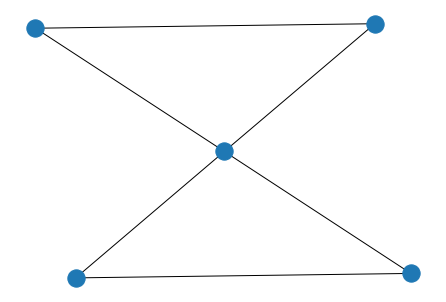

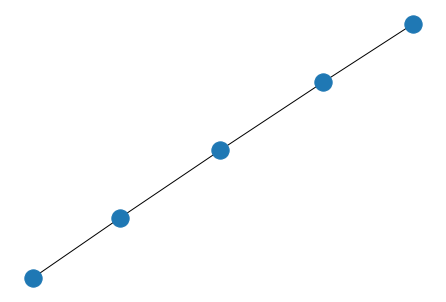

In [176]:
# import matplotlib.pyplot as plt
# %matplotlib inline
# G = nx.from_edgelist([[1,2],[2,3],[3,1],[3,4],[4,5],[5,3]])

# nx.draw(G)
# plt.show()

# G_new = xu.remove_cycle(G)
# nx.draw(G_new)
# plt.show()






# # max_iterations = 1000
                
# # for i in range(max_iterations): 
# #     try:
# #         edges_in_cycle = nx.find_cycle(G)
# #         print(f"edges_in_cycle = {edges_in_cycle}")
# #         #not doing random deletion just picking first edge
# #         picked_edge_to_delete = edges_in_cycle[0]
# #         print(f"picked_edge_to_delete = {picked_edge_to_delete}")
# #         G.remove_edge(picked_edge_to_delete[0],picked_edge_to_delete[-1])
# #         nx.draw(G)
# #         plt.show()
# #     except:
# #         break

# # try:
# #     edges_in_cycle = nx.find_cycle(G)
# # except:
# #     pass
        

# # nx.draw(G)

In [143]:
# sk.graph_skeleton_and_mesh(
#     #other_meshes=[curr_limb_mesh],
#                            other_skeletons=[curr_branch_sk, curr_limb_sk],
#     other_skeletons_colors=["black","grey"]
# )

In [129]:
# def get_skeletal_distance_debug(main_mesh,edges,
#                                  buffer=0.01,
#                                 bbox_ratio=1.2,
#                                distance_threshold=3000,
#                                 print_flag=False):
#     """
#     Purpose: To return the histogram of distances along a mesh subtraction process
#     so that we could evenutally find an adaptive distance threshold
    
    
#     """

    
#     main_mesh_bbox_restricted = main_mesh
#     faces_bbox_inclusion = np.arange(0,len(main_mesh.faces))

    
#     start_time = time.time()
#     face_subtract_indices = []
    
#     edge_loop_print=True
#     total_distances = []
#     total_distances_std = []
#     for i,ex_edge in tqdm(enumerate(edges)):
#         #print("\n------ New loop ------")
#         #print(ex_edge)
        
#         # ----------- creating edge and checking distance ----- #
#         loop_start = time.time()
        
#         edge_line = ex_edge[1] - ex_edge[0]
#         sum_threshold = 0.001
#         if np.sum(np.abs(edge_line)) < sum_threshold:
#             if edge_loop_print:
#                 print(f"edge number {i}, {ex_edge}: has sum less than {sum_threshold} so skipping")
#             continue
        
#         cob_edge = change_basis_matrix(edge_line)
        
#         #get the limits of the example edge itself that should be cutoff
#         edge_trans = (cob_edge@ex_edge.T)
#         #slice_range = np.sort((cob_edge@ex_edge.T)[2,:])
#         slice_range = np.sort(edge_trans[2,:])

#         # adding the buffer to the slice range
#         slice_range_buffer = slice_range + np.array([-buffer,buffer])

#         # generate face midpoints from the triangles
#         #face_midpoints = np.mean(main_mesh_bbox_restricted.vertices[main_mesh_bbox_restricted.faces],axis=1) # Old way
#         face_midpoints = main_mesh_bbox_restricted.triangles_center
        
        
#         #get the face midpoints that fall within the slice (by lookig at the z component)
#         fac_midpoints_trans = cob_edge@face_midpoints.T
        
#         slice_mask_pre_distance = ((fac_midpoints_trans[2,:]>slice_range_buffer[0]) & 
#                       (fac_midpoints_trans[2,:]<slice_range_buffer[1]))

#         edge_midpoint = np.mean(edge_trans.T,axis=0)
#         distance_check = np.linalg.norm((fac_midpoints_trans.T)[:,:2] - edge_midpoint[:2],axis=1) < distance_threshold
        
#         slice_mask = slice_mask_pre_distance & distance_check
        
#         face_list = np.arange(0,len(main_mesh_bbox_restricted.faces))[slice_mask]

#         #get the submesh of valid faces within the slice
#         if len(face_list)>0:
#             main_mesh_sub = main_mesh_bbox_restricted.submesh([face_list],append=True)
#         else:
#             main_mesh_sub = []

#         if type(main_mesh_sub) != type(trimesh.Trimesh()):
#             if edge_loop_print:
#                 print(f"THERE WERE NO FACES THAT FIT THE DISTANCE ({distance_threshold}) and Z transform requirements")
#                 print("So just skipping this edge")
#             continue


#         #get all disconnected mesh pieces of the submesh and the face indices for lookup later
#         sub_components,sub_components_face_indexes = tu.split(main_mesh_sub,only_watertight=False)
       
        
        
#         if type(sub_components) != type(np.array([])) and type(sub_components) != list:
#             #print(f"meshes = {sub_components}, with type = {type(sub_components)}")
#             if type(sub_components) == type(trimesh.Trimesh()) :
#                 sub_components = [sub_components]
#             else:
#                 raise Exception("The sub_components were not an array, list or trimesh")
        

#         #getting the indices of the submeshes whose bounding box contain the edge 
#         contains_points_results = np.array([s_comp.bounding_box.contains(ex_edge.reshape(-1,3)) for s_comp in sub_components])
        
#         containing_indices = (np.arange(0,len(sub_components)))[np.sum(contains_points_results,axis=1) >= len(ex_edge)]
#         try:
#             if len(containing_indices) != 1: 
#                 if edge_loop_print:
#                     print(f"--> Not exactly one containing mesh: {containing_indices}")
#                 if len(containing_indices) > 1:
#                     sub_components_inner = sub_components[containing_indices]
#                     sub_components_face_indexes_inner = sub_components_face_indexes[containing_indices]
#                 else:
#                     sub_components_inner = sub_components
#                     sub_components_face_indexes_inner = sub_components_face_indexes

#                 #get the center of the edge
#                 edge_center = np.mean(ex_edge,axis=0)
#                 #print(f"edge_center = {edge_center}")

#                 #find the distance between eacch bbox center and the edge center
#                 bbox_centers = [np.mean(k.bounds,axis=0) for k in sub_components_inner]
#                 #print(f"bbox_centers = {bbox_centers}")
#                 closest_bbox = np.argmin([np.linalg.norm(edge_center-b_center) for b_center in bbox_centers])
#                 #print(f"bbox_distance = {closest_bbox}")
#                 edge_skeleton_faces = faces_bbox_inclusion[face_list[sub_components_face_indexes_inner[closest_bbox]]]


#             else:# when only one viable submesh piece and just using that sole index
#                 edge_skeleton_faces = faces_bbox_inclusion[face_list[sub_components_face_indexes[containing_indices[0]]]]
#         except:
#             print(f"sub_components = {sub_components}")
#             print(f"containing_indices = {containing_indices}")
#             print(f"sub_components_face_indexes (from the split) = {sub_components_face_indexes}")
#             raise Exception("Error occured")

#         #visualize the faces for each skeletonization: 
#         print(f"Demonstrating edges {i} with submesh face size of {len(edge_skeleton_faces)}")
#         sk.graph_skeleton_and_mesh(other_skeletons=[ex_edge],
#                                   other_meshes=[main_mesh.submesh([edge_skeleton_faces],only_watertight=False,append=True)
#                                       ])

#         if len(edge_skeleton_faces) < 0:
#             print(f"****** Warning the edge index {i}: had no faces in the edge_skeleton_faces*******")
#         face_subtract_indices.append(edge_skeleton_faces)
        
        
#         #---- calculating the relevant distances ---- #
        
#         face_midpoints = (main_mesh_bbox_restricted.triangles_center)[edge_skeleton_faces]
#         #print(f"edge_skeleton_faces.shape = {edge_skeleton_faces.shape}")
# #         print(f"cob_edge = {cob_edge}")
# #         print(f"face_midpoints = {face_midpoints.shape}")
# #         print(f"sub_components = {sub_components}")
# #         print(f"containing_indices = {containing_indices}")
# #         print(f"sub_components_face_indexes (from the split) = {sub_components_face_indexes}")
#         #Exception("failed on fac_midpoints_trans")
        
#         fac_midpoints_trans = cob_edge@face_midpoints.T
        
            
#         #print(f"fac_midpoints_trans.shape = {fac_midpoints_trans.shape}")
#         mesh_slice_distances = np.linalg.norm((fac_midpoints_trans.T)[:,:2] - edge_midpoint[:2],axis=1)
#         #print(f"mesh_slice_distances.shape = {mesh_slice_distances.shape}")
        
#         total_distances.append(np.mean(mesh_slice_distances))
#         total_distances_std.append(np.std(mesh_slice_distances))
    
    
    
    
#     if len(face_subtract_indices)>0:
#         all_removed_faces = np.concatenate(face_subtract_indices)

#         unique_removed_faces = np.array(list(set(all_removed_faces)))
        
#         print(f"All of the submeshes together {len(unique_removed_faces)}")
#         sk.graph_skeleton_and_mesh(other_skeletons=[ex_edge],
#                                   other_meshes=[main_mesh.submesh([unique_removed_faces],only_watertight=False,append=True)
#                                       ])
        
#         if len(unique_removed_faces) <= 1:
#             print(f"Distance of skeleton = {sk.calculate_skeleton_distance(edges)}")
#             raise Exception(f"unique_removed_faces = {unique_removed_faces}")
            
            

#         #faces_to_keep = set(np.arange(0,len(main_mesh.faces))).difference(unique_removed_faces)
#         new_submesh = main_mesh.submesh([unique_removed_faces],only_watertight=False,append=True)
        
#         split_meshes,components_faces = tu.split(new_submesh,return_components=True)
        
        
#         #don't just want to take the biggest mesh: but want to take the one that has the most of the skeleton
#         #piece corresponding to it
        
#         """
#         Pseudocode: 
#         1) turn all of the mesh edge_skeleton_faces into meshes, have the main mesh be the whole mesh and 
#         have each of the mesh pieces be a central piece
#         2) Call the mesh_pieces_connectivity function and see how many of the periphery pieces are touching each of the submehses
#         3) Pick the mesh that has the most 
        
#         """
        
#         if len(split_meshes) > 1: 
#             branch_touching_number = []
#             branch_correspondence_meshes = [main_mesh.submesh([k],only_watertight=False,append=True) for k in face_subtract_indices]
#             for curr_central_piece in split_meshes:
#                 touching_periphery_pieces =tu. mesh_pieces_connectivity(
#                                             main_mesh = new_submesh,
#                                             central_piece = curr_central_piece,
#                                             periphery_pieces = branch_correspondence_meshes,
#                                             return_vertices=False)
#                 branch_touching_number.append(len(touching_periphery_pieces))
#                 print(f"branch_touching_number = {branch_touching_number}")
            
#             #find the argmax
#             most_branch_containing_piece = np.argmax(branch_touching_number)
#             print(f"most_branch_containing_piece = {most_branch_containing_piece}")
            
#             new_submesh = split_meshes[most_branch_containing_piece]
#             unique_removed_faces = unique_removed_faces[components_faces[most_branch_containing_piece]]
            
#         elif len(split_meshes) == 1: 
#             new_submesh = split_meshes[0]
#             unique_removed_faces = unique_removed_faces[components_faces[0]]
#         else:
#             raise Exception("The split meshes in the mesh correspondence was 0 length")
        
#         #need to further restric the unique_removed_faces to those of most significant piece
    
#     else:
#         unique_removed_faces = np.array([])
#         new_submesh = trimesh.Trimesh()
 
    
    
#     return total_distances,total_distances_std,new_submesh,np.array(unique_removed_faces)

In [135]:
# sk.graph_skeleton_and_mesh(other_meshes=[
#     #curr_limb_mesh.submesh([mesh_correspondence_indices],append=True),
#                                   mesh_correspondence_2
# ],
#                            other_meshes_colors="random",
#                           other_skeletons=[
#                               curr_branch_sk,
#                               new_skeleton
#                           ],
#                           other_skeletons_colors="random")

In [131]:
# # curr_branch_face_correspondence, width_from_skeleton = cu.mesh_correspondence_adaptive_distance(curr_branch_sk,
# #                                           curr_limb_mesh,
# #                                          skeleton_segment_width = 1000)


# # curr_b

# from skeleton_utils import *
# from compartment_utils import *

# curr_branch_skeleton = curr_branch_sk
# curr_branch_mesh = curr_limb_mesh
# skeleton_segment_width = 1000

# #making the skeletons resized to 1000 widths and then can use outlier finding

# new_skeleton  = sk.resize_skeleton_branch(curr_branch_skeleton,segment_width = skeleton_segment_width)

# (segment_skeletal_mean_distances,
#  segment_skeletal_std_distances,
#  mesh_correspondence,
#  mesh_correspondence_indices) = get_skeletal_distance_debug(
#                     main_mesh = curr_branch_mesh,
#                     edges = new_skeleton,
#                     buffer=100,
#                     bbox_ratio=1.2,
#                     distance_threshold=3000,
#                     print_flag=False
# )

# if len(mesh_correspondence_indices)== 0:
#     print("empty mesh_correspondence_indices returned so returning an empty array")
#     #return []
#     raise Exception("return")


# #now use the new submesh to calculate the new threshold
# # -- Step where I compute the new threshold and and then rerun it -- #
# if len(segment_skeletal_mean_distances) > 4:
#     filtered_measurements = np.array(segment_skeletal_mean_distances[1:-1])
#     filtered_measurements_std = np.array(segment_skeletal_std_distances[1:-1])
# else:
#     filtered_measurements = np.array(segment_skeletal_mean_distances)
#     filtered_measurements_std = np.array(segment_skeletal_std_distances)



# #filter out the other outliers: do anything higher than 150% of median should be discounted
# median_value = np.median(filtered_measurements)
# outlier_mask = filtered_measurements < median_value*1.5
# filtered_measurements = filtered_measurements[outlier_mask]
# filtered_measurements_std = filtered_measurements_std[outlier_mask]

# print(f"filtered_measurements = {filtered_measurements}")

# np.mean(filtered_measurements),np.std(filtered_measurements)

# # try the mesh subtraction again 
# buffer = 100

# total_threshold = np.max(filtered_measurements) + 2*np.max(filtered_measurements_std)
# print(f"new_threshold = {total_threshold}")
# (segment_skeletal_mean_distances_2,
#  filtered_measurements_std,
#  mesh_correspondence_2,
#  mesh_correspondence_indices_2) = get_skeletal_distance_debug(
#                     main_mesh = mesh_correspondence,
#                     edges = new_skeleton,
#                     buffer=100,
#                     bbox_ratio=1.2,
#                     distance_threshold=total_threshold,
#                     print_flag=False
# )

# if len(mesh_correspondence_indices_2) == 0:
#     print("empty mesh_correspondence_indices_2 returned so returning an empty array")
#     raise Exception("return")
#     #return []


# #want to show the changes in mesh
# #     sk.graph_skeleton_and_mesh(other_meshes = [curr_branch_mesh.submesh([mesh_correspondence_indices],append=True)])
# #     sk.graph_skeleton_and_mesh(other_meshes = [curr_branch_mesh.submesh([mesh_correspondence_indices[mesh_correspondence_indices_2]],append=True)])

# # PROBLEM NOT PASSING BACK A CONNECTED COMPONENT

# #return mesh_correspondence_indices[mesh_correspondence_indices_2], total_threshold


Demonstrating edges 0 with submesh face size of 41


Demonstrating edges 1 with submesh face size of 35


Demonstrating edges 2 with submesh face size of 39


Demonstrating edges 3 with submesh face size of 41


--> Not exactly one containing mesh: []
Demonstrating edges 4 with submesh face size of 34


Demonstrating edges 5 with submesh face size of 490



All of the submeshes together 658


Total time for mesh mapping: 0.0020024776458740234
Total time for mesh mapping: 0.0029668807983398438
Total time for mesh mapping: 0.002931833267211914
Total time for mesh mapping: 0.002870321273803711
Total time for mesh mapping: 0.0029151439666748047
Total time for mesh mapping: 0.0029664039611816406
Total time for mesh mapping: 0.0030319690704345703
branch_touching_number = [1]
Total time for mesh mapping: 0.0020477771759033203
Total time for mesh mapping: 0.0026912689208984375
Total time for mesh mapping: 0.002718687057495117
Total time for mesh mapping: 0.002351522445678711
Total time for mesh mapping: 0.00017023086547851562
Total time for mesh mapping: 0.0001537799835205078
Total time for mesh mapping: 0.00020933151245117188
branch_touching_number = [1, 5]
most_branch_containing_piece = 1
filtered_measurements = [ 92.87186822 102.58412175 132.7348828 ]
new_threshold = 255.24633635237416


Demonstrating edges 0 with submesh face size of 41


Demonstrating edges 1 with submesh face size of 35


Demonstrating edges 2 with submesh face size of 39


Demonstrating edges 3 with submesh face size of 41


--> Not exactly one containing mesh: []
Demonstrating edges 4 with submesh face size of 20


THERE WERE NO FACES THAT FIT THE DISTANCE (255.24633635237416) and Z transform requirements
So just skipping this edge

All of the submeshes together 154


# Decomposing of limbs into branches and finding mesh correspondence (using adaptive mesh correspondence followed by a water fill for conflict and empty faces), plus visualization at end

In [183]:
sk = reload(sk)
xu = reload(xu)
output_data = sk.decompose_skeleton_to_branches(curr_limb_sk)
output_data

type(branch_subgraph) = <class 'networkx_utils.GraphOrderedEdges'>
in remove edge


[array([[[667313. , 991945. , 918723. ],
         [667366. , 991951. , 918725. ]],
 
        [[667366. , 991951. , 918725. ],
         [668277. , 991454. , 919260. ]],
 
        [[668277. , 991454. , 919260. ],
         [668322. , 991408. , 919327. ]],
 
        [[668322. , 991408. , 919327. ],
         [668327. , 991267. , 920084. ]],
 
        [[668327. , 991267. , 920084. ],
         [668330. , 991247. , 920133. ]],
 
        [[668330. , 991247. , 920133. ],
         [668336. , 991207. , 920213. ]],
 
        [[668336. , 991207. , 920213. ],
         [668481.4, 991372.9, 920299.4]],
 
        [[668391.1, 991038.1, 920396.9],
         [668430.2, 990804.3, 920511.9]],
 
        [[668391.1, 991038.1, 920396.9],
         [668481.4, 991372.9, 920299.4]],
 
        [[668430.2, 990804.3, 920511.9],
         [668537.4, 990724.4, 920826.8]],
 
        [[668537.4, 990724.4, 920826.8],
         [668755.6, 990428.7, 921117.2]],
 
        [[668755.6, 990428.7, 921117.2],
         [668880. , 9902

In [288]:
limb_correspondence[limb_idx][2]

{'branch_skeleton': array([[[ 544235., 1035470.,  907392.],
         [ 544445., 1035310.,  907357.]],
 
        [[ 544445., 1035310.,  907357.],
         [ 544726., 1035100.,  907286.]],
 
        [[ 544726., 1035100.,  907286.],
         [ 545127., 1034930.,  907313.]],
 
        [[ 545127., 1034930.,  907313.],
         [ 545469., 1034900.,  907332.]],
 
        [[ 545469., 1034900.,  907332.],
         [ 545683., 1034860.,  907336.]],
 
        [[ 545683., 1034860.,  907336.],
         [ 545845., 1034850.,  907360.]],
 
        [[ 545845., 1034850.,  907360.],
         [ 546206., 1034790.,  907387.]],
 
        [[ 546206., 1034790.,  907387.],
         [ 546567., 1034750.,  907402.]],
 
        [[ 546567., 1034750.,  907402.],
         [ 546900., 1034590.,  907240.]],
 
        [[ 546900., 1034590.,  907240.],
         [ 547332., 1034350.,  906963.]],
 
        [[ 547332., 1034350.,  906963.],
         [ 547727., 1033970.,  906584.]],
 
        [[ 547727., 1033970.,  906584.],
     

In [184]:
sk = reload(sk)
tu = reload(tu)
cu = reload(cu)
from tqdm.notebook import tqdm
import time
import itertools

start_time = time.time()

limb_correspondence = dict()
soma_containing_idx= 0

total_branch_meshes = []
total_branch_skeletons = []

empty_submeshes = []
for soma_containing_idx in current_mesh_data.keys():
    for limb_idx,curr_limb_mesh in enumerate(current_mesh_data[soma_containing_idx]["branch_meshes"]):
        print(f"Working on limb #{limb_idx}")
        limb_correspondence[limb_idx] = dict()
        curr_limb_sk = current_mesh_data[soma_containing_idx]["branch_skeletons_cleaned"][limb_idx]
        curr_limb_branches_sk_uneven = sk.decompose_skeleton_to_branches(curr_limb_sk) #the line that is decomposing to branches
        
        for j,curr_branch_sk in tqdm(enumerate(curr_limb_branches_sk_uneven)):
            limb_correspondence[limb_idx][j] = dict()
            
            
            curr_branch_face_correspondence, width_from_skeleton = cu.mesh_correspondence_adaptive_distance(curr_branch_sk,
                                          curr_limb_mesh,
                                         skeleton_segment_width = 1000)
            
            
            
            if len(curr_branch_face_correspondence) > 0:
                curr_submesh = curr_limb_mesh.submesh([list(curr_branch_face_correspondence)],append=True)
            else:
                curr_submesh = trimesh.Trimesh(vertices=np.array([]),faces=np.array([]))
                
            limb_correspondence[limb_idx][j]["branch_skeleton"] = curr_branch_sk
            limb_correspondence[limb_idx][j]["correspondence_mesh"] = curr_submesh
            limb_correspondence[limb_idx][j]["correspondence_face_idx"] = curr_branch_face_correspondence
            limb_correspondence[limb_idx][j]["width_from_skeleton"] = width_from_skeleton
            
            total_branch_meshes.append(curr_submesh)
            total_branch_skeletons.append(curr_branch_sk)
            
            if len(curr_submesh.faces) == 0:
                empty_submeshes.append(dict(limb_idx=limb_idx,branch_number=j))
            
            
print(f"Total time = {time.time() - start_time}")

Working on limb #0



filtered_measurements = [365.19069513 286.99632414 261.82150909 307.95553712 246.6540973
 172.74950642 120.28276742 258.42756274 168.27700768 188.67222217
 214.02459551 183.57903486 235.28162409 343.13384562 343.615656
 218.10170677 297.66397273 369.96809797 280.57535155 334.61256178
 328.37153236 434.04490442 378.84983727 215.40302228 399.00384788
 444.20650245 308.97241914 249.76715385 304.19247623 451.87190405
 253.13750384 205.07322843 176.65196547 338.67021197 376.90805095
 243.18558959]
new_threshold = 1156.6476613909847


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

Total time for mesh mapping: 0.0011110305786132812
Total time for mesh mapping: 0.0003619194030761719
Total time for mesh mapping: 0.00030922889709472656
Total time for mesh mapping: 0.0003361701965332031
Total time for mesh mapping: 0.00032830238342285156
Total time for mesh mapping: 0.00021910667419433594
Total time for mesh mapping: 0.0002219676971435547
Total time for mesh mapping: 0.00023031234741210938
Total time for mesh mapping: 0.00022220611572265625
Total time for mesh mapping: 0.0002262592315673828
Total time for mesh mapping: 0.00022649765014648438
Total time for mesh mapping: 0.00023603439331054688
Total time for mesh mapping: 0.00043010711669921875
branch_touching_number = [11]
Total time for mesh mapping: 0.002168416976928711
Total time for mesh mapping: 0.0033326148986816406
Total time for mesh mapping: 0.003258943557739258
Total time for mesh mapping

--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
THERE WERE NO FACES THAT FIT THE DISTANCE (271.092177547445) and Z transform requirements
So just skipping this edge

Total time for mesh mapping: 0.00045418739318847656
Total time for mesh mapping: 0.0004150867462158203
Total time for mesh mapping: 0.00037741661071777344
Total time for mesh mapping: 0.0005095005035400391
Total time for mesh mapping: 0.00035071372985839844
Total time for mesh mapping: 0.0003750324249267578
Total time for mesh mapping: 0.00037860870361328125
Total time for mesh mapping: 0.00037384033203125
Total time for mesh mapping: 0.0005674362182617188
Total time for mesh mapping: 0.0004115104675292969
Total time for mesh mapping: 0.0003859996795654297
Total time for mesh mapping: 0.00036597251892089844
branch_touching_number = [7]
Total time for mesh mapping: 0.0004439353942871094
Total time for mesh mapping: 0.00018477439880371094
Total time for 


filtered_measurements = [581.24610142 311.94822499 456.59988658 661.66349479]
new_threshold = 1664.3941441067975



filtered_measurements = [358.57799102 305.44850287 300.54952981 284.09490917 229.9197868
 257.43537191 472.84733388 337.02921924 247.27541907 445.56550499
 266.23390719]
new_threshold = 1064.8200289593287


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

filtered_measurements = [ 78.21522969  83.63421303  87.89345231  90.46841782 132.61838105]
new_threshold = 220.43436423389568


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

Total time for mesh mapping: 0.0018923282623291016
Total time for mesh mapping: 0.00026345252990722656
Total time for mesh mapping: 0.00025153160095214844
Total time for mesh mapping: 0.00022673606872558594
Total time for mesh mapping: 0.0002532005310058594
Total time for mesh mapping: 0.0002510547637939453
Total time for mesh mapping: 0.0002262592315673828
Total time for mesh mapping: 0.00021386146545410156
Total time for mesh mapping: 0.0002117156982421875
Total time for mesh mapping: 0.0003418922424316406
Total time for mesh mapping: 0.00019311904907226562
branch_touching_number = [7]
Total time for mesh mapping: 0.00037789344787597656
Total time for mesh mapping: 0.0001704692840576172
Total time for mesh mapping: 0.0001533031463623047
Total time for mesh mapping: 0.00014162063598632812
Total time for mesh mapping: 0.0001440

--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

Total time for mesh mapping: 0.003253459930419922
Total time for mesh mapping: 0.004075765609741211
Total time for mesh mapping: 0.0043926239013671875
Total time for mesh mapping: 0.00580143928527832
Total time for mesh mapping: 0.0027408599853515625
Total time for mesh mapping: 0.0012469291687011719
Total time for mesh mapping: 0.00023651123046875
Total time for mesh mapping: 0.000217437744140625
Total time for mesh mapping: 0.0004165172576904297
Total time for mesh mapping: 0.0002772808074951172
Total time for mesh mapping: 0.0002238750457763672
Total time for mesh mapping: 0.00023436546325683594
Total time for mesh mapping: 0.00025582313537597656
Total time for mesh mapping: 0.0002617835998535156
Total time for mesh mapping: 0.0002541542053222656
Total time for mesh mapping: 0.00023484230041503906
Total time for mesh mapping: 0.00022172927856445312
Total time for mesh mapping: 0.0002353191375732422
Tota

--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []




filtered_measurements = [195.81956741 205.79869926  99.51065576 150.93039508]
new_threshold = 420.03294964986685



filtered_measurements = [222.51074922 207.20659215]
new_threshold = 361.87801775617544



filtered_measurements = [594.09560595 330.06180065 465.01968406 421.59757798 404.85744568
 373.43806429 429.68837776 295.71810745 331.36049839 337.46913881
 510.98368254 467.2139048  476.00332687 337.71064255 582.94233262
 295.28811254 457.6467573  352.50599133 401.17322447 369.04710743
 381.5884991  275.70688573 237.63206907 313.23353357 386.74316451
 485.74294213 472.56129915 362.1717051  292.36712651 241.96230028
 455.61366321 413.7222177  300.71938278 330.23201418 315.59749696
 247.86509985 278.76369349 532.47330363 437.87562078 469.16716928
 368.18295773 434.07006344 382.42530965 539.70790556 333.83563851
 599.62695055 410.94551973 417.75019719 313.20539231 496.68316202
 468.0836296  295.22851057 373.18156742 358.8949647  466.33453822
 328.77033226]
new_threshold = 1540.9337981610788


--> Not exactly one containing mesh: []

Total time for mesh mapping: 0.002061128616333008
Total time for mesh mapping: 0.0010912418365478516
Total time for mesh mapping: 0.000400543212890625
Total time for mesh mapping: 0.0002872943878173828
Total time for mesh mapping: 0.0006501674652099609
Total time for mesh mapping: 0.0003323554992675781
Total time for mesh mapping: 0.00028514862060546875
Total time for mesh mapping: 0.00028228759765625
Total time for mesh mapping: 0.0003218650817871094
Total time for mesh mapping: 0.0003216266632080078
Total time for mesh mapping: 0.0004487037658691406
Total time for mesh mapping: 0.0003292560577392578
Total time for mesh mapping: 0.0003681182861328125
Total time for mesh mapping: 0.00032329559326171875
Total time for mesh mapping: 0.0003268718719482422
Total time for mesh mapping: 0.0003180503845214844
Total time for mesh mapping: 0.00031638145446777344
Total time for mesh mapping: 0.0003085136413574219
Total time for mesh mapping: 0.00032114982

--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []



--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

filtered_measurements = [146.33355367 139.7046133   71.58518364  66.52066596  93.76038539
  64.2358187   98.31121508 128.35619898 110.07996268 140.17361169]
new_threshold = 255.70015129324855


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
THERE WERE NO FACES THAT FIT THE DISTANCE (255.70015129324855) and Z transform requirements
So just skipping this edge

Total time for mesh mapping: 0.0007655620574951172
Total time for mesh mapping: 0.00023865699768066406
Total time for mesh mapping: 0.00023508071899414062
Total time for mesh mapping: 0.0002205371856689453
Total time for mesh mapping: 0.00020956993103027344
Total time for mesh mapping: 0.00021123886108398438
Total time for mesh mapping: 0.0002110004425048828
Total time for mesh mapping: 0.0002052783966064453
Total time for mesh mapping: 0.00021839141845703125
Total time for mesh mapping: 0.00021886825561523438
Total time for mesh mapping: 0.00020885467529296875
Total time for mesh mapping: 0.00033926963806152344
Total time for mesh mapping: 0.00020360946655273438
Total time for mesh mapping: 0.0002346038818359375
branch_touching_number = [11]
Total t


filtered_measurements = [377.54552578 425.50911917 671.08829183 534.36189491 789.82595893
 499.98346968 487.4640897  454.15281808 781.64169523 783.78790474
 521.81777325 496.07313257 569.05657233 530.58822628 728.75962578
 437.02003708 525.35568373 465.49234934 566.30286204 621.28921524
 412.18479366 477.14109169 739.48191434 376.217481   464.5454248
 414.86125732 615.11227914 482.30940453 667.55488635 535.68038326
 747.17187696 445.47500476 520.49715849 519.72628697 771.24378829
 496.31426699]
new_threshold = 2093.238220250746


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

Total time for mesh mapping: 0.004739522933959961
Total time for mesh mapping: 0.007447481155395508
Total time for mesh mapping: 0.011520862579345703
Total time for mesh mapping: 0.0017938613891601562
Total time for mesh mapping: 0.0002758502960205078
Total time for mesh mapping: 0.0003159046173095703
Total time for mesh mapping: 0.0002911090850830078
Total time for mesh mapping: 0.0003724098205566406
Total time for mesh mapping: 0.0002491474151611328
Total time for mesh mapping: 0.00026988983154296875
Total time for mesh mapping: 0.00024271011352539062
Total time for mesh mapping: 0.0002620220184326172
Total time for mesh mapping: 0.0002856254577636719
Total time for mesh mapping: 0.0002532005310058594
Total time for mesh mapping: 0.0002453327178955078
Total time for mesh mapping: 0.00026726722717285156
Total time for mesh mapping: 0.0003058910369873047
Total time f

--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
THERE WERE NO FACES THAT FIT THE DISTANCE (520.8111024178575) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (520.8111024178575) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (520.8111024178575) and Z transform requirements
So just skipping this edge




filtered_measurements = [638.34034842 471.73839918]
new_threshold = 1347.7923936913758


--> Not exactly one containing mesh: []

filtered_measurements = [159.43128878 363.84114359 306.07679646 370.15641045]
new_threshold = 969.3285853384839


--> Not exactly one containing mesh: []



--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: [0 2]

filtered_measurements = [ 97.43682331 138.97957668 139.76982986 112.66364726  94.60279182
  84.55593556  97.96482283 107.16513636  62.55341282 119.87545123
 129.90400546  93.98765939 111.15600106  86.35821102  78.71137921
  82.34693432  65.34462437  96.83817346 105.91888959  98.129658
 106.33812317 108.3691091   88.16659769  71.21119623  83.45541629
 114.68997024 101.24290396 105.45653474 112.50863755 124.52929688
 100.44033077 130.72624554 155.25907523 118.78856391 108.28442506
 113.01402455 120.62625407  79.66869852  88.55570731 113.55975525
 106.29989717  96.07481639  80.50284778  62.60362446  84.79996739
 117.80885638  82.09

--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []


No adjacent faces detected! Did you merge vertices?


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

Total time for mesh mapping: 0.0038280487060546875
Total time for mesh mapping: 0.0003807544708251953
Total time for mesh mapping: 0.00034117698669433594
Total time for mesh mapping: 0.00039315223693847656
Total time for mesh mapping: 0.00044608116149902344
Total time for mesh mapping: 0.0004603862762451172
Total time for mesh mapping: 0.000339508056640625
Total time for mesh mapping: 0.0003445148468017578
Total time for mesh mapping: 0.0003581047058105469
Total time for mesh mapping: 0.0003521442413330078
Total time for mesh mapping: 0.0005054473876953125
Total time for mesh mapping: 0.000347137451171875
Total time for mesh mapping: 0.0003337860107421875
Total time for mesh mapping: 0.0002987384796142578
Total time for mesh mapping: 0.0003139972686


filtered_measurements = [816.80441294 452.11497784 502.43305609 387.11050963 418.61121681
 521.36157372 522.39363276 808.03163055 449.21787212 782.61590736
 649.98850903 621.39056975 586.67451533 495.67516058 752.3083335
 389.53341956 374.50209766 404.16488157 374.67122835 536.57872891
 693.86910075 657.63224797 758.21188866 731.51011258 606.751906
 558.46598444 403.69556057 692.70670795 668.48616722 734.1408504
 441.37313676 554.18852893 659.62050541 460.48429811 595.5046171
 676.94636388 513.13307789 517.3980654  509.12761353 545.39278562
 583.54953976 352.18586135 432.19783892 665.5588056  548.22825891
 568.92858338 452.74519509 495.50984671 590.22559729]
new_threshold = 1968.5674255736149



filtered_measurements = [118.31481162 196.69350378 271.05250198 213.52782771 490.65175602
 576.03617439 388.35189778 541.35624338 623.31826275 502.51239809
 577.93646764 213.83228302 605.21046224 292.97647579 508.20004491
 353.80389003 232.73770344 391.89214849 266.64296312 615.69854618
 236.39991805 367.8529858  475.12466111 496.7384403  552.6065949
 480.87431629 246.05609485 206.89441305 449.66137523 454.5413067
 322.39717649 319.60902184 365.9174428  318.18351069 517.49236706
 345.33245791 489.53425467 571.392305   358.61781653 444.36133028
 358.78727037 332.79585134 337.73994921 473.44303269 415.31312728
 362.02482554 479.98777674 423.24675221 380.16150791 330.00446125
 369.82592102 425.87817277 524.47503935 526.84817768 249.00057212
 615.90522692 534.20500666 591.08406482 524.39372185 393.07539646
 495.77193306 277.32706317 405.16087984 448.98952467 427.16425002
 377.8164974  333.68581566 355.23289064 558.48818833 317.22294469
 484.7599082  281.24347967 201.67658665 206.42945471 


filtered_measurements = [370.85267288 158.19273517 211.24191321 381.7983618  624.21462017
 324.14914433 281.63433635 408.07227409 527.41768311 428.91873381
 608.05700937 557.82551991 278.28251174 314.14565529 373.3432253
 551.65586243 299.54829732 449.53824053 448.64870096 377.38610539
 541.649762   458.84536052 482.64796065 559.40704689 409.59331414
 446.25656165 446.65426    404.94898516 428.23884558 475.1882658
 591.90307068 419.75768965 351.80786609 391.57581461 409.48122076
 462.2910472  366.23972206 469.61875115 470.47951288 425.49885734
 336.23798328 274.79164841 404.72800115 448.23316178 651.363058
 578.6051978  406.20244541 309.21457831 635.6397866  318.61518932
 496.89448461 586.30847742 437.13653109 591.13899729 418.5411945
 434.37265685 429.23078173 325.11887338 281.71346771 357.17437728
 639.20893157 631.85396775]
new_threshold = 1576.1020427387646



filtered_measurements = [736.65686549 890.18552794 745.85009219 485.86058371]
new_threshold = 1813.0827889117786



filtered_measurements = [584.97203469 463.86224409 555.90859218 552.98291014 472.33094523
 592.4297792  662.54101133 474.15740189 450.24888646 492.58973756
 512.59912072 504.15342973 510.08013868 432.88371862 435.17116228
 438.91962097 542.79265848 427.17136642 435.23288703 447.6074418
 570.04941388 559.23660645 635.2685     491.47011424 449.99392701
 482.06217384 577.2900586  654.46366912 441.2204574  454.96514937
 429.73724053 436.24851301 614.47010678 604.52955897 555.94656077]
new_threshold = 1432.287856021111



filtered_measurements = [340.05582302 334.57870004 558.75284974 539.39922799 394.75486295
 491.73420056 447.18765404 451.95894682 430.90856834 623.35847328
 719.03256819 495.87998405 368.75566517 592.62869953 523.29732386
 439.53804717 634.47764454 688.94967082 357.24547248 458.45731781
 805.79296285 328.309105   350.31132547 689.53684798 599.19522263
 728.32305662 712.72392168 315.10353107 434.44743958]
new_threshold = 1924.3682942408961



filtered_measurements = [603.62915278 313.99332003 328.4590703  501.23160938 370.0346471
 590.02029957 457.60375395 398.75554538 547.61210212 378.45181927
 764.47488632 551.03995098 380.90462996 559.64752839 452.19571132]
new_threshold = 1708.4352013380478



filtered_measurements = [ 67.3958638   58.26606652  67.25767815 106.72971943  98.2107474
 106.60363653  94.98947065  75.72295014 103.53933157 109.10573545
  80.79605365 118.14841068 110.9174638 ]
new_threshold = 222.28003865747326


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

Total time for mesh mapping: 0.0005242824554443359
Total time for mesh mapping: 0.0002307891845703125
Total time for mesh mapping: 0.0002193450927734375
Total time for mesh mapping: 0.00021958351135253906
Total time for mesh mapping: 0.00022101402282714844
Total time for mesh mapping: 0.0002238750457763672
Total time for mesh mapping: 0.00022149085998535156
Total time for mesh mapping: 0.00024008750915527344
Total time for mesh mapping: 0.0002300739288330078
Total time for mesh mapping: 0.0002186298370361328
Total time for mesh mapping: 0.00036215782165527344
Total time for mesh mapping: 0.0002300739288330078
Total time for mesh mapping: 0.0002238750457763672
Total time for mesh mapping: 0.0002276897430419922
Total time for mesh mapping: 0.00022983551025390625
Total time for mesh mapping: 0.00022482872009277344
Total time for mesh mapping: 0.00020647048950195312
branch_touching_number = [15]
Total time for


filtered_measurements = [475.64088429 657.0933626  474.41921999 416.41973787 403.97964588
 387.14604318 352.09434646 400.1881735  611.49263567 480.83988109
 333.55226133 599.59465823 407.11838618 512.34517958 683.16283379
 478.40276983 371.80462789 419.13113838]
new_threshold = 1744.628458083536


--> Not exactly one containing mesh: []



--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: [0 1]

filtered_measurements = [124.8211295  166.9044743  119.44249161 104.80002706  82.1086165
  76.37897358 140.10115683 139.67917017  93.35495782 105.94320187
  96.69159273  94.0912522   80.08091692 116.89221262  87.22483785
  83.67036006  92.0917228  100.82740317  90.66541332  99.68673806
 163.30317034 135.00769378]
new_threshold = 363.4128091940363


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []




filtered_measurements = [ 99.71319512 101.02014176 106.2672414  144.89155516 149.22289215
 131.30322094 102.82317846 106.71410498  95.79059169 116.19353548
 119.76770487 125.57822027 115.45385869  90.23723418 122.48546878
 126.13437201  87.32413942 184.80988477 180.51496393 163.1214925
 138.79248743 138.00157542]
new_threshold = 349.6214443205754


--> Not exactly one containing mesh: []



--> Not exactly one containing mesh: []

filtered_measurements = [576.79984368 450.07854353 516.39609284 493.78079744 545.88913321
 540.26815532 594.89898702 602.7271136  561.0585501  529.64298527
 489.86931882 529.05595045 530.18085246 559.33162133 803.63691212]
new_threshold = 1504.7722486095663


--> Not exactly one containing mesh: []
THERE WERE NO FACES THAT FIT THE DISTANCE (1504.7722486095663) and Z transform requirements
So just skipping this edge




filtered_measurements = [426.35163651 380.48460541 315.48002552 283.60605525 435.68648789
 390.09221493]
new_threshold = 878.9073267845719


--> Not exactly one containing mesh: []




filtered_measurements = [126.68675588  88.80933272]
new_threshold = 237.61167470466592


--> Not exactly one containing mesh: []

filtered_measurements = [119.06566207 106.04543899 175.28571662 166.59751526 131.33156494
 146.00162807 199.83403018 126.76618534 167.35174327 127.65174287
 136.15404437 171.93640818 138.17402244 143.29328749 139.60793381
 165.85455063 136.65867632 132.97753667]
new_threshold = 526.801982718611


--> Not exactly one containing mesh: []



--> Not exactly one containing mesh: []

filtered_measurements = [ 721.44656819  984.43450367  745.25821655  753.44426879  978.49188529
  876.06607803  869.57181044  784.76534929  947.15773693  866.06977388
 1014.7955277    67.92118836]
new_threshold = 2120.864432260999


--> Not exactly one containing mesh: []



--> Not exactly one containing mesh: [0 1]

filtered_measurements = [159.2706974   95.89589231 282.62364557 299.91312775 159.57528032
 127.46183606]
new_threshold = 601.65705561302



filtered_measurements = [400.10323786 489.04184499]
new_threshold = 1087.8529724686273



filtered_measurements = [ 955.73604634 1137.15786062 1222.11592791  854.69393613 1038.52207587
 1095.68011039 1101.87532336 1158.86822121 1134.06565412 1045.57388203
  939.10338708  963.64884354 1252.97626266 1069.56964122]
new_threshold = 2370.839670166147


--> Not exactly one containing mesh: []

Total time for mesh mapping: 0.004932880401611328
Total time for mesh mapping: 0.006171703338623047
Total time for mesh mapping: 0.007613182067871094
branch_touching_number = [1]
Total time for mesh mapping: 0.007754325866699219
Total time for mesh mapping: 0.0019545555114746094
Total time for mesh mapping: 0.0013670921325683594
branch_touching_number = [1, 1]
most_branch_containing_piece = 0
filtered_measurements = [556.54877554]
new_threshold = 1338.1566914194339


--> Not exactly one containing mesh: []




filtered_measurements = [ 97.73175359 103.19831133 104.29962262 102.39768531 130.71238224
 151.78933039  78.23069821]
new_threshold = 288.34954577785743


--> Not exactly one containing mesh: []



--> Not exactly one containing mesh: []

filtered_measurements = [ 263.61262903 1780.03937266 1892.44303941 1679.27647448 2277.62032075
 1836.87031579]
new_threshold = 4081.900640388353


--> Not exactly one containing mesh: []




filtered_measurements = [345.967104   561.07055659 479.83064856 361.26108958 348.67863334
 686.03654599 290.76224014 519.79766098 419.33657713 620.09994717
 308.35046834 397.13532331 470.81048133 519.80626833 358.73290177
 343.24619874 648.41557815 584.35437039 378.81617781 449.06540039
 342.85376774 344.90861778 402.9056639  607.41867796 444.31291966
 265.55130365 429.10173899 322.49173956 334.67207397 329.57647491
 412.75848439 709.90786281 553.01501182 295.94146618 369.24961978
 663.43666723 619.82580746 496.05920179 508.40485293 508.19890106
 472.12491913 502.54255069 555.27238148 581.21036743 411.18183571]
new_threshold = 1792.7212561023216



filtered_measurements = [1172.48529655 1174.21011537]
new_threshold = 2334.3618952264833



filtered_measurements = [1086.00045759  943.82898659 1049.72817388 1034.82346097  957.5093814
  943.44379922 1275.25812231 1131.4879027 ]
new_threshold = 2588.5441317038676



filtered_measurements = [ 983.44023307  906.00273679 1121.24623687  917.53088526  860.71316237
  859.79791186  957.4761829   977.43954204 1208.92985403  897.95252319
  969.8292844  1003.68439371 1035.38658226  955.95857137  872.45256732
  867.917593   1048.86805179  945.98086317 1040.96074281  923.08287805
  939.35030199 1013.17216835  968.70520364  918.4059674  1224.13306037
 1294.11148592]
new_threshold = 2606.9017658791945


--> Not exactly one containing mesh: []

filtered_measurements = [187.56291133 357.68772969]
new_threshold = 760.2532067353479


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

Total time for mesh mapping: 0.0004639625549316406
Total time for mesh mapping: 0.0003466606140136719
Total time for mesh mapping: 0.0002639293670654297
Total time for mesh mapping: 0.00020360946655273438
Total time for mesh mapping: 0.00035500526428222656
Total time for mesh mapping: 0.0002684593200683594
Total time for mesh mapping: 0.00027179718017578125
branch_touching_number = [3]
Total time for mesh mapping: 0.0010173320770263672
Total time for mesh mapping: 0.0002200603485107422
Total time for mesh mapping: 0.0001838207244873047
Total time for mesh mapping: 0.00014781951904296875
Total time for mesh mapping: 0.00017952919006347656
Total time for mesh mapping: 0.0001888275146484375
Total time for mesh mapping: 0.00018668174743652344
branch_touching_number = [3, 3]
most_branch_containing_piece = 0


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

filtered_measurements = [354.59141114 369.75216182 346.80859216 272.51193584 296.02577346
 328.56069997 463.72329124 577.70634524 464.39691279 354.60347177
 370.97908512 660.55455622 310.26083755 442.37048358 398.83793439
 499.25072225 617.63652609 487.27004106 548.80662773 319.7945963
 400.67424992 323.48200683 435.63480218 360.00686863 397.01326309
 651.73477069 504.65701124 333.99258658 267.34998809 411.98042183
 595.81119993 276.7668221  569.56734474 365.97825947 314.01744193
 408.93262951 611.6722103  576.19669578 512.73829161 473.90956913
 454.60791292 334.10617666 575.94790245 508.66768057 340.34209606
 361.03590565 466.29230084 422.36833886 409.27831689 356.03946526
 374.43302526 549.46146464 396.80315265 347.58685353 373.82255645
 388.97553077 412.27367156 458.32381155 339.12158707 672.53899734
 663.44153178 635.47596284 419.24335302 376.83812382]
new_threshold = 1836.511499865147


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []



--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

filtered_measurements = [2027.18188381 1532.08274681 1231.93036707 1261.42206511 1315.59881006
 1110.2537789  1118.62841491 1560.5188463  1465.86834206]
new_threshold = 3896.262121849267


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []




filtered_measurements = [2077.07894235 1823.04060791 1579.99575926 1523.37264264 1466.39521296
 1415.67607314 1391.93738598 1497.22420393 1461.34905899 1504.56133977]
new_threshold = 2735.10613866636



filtered_measurements = [1054.39497853 1282.35023601 1162.57275442 1019.29953025  990.786776
  908.53123737  965.7043824   955.03542254 1143.39138229]
new_threshold = 2391.2498166287996



filtered_measurements = [1109.43256915 1038.67367948 1135.55913912 1082.05304159 1271.20254669
 1029.48146355 1067.98151184 1336.56852219 1151.72733564 1149.76572327
  994.69870163  958.83560335 1457.23965008 1037.19120334  997.31417886
  976.14045165  987.47766407 1029.23236599 1216.92514761 1014.83375825
 1045.65834049 1079.70872861]
new_threshold = 2851.0020459246775


--> Not exactly one containing mesh: []

filtered_measurements = [284.15717221 645.22249826 313.85732249 392.76795767 275.67221987
 286.8185785  273.90373775 512.44082534 540.32538617 446.9531679
 341.28861711 350.22009143 482.13518802 428.91120324 416.40787644
 713.0116862  504.24890487 494.63655882 376.44662772 397.9316116
 741.87167356 732.45901257 511.6969875 ]
new_threshold = 1739.7902631372153


--> Not exactly one containing mesh: []




filtered_measurements = [1129.00118872 1016.97665659 1016.75534582 1007.04220833 1170.14405124
 1084.36965183 1256.6660116 ]
new_threshold = 2160.427445878592



filtered_measurements = [1377.63022637 1271.33705605 1287.7973004  1331.79359733 1484.00722067]
new_threshold = 1909.4840188604148



filtered_measurements = [1068.96668499  992.65137522  996.68426231 1067.43475263 1267.07250787]
new_threshold = 1853.7708362533122



filtered_measurements = [433.17440804 431.89322356 405.25866251 421.47723335 403.3468747
 369.29462793 564.73248251]
new_threshold = 946.5327519098873


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

Total time for mesh mapping: 0.0019316673278808594
Total time for mesh mapping: 0.00026607513427734375
Total time for mesh mapping: 0.00025653839111328125
Total time for mesh mapping: 0.0002493858337402344
Total time for mesh mapping: 0.0003762245178222656
Total time for mesh mapping: 0.0002605915069580078
Total time for mesh mapping: 0.00024437904357910156
Total time for mesh mapping: 0.0002467632293701172
Total time for mesh mapping: 0.0002422332763671875
Total time for mesh mapping: 0.0002529621124267578
Total time for mesh mapping: 0.0002658367156982422
Total time for mesh mapping: 0.0002675056457519531
Total time for mesh mapp

--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
THERE WERE NO FACES THAT FIT THE DISTANCE (468.00890490669065) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (468.00890490669065) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (468.00890490669065) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (468.00890490669065) and Z transform requirements
So just skipping this edge




filtered_measurements = [1382.96946921 1317.59399978 1230.70871521 1306.25892492 1269.86894093
 1312.59872038 1486.94537732]
new_threshold = 2181.331111371109



filtered_measurements = [ 67.77582991 131.53169005 202.86115357 236.78928208 187.48512995
  84.34838503  90.97561317]
new_threshold = 410.0326402127557


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

Total time for mesh mapping: 0.0019071102142333984
Total time for mesh mapping: 0.002141714096069336
Total time for mesh mapping: 0.00021791458129882812
Total time for mesh mapping: 0.00022745132446289062
Total time for mesh mapping: 0.0003294944763183594
Total time for mesh mapping: 0.00026702880859375
Total time for mesh mapping: 0.0002803802490234375
Total time for mesh mapping: 0.00024271011352539062
Total time for mesh mapping: 0.0002257823944091797
Total time for mesh mapping: 0.000232696533203125
Total time for mesh mapping: 0.000244140625
branch_touching_number = [9]
Total time for mesh mapping: 0.0003437995910644531
Total time for mesh mapping: 0.00023293495178222656
Total time for mesh mapping: 0.0002193450927734375
Total time for mesh mapping: 0.0002574920654296875
Total time for mesh mapping: 0.00026226043701171875
Total time for mesh mapping: 0.00029397010803222656
Total time for mesh mapping:


filtered_measurements = [227.04302809 209.10066619 271.06127052 293.7644166  350.88106554
 360.11291834 480.6044367  320.21002859 406.13844991 342.57930532
 362.91172534 331.761277   378.91966046 391.38238128 410.40014916
 291.75549236 273.92215782 289.83883679 221.56580216 293.50565634
 424.52332861 284.91119987 320.40097454 483.50179836 337.09646375
 308.9014604  284.15778439 365.99594345 471.47095587 391.12905004
 381.55577233 299.38338324 545.60640242 387.13052965 374.63584807
 486.59661965 547.1385394  359.3408403  336.75825631 400.52638754
 445.90716963 374.5199257  389.49915318 404.2645271  344.27833072
 293.74408844 269.49836463 468.0067134  501.34335774 418.00986119
 460.37247156 360.20162023 337.41841921 259.79393258 405.05389172
 335.7228211  309.00459908 213.01925367 228.54022208 283.81318144
 240.96127122 296.36186649 381.25400774 445.9459269  425.94033527
 440.77196389 436.8835934  355.83203616 346.88328736 536.24830508]
new_threshold = 1381.4729696443833


--> Not exactly one containing mesh: []




filtered_measurements = [421.76050576 347.79636365 342.33884707 536.69620039 437.38136228
 404.96285705 426.63898494 427.99800928 410.57394374 334.93156294
 581.09844807 337.41782706 391.42137229 422.96318961 354.24831174
 380.17000183 338.19057646 373.51500475 344.36046788 305.94618374
 351.62467204 380.90689978 433.15969802 368.88851116 322.50908145
 342.88984232 586.78778325 339.93147638 343.77420686 419.63610892
 365.57284064 399.96608028 358.06218338 435.45978626 437.23972164
 479.22056431 549.52664988 350.56092865 294.36055281]
new_threshold = 1457.5057982261567


--> Not exactly one containing mesh: []




filtered_measurements = [463.91744715 388.58734653 458.94481658 508.08687724 442.71634648
 732.5123038  681.55748642 541.9642639  633.64164967 510.06647198
 599.66407021 503.85210286 398.60298505 573.89106611 378.01418942
 411.87478009 513.22165471 606.41860627 443.86948839 425.81795237
 447.14946506 638.2994494  471.54389046 435.41101853 533.12019109
 505.49440053 532.01547564 545.35754441 569.1943638  457.34226538
 693.67340611 511.94959923 470.97379564 619.06303198 515.60732003
 606.76270235]
new_threshold = 1655.0832539443818



filtered_measurements = [299.79519059 422.90714967 331.94497006 343.59257591 371.63310346
 446.51578321 395.41926792 290.69882956 557.07839488 341.48702284
 270.21049324]
new_threshold = 1281.222630179517



filtered_measurements = [674.86415425 330.96358391 613.46794091 446.94701608 586.72113465
 487.45624657 494.20851787 509.48172952]
new_threshold = 1654.28033742761



filtered_measurements = [271.08923001 560.32682319 362.45884643 522.48042567 417.67569057
 495.3424275  441.00209845]
new_threshold = 1514.3596146996495


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

filtered_measurements = [ 82.00116169  67.48994011  68.81529385 142.4931152  104.38050741
 107.16430195 133.87194353 102.19599214  74.83012691  72.50324664
  74.78008317  92.03513501]
new_threshold = 313.46699100813976


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

Total time for mesh mapping: 0.0017459392547607422
Total time for mesh mapping: 0.0003063678741455078
Total time for mesh mapping: 0.0002455711364746094
Total time for mesh mapping: 0.00023484230041503906
Total time for mesh mapping: 0.00022840499877929688
Total time for mesh mapping: 0.00034236907958984375
Total time for mesh mapping: 0.0002377033233642578
Total time for mesh mapping: 0.00022459030151367188
Total time for mesh mapping: 0.00022649765014648438
Total time for mesh mapping: 0.00022459030151367188
Total time for mesh mapping: 0.00020742416381835938
Total time for mesh mapping: 0.0002391338348388672
Total time for mesh mapping: 0.00022864341735839844
Total time for mesh mapping: 0.00023555755615234375
Total time for mesh mapping: 0.00023317337036132812
Total time for mesh mapping: 0.00026869773864746094
Total time f

--> Not exactly one containing mesh: []

filtered_measurements = [403.67424261 461.51860993 566.73353768 346.68952022 674.39801624
 432.04389685 396.61959779 489.3120251  291.62197412 640.90676309
 567.36042154 409.38745155 656.78238698 639.70568542 652.35265771
 353.98667494 524.7398268  574.22673163 375.39501123 681.68868369
 381.32271719 395.36120789 464.26219038 475.24904228 601.42411194
 482.60471851 491.83114499 569.57934489 467.40063297 352.27203721
 486.78149803 576.19006928 501.97250188 627.91840083 370.69147403
 417.60134335 305.79607873 584.84029605 382.04376729 367.15113535
 382.62386174 458.55110818 575.54176096 532.88620369 561.22373402
 400.19137755 437.83549397 345.47243611 715.79209196 549.8373002
 232.5105631  282.48234869 240.06434452 338.21836665 518.92223425
 207.43317572 175.82328943 156.08076997 164.11530648]
new_threshold = 1674.1010216570612


--> Not exactly one containing mesh: []



--> Not exactly one containing mesh: []

filtered_measurements = [284.03603265 310.65615766]
new_threshold = 685.7086082946676


--> Not exactly one containing mesh: []




filtered_measurements = [491.37810896 657.73483351 722.14548883 475.93574828 500.73891911
 545.56872956 326.59090571 528.81896022 643.13334306 493.50726632
 412.27197787 458.60944294 278.55108555 315.4434691  542.88767695
 409.84387818 434.2164961  635.9952302  361.46085897 716.0728804
 437.30153254 349.0518943  324.8182209 ]
new_threshold = 1917.1703572717693


--> Not exactly one containing mesh: []

Total time for mesh mapping: 0.003949642181396484
Total time for mesh mapping: 0.009207725524902344
Total time for mesh mapping: 0.0018756389617919922
Total time for mesh mapping: 0.00028514862060546875
Total time for mesh mapping: 0.0002346038818359375
Total time for mesh mapping: 0.00024008750915527344
Total time for mesh mapping: 0.00023698806762695312
Total time for mesh mapping: 0.00025272369384765625
Total time for mesh mapping: 0.00023698806762695312
Total time for mesh mapping: 0.00023603439331054688
Total time for mesh mapping: 0.0002357959747314453
Total time for mesh mapping: 0.00024771690368652344
Total time for mesh mapping: 0.0002377033233642578
Total time for mesh mapping: 0.002777576446533203
Total time for mesh mapping: 0.00026726722717285156
Total time for mesh mapping: 0.00025177001953125
Total time for mesh mapping: 0.0002551078796386719
Total time for mesh mapping: 0.0002799034118652344
Total time for mesh mapping: 0.0003404

--> Not exactly one containing mesh: []
THERE WERE NO FACES THAT FIT THE DISTANCE (335.3710107830176) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (335.3710107830176) and Z transform requirements
So just skipping this edge




filtered_measurements = [759.15527302 287.40144703 449.66192584 498.14583682 536.95189872
 540.23812264 776.95024744 369.1532563 ]
new_threshold = 1862.6508357455086


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

filtered_measurements = [189.00364329 107.60574294 219.2693835  171.65016954 104.83299418
 148.63621377 168.60813365 164.94915645 142.1931211   91.34499134
  98.25071626 108.53116132 108.83141762 136.24243772 161.77628081
 196.13004435  71.49873952  92.96424224 131.63339378 155.16880661
 244.62993642 162.14590969 232.70289914]
new_threshold = 532.3842317122679


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

Total time for mesh mapping: 0.002491474151611328
Total time for mesh mapping: 0.0020415782928466797
Total time for mesh mapping: 0.0003426074981689453
Total time for mesh mapping: 0.0003514289855957031
Total time for mesh mapping: 0.00031876564025878906
Total time for mesh mapping: 0.00046443939208984375
Total time for mesh mapping: 0.00041413307189941406
Total time for mesh mapping: 0.0003018379211425781
Total time for mesh mapping: 0.0004093647003173828
Total time for mesh mapping: 0.00031185150146484375
Total time for mesh mapping: 0.0002923011779785156
Total time for mesh mapping: 0.0004100799560546875
Total time for mesh mapping: 0.0003173351287841797
Total time for mesh mapping: 0.0003001689910888672
Total time for mesh mapping: 0.00029563903


filtered_measurements = [309.46220306 279.83097681 323.50882903 167.2377928  461.15547347
 394.45454591 270.1204342 ]
new_threshold = 1069.1301861314143



filtered_measurements = [1363.63598135]
new_threshold = 3137.056297539393



filtered_measurements = [973.15845048]
new_threshold = 2196.6676106715167



filtered_measurements = [1363.05080017]
new_threshold = 2606.8065055917295




Working on limb #1



filtered_measurements = [316.88265669 152.13995829 235.05529539 241.41314305 174.60591696
 225.15263576 377.67528811 307.06552829 113.94110042 146.47887876
 258.95208028 363.96063425 262.39920719 288.46941014 222.45507049
 139.98375973 284.52002953 365.97197258 184.76499805 282.39967402
 346.14926677 221.61162823 163.34426459 253.04806293 157.83618336
 191.1062189  228.70929284 183.44716827 201.16778532 138.98723402
 232.9750721  413.16413644 237.60155875 217.52880431 341.15835253
 220.18569909 199.97292548 220.90442175 186.14641575 127.25688262
 345.90900041 312.12100548 288.72561225 269.55969535 287.99529504
 173.31365447 242.52902024 297.05456425 205.07994384 218.63015392
 257.75988076 300.18080072 297.13534297 338.82238882 181.69450113
 160.99958544 310.02332109 267.58554977 257.34809069 289.20423944
 225.3194935  212.95815398 349.37206307 353.77305287 297.79894997
 357.7821025  289.89588149 224.40597381]
new_threshold = 892.8856622068515


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

filtered_measurements = [ 93.02755675 119.09903346 110.9859646  150.09109047 174.1161771
  87.63004284  79.86620898  73.07551732 159.34556367]
new_threshold = 290.77587385858004


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

Total time for mesh mapping: 0.0005319118499755859
Total time for mesh mapping: 0.0002269744873046875
Total time for mesh mapping: 0.00021457672119140625
Total time for mesh mapping: 0.0002117156982421875
Total time for mesh mapping: 0.00021028518676757812
Total time for mesh mapping: 0.00021600723266601562
Total time for mesh mapping: 0.00021409988403320312
Total time for mesh mapping: 0.00021266937255859375
Total time for mesh mapping: 0.000209808349609375
Total time for mesh mapping: 0.0002300739288330078
Total time for mesh mapping: 0.00021696090698242188
Total time for mesh mapping: 0.00032210350036621094
Total time for mesh mapping: 0.00018787384033203125
Total time for mesh mapping: 0.00020623207092285156
branch_touching_number = [11]
Total time for mesh mapping: 0.001646280288696289
Total time for mesh mapping: 0.000210


filtered_measurements = [414.53689259 331.77606584 203.94575875 291.97087371 319.63448934
 320.47200162 307.31583901 263.50265806 203.70448941 187.15010173
 433.94064349 443.63784862 407.05926896 300.24313065 277.83027488
 206.36157641 208.93855903 252.204281   220.7860565  407.9376129
 234.84438345 255.83580908 318.43596399 368.27255797 329.21523081
 359.78628517 269.4930335  307.87472107 351.84837269 291.60828383
 359.2426811 ]
new_threshold = 1129.73254896339


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: [0 1]

filtered_measurements = [128.00592294 119.04685653  78.433059    80.02700951  93.37691377
  77.29669095  84.76949644 108.42929962  73.00289597 116.82131932
 105.01804536 120.16811307 144.85117053 130.76743255 124.12265577
 100.30208112 114.07412869 129.25050196  85.46918384  90.22232131
  84.03784654  80.99902119  84.00916681  88.91931793 101.16477675
  86.44825008]
new_threshold = 423.5089526838827


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

Total time for mesh mapping: 0.0016722679138183594
Total time for mesh mapping: 0.00026988983154296875
Total time for mesh mapping: 0.00024771690368652344
Total time for mesh mapping: 0.0002422332763671875
Total time for mesh mapping: 0.0011065006256103516
Total time for mesh mapping: 0.00023794174194335938
Total time for mesh mapping: 0.00024080276489257812
Total time for mesh mapping: 0.000232696533203125
Total time for mesh mapping: 0.0002429485321044922
Total time for mesh mapping: 0.00024008750915527344
Total time for mesh mapping: 0.0002589225769042969
Total time for mesh mapping: 0.0002453327178955078
Total time for mesh mapping: 0.0002505779266357422
Total time for mesh mapping: 0.00023627281188964844
Total time for mesh mapping: 0.0002429485321044922
Total time for mesh mapping: 0.0002455711364746094
Total time for mesh mapping: 0.0003864765167236328
Total t


filtered_measurements = [289.89809732 390.28620217 355.62218954 312.03262588 394.80492759
 421.83182952 281.82585836 398.61888748 401.26522229 327.2114662
 315.44800228 265.41696185 475.67466982 596.49238295 298.1045298
 289.2362491  534.5734339  450.90934919 442.34895271 414.94804654
 272.59866587 275.56173961 264.7439509  352.25193501 370.53414996
 428.097485   456.14024537 282.80118913 336.26816504 436.5461416
 316.73840462 226.65535627 278.40703586 276.99001078 326.59607325
 239.87827516 257.77708261 507.70451559 333.54767927 453.83046169
 580.38921734 375.01316645 292.83287488 397.05069272 343.72382758
 359.17062543 349.24074458 406.83199281 522.98886969 293.22947274
 287.95132759 331.78058423 364.74225264 406.85064982 444.17550353
 441.61181299 332.55020556 378.66784267 528.08998771 368.77718175
 322.48600826 417.25205725 300.97033998 254.27316582 334.82436024
 470.29993382 402.90539952 353.4154722  349.62431784 412.87552546
 391.66669013 505.73565345 297.44011716 349.69726021]


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

Total time for mesh mapping: 0.009646177291870117
Total time for mesh mapping: 0.00842738151550293
Total time for mesh mapping: 0.0043659210205078125
Total time for mesh mapping: 0.006128787994384766
Total time for mesh mapping: 0.0017361640930175781
Total time for mesh mapping: 0.0026335716247558594
Total time for mesh mapping: 0.0025827884674072266
Total time for mesh mapping: 0.002462148666381836
Total time for mesh mapping: 0.002505064010620117
Total time for mesh mapping: 0.002538919448852539
Total time for mesh mapping: 0.0025463104248046875
Total time for mesh mapping: 0.0018055438995361328
Total time for mesh mapping: 0.0012989044189453125
Total time for mesh mapping: 0.0005121231079101562
Total time for mesh mapping: 0.0002593994140625
Total time for mesh mapping: 0.00025391578674316406
Total time for mesh mapping: 0.0002498626708984375
Total time for mesh m

--> Not exactly one containing mesh: []
THERE WERE NO FACES THAT FIT THE DISTANCE (371.5019810733114) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (371.5019810733114) and Z transform requirements
So just skipping this edge



--> Not exactly one containing mesh: []

filtered_measurements = [123.2101855  104.61971493  74.99906846  95.14436722  85.29356958]
new_threshold = 241.33012243456284


--> Not exactly one containing mesh: []




filtered_measurements = [326.76740935 470.86541998 505.44487001 441.69793053 396.58820628
 292.20298334 281.50130796 622.09502532 311.46939626 483.76332862
 602.80099391 349.17652723 330.83741921 453.399148   309.1858541
 530.69671628 458.97991451 449.23309968 408.15128512 669.30311989
 297.59426455 424.1811915  327.96883246 671.27601924 417.4559055
 486.19107197 577.14658521 554.72012339 443.34974769 594.29806548
 357.38701307]
new_threshold = 1631.3532688239504



filtered_measurements = [ 92.21851884 154.75735075 354.27592128 327.4460843  269.05124307
 244.39241462 226.8679057  399.59320668 326.72176791 574.34006309
 272.0115861  211.82957007 229.40674646 195.94167244 491.07309615
 346.27295114 191.22740128 425.84588514 410.27109419 342.56792081
 370.07986474 291.81998236 260.52810805 282.88920436 308.00363059
 398.92557665 511.57422498 400.90190003 300.11675076 456.16256953
 427.56360481 475.14541628 189.90435816 516.34199374 390.67432111
 331.23358739 453.83932701 552.83612305 470.00718445 501.26901378
 186.84516122 344.39937469 486.07787213 377.84239621 387.04009522
 244.18156484 387.70642329 368.07979023 369.15897771 332.77564811
 528.57872515 532.02679964 335.88973249 530.59916415 431.74025491
 223.4720094  346.85603487 284.58155024 257.31327516 212.68708802
 594.66115811 403.75201961 425.3563795  311.45795505 364.73153937
 295.20115925 292.65636223 322.52173531 521.47231225 441.95410747
 338.46274187 415.77522967 404.23911794 360.2867097

--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

filtered_measurements = [729.42657047 769.78729973 788.76307412 771.18972276 799.68330093
 766.32059038 759.10338424 722.99494411 792.43158248 847.40755776
 806.18619148 625.50736893 455.82111671 288.49249612 356.784787
 420.24074892 391.62641451 414.15105191 555.04425905]
new_threshold = 1325.563711124997


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []




filtered_measurements = [340.4922273  292.38819538 220.45151447 226.54236848 242.74439643
 434.54461959 469.48223491 415.032482   344.73817072 286.42326469
 332.10966344 326.48268121 316.55920787 272.25094155 489.98445708
 401.55884184 368.80160924 305.34655247 452.37312077 394.40128021
 235.0803892  232.41952598]
new_threshold = 1143.7596658158159


--> Not exactly one containing mesh: []

Total time for mesh mapping: 0.008769989013671875
Total time for mesh mapping: 0.0041027069091796875
Total time for mesh mapping: 0.01646113395690918
Total time for mesh mapping: 0.01839900016784668
Total time for mesh mapping: 0.004079103469848633
Total time for mesh mapping: 0.0024573802947998047
Total time for mesh mapping: 0.0012204647064208984
branch_touching_number = [1]
Total time for mesh mapping: 0.0004284381866455078
Total time for mesh mapping: 0.0001533031463623047
Total time for mesh mapping: 0.0001456737518310547
Total time for mesh mapping: 0.0001533031463623047
Total time for mesh mapping: 0.0001575946807861328
Total time for mesh mapping: 0.00014781951904296875
Total time for mesh mapping: 0.00022482872009277344
branch_touching_number = [1, 5]
most_branch_containing_piece = 1
filtered_measurements = [ 92.87186822 102.58412175 132.7348828 ]
new_threshold = 255.24633635237416


--> Not exactly one containing mesh: []
THERE WERE NO FACES THAT FIT THE DISTANCE (255.24633635237416) and Z transform requirements
So just skipping this edge




filtered_measurements = [653.56028429 511.74113473 511.62740594 276.41013509 381.59737622
 421.75027288 331.16069809 393.12278105 703.96327492 673.69943328
 469.35011873 317.52823476 552.20448326 333.06061632 650.02081001
 480.24636412 637.55826388 506.82336228 342.76391964 380.43514274
 385.1605632  509.14375645 516.33860628 406.5102765  748.55691092
 678.86364968 427.32918157 350.53148533 350.43822477 366.13988283
 505.78843928 601.97443313 598.05674971 358.13065668]
new_threshold = 1852.209356541449


--> Not exactly one containing mesh: []

filtered_measurements = [148.46547384 137.00447756 189.0916978  138.01864798 112.12582057
 124.66848554 141.47939773 110.05240708  96.68429846  87.72114729
  93.6917467  185.32010843 178.34644646  96.36080473  76.35982866
 163.83596096 194.80116375 113.39948388 137.43217513  95.74021127
 144.3356183  125.30048714 109.37795898]
new_threshold = 438.35178918140025


--> Not exactly one containing mesh: []




filtered_measurements = [418.72044769 463.3367542  377.08663687 433.71881699 460.71449053
 475.7926703  425.96047925 438.45088876 611.21309172 606.76371456
 639.25195532 546.42863111 509.47139993 575.04429702 362.69284768
 613.00771755 584.16199854 599.15442179 404.14535775 795.32501046
 436.27079888 465.82354043 546.56927654 741.98204176 645.63664634
 694.99980882 414.17250664]
new_threshold = 1835.3639136858224



filtered_measurements = [558.14570848 570.58547185 478.73100221 461.87102609 396.80717922
 451.1464484  505.84504172 385.02696101 549.34164494 339.48347433
 567.02288387 447.18820927 289.40408296 399.89248835 609.62621609
 321.89252918 353.65044787 615.45925176 524.32101925 360.61379296
 448.70288818 402.87740757 494.5426874  525.16065817 373.81342765
 385.95184114 538.36790059 362.29106401 513.24117002 688.36262572
 478.05349023 400.49033773 475.72349997 413.98301692 347.61009507
 351.21736828 582.40090515 496.09178491 722.10408234 500.24224337
 311.99314812]
new_threshold = 1624.4111639091361


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

filtered_measurements = [377.99886725 226.77274874]
new_threshold = 712.3751668941734


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

Total time for mesh mapping: 0.0031442642211914062
Total time for mesh mapping: 0.0003075599670410156
Total time for mesh mapping: 0.0002696514129638672
Total time for mesh mapping: 0.00022459030151367188
Total time for mesh mapping: 0.0002334117889404297
branch_touching_number = [3]
Total time for mesh mapping: 0.00026035308837890625
Total time for mesh mapping: 0.0003018379211425781
Total time for mesh mapping: 0.00017833709716796875
Total time for mesh mapping: 0.00015044212341308594
Total time for mesh mapping: 0.00015997886657714844
branch_touching_number = [3, 3]
most_branch_containing_piece = 0



filtered_measurements = [566.59684483 426.39907164 512.03926809 440.99258761 383.22448831
 581.07728493 446.60707451 541.07104428 572.98799578 609.63942021
 311.82012026 584.27435958 551.74122862 301.68362365 430.08683275
 190.1213199  621.74706623 364.54759488 181.81699853 286.09796884
 311.88335046]
new_threshold = 1488.5295637444342


--> Not exactly one containing mesh: []

filtered_measurements = [127.62478053  91.2131062   71.18269203 116.46915954]
new_threshold = 258.2808706881834


--> Not exactly one containing mesh: []




filtered_measurements = [128.47081418 124.79928053 138.83494294  89.16614809 158.96365687
 132.13787393 122.10463815  77.22469907 130.26439634 102.26962854
  77.32457394 115.68234172 116.14976681 108.89595006 110.92010873
 128.50133797]
new_threshold = 293.5299520808202


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

Total time for mesh mapping: 0.0006310939788818359
Total time for mesh mapping: 0.00025177001953125
Total time for mesh mapping: 0.0002307891845703125
Total time for mesh mapping: 0.0002269744873046875
Total time for mesh mapping: 0.00022482872009277344
Total time for mesh mapping: 0.00023293495178222656
Total time for mesh mapping: 0.0002257823944091797
Total time for mesh mapping: 0.0002715587615966797
Total time for mesh mapping: 0.0002522468566894531
Total time for mesh mapping: 0.00023818016052246094
Total time for mesh mapping: 0.0003685951232910156
Total time for mesh mapping: 0.00023174285888671875
Total time for mesh mapping: 0.00023865699768066406
Total time for mesh mapping: 0.00023102760314941406
Total time for mesh mapping: 0.0002484321594238281
Total time for mesh mapping: 0.0002474784851074219
Total time for mesh mapping: 0.0002315044403076172
Total time for mesh mapping: 0.00024223327636718

--> Not exactly one containing mesh: []

filtered_measurements = [100.29865763  97.21598152  82.73545864 125.76929381 206.84179059
 242.39644406 181.80552795 128.66564805 105.14275602 207.69101349
 210.25741421 187.59609935]
new_threshold = 444.2535263569655


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []



--> Not exactly one containing mesh: []

filtered_measurements = [187.48704905 142.72360892  88.51690099 120.92719125 100.39427997
 118.4911933  159.51913586 165.38556079 127.81793415 112.58346962
 105.83167022 104.2853079  104.29861738 127.71406759]
new_threshold = 353.8643969568671


--> Not exactly one containing mesh: []



--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

filtered_measurements = [518.12170674 410.80517496 416.29902769 470.02145317 383.91431304
 332.00645614 347.34251502 364.1025955 ]
new_threshold = 1010.8145108283165


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []




filtered_measurements = [389.91763313 618.24383897 854.11205993 619.15643307]
new_threshold = 1829.711157485464


--> Not exactly one containing mesh: []

filtered_measurements = [ 73.46210269 119.3226349   94.41139949 105.98651701]
new_threshold = 226.9152273896376


--> Not exactly one containing mesh: []



--> Not exactly one containing mesh: []

filtered_measurements = [138.16124075 203.43744123 205.11933037 161.86774699]
new_threshold = 473.1585723762601


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

Total time for mesh mapping: 0.0004405975341796875
Total time for mesh mapping: 0.000370025634765625
Total time for mesh mapping: 0.0002281665802001953
Total time for mesh mapping: 0.0002377033233642578
Total time for mesh mapping: 0.00025272369384765625
Total time for mesh mapping: 0.0002567768096923828
Total time for mesh mapping: 0.00024127960205078125
Total time for mesh mapping: 0.00020456314086914062
branch_touching_number = [6]
Total time for mesh mapping: 0.0024423599243164062
Total time for mesh mapping: 0.00019502639770507812
Total time for mesh mapping: 0.0001678466796875
Total time for mesh mapping: 0.00016045570373535156
Total time for mesh mapping: 0.0001652240753173828
Total time for mesh mapping: 0.00017023086547851562
Total time for mesh mapping: 0.0003197193145751953
Total time for mesh mapping: 0.00013589859008789062
branch_touching_number = [6, 1]
most_branch_containing_piece = 0



filtered_measurements = [728.92323519 366.2181771  717.01823305 377.94983738 545.56561839
 454.87546471 477.4696181  541.090788   409.71769272 698.86068996
 297.64461627 522.84865958 447.80290283]
new_threshold = 1855.7824021148654


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

filtered_measurements = [ 91.35960197 151.65772849 114.50793313  99.04526436 163.76959936
  89.63766793 142.99208281 118.50996226  74.56191131 165.07351697
 172.53261086 219.55355783 154.33826657]
new_threshold = 420.11514347584637


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []




filtered_measurements = [797.88838279 574.60795639 475.607926   477.55984983]
new_threshold = 1846.739464145433



filtered_measurements = [607.7687569  482.33352914]
new_threshold = 1197.5137308405933



filtered_measurements = [375.95953217 433.49178041 411.71718809 481.90585814 434.88815552
 434.46288543 400.78254348 412.71382647 386.13194979 525.82747229
 289.86202411 523.3275877  396.61710766]
new_threshold = 1269.4191851101336



filtered_measurements = [183.68675091 202.98897765 241.89510986 282.50553354 182.76230314
 199.70217217 363.12749568 273.01703901]
new_threshold = 620.3433269579631


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

Total time for mesh mapping: 0.005475521087646484
Total time for mesh mapping: 0.0016753673553466797
Total time for mesh mapping: 0.0008707046508789062
Total time for mesh mapping: 0.002041339874267578
Total time for mesh mapping: 0.0011684894561767578
Total time for mesh mapping: 0.0010204315185546875
Total time for mesh mapping: 0.001192331314086914
Total time for mesh mapping: 0.001306295394897461
Total time for mesh mapping: 0.0016193389892578125
Total time for mesh mapping: 0.0008256435394287109
Total time for mesh mapping: 0.0006999969482421875
Total time for mesh mapping: 0.0006670951843261719
Total time for mesh mapping: 0.0006089210510253906
Total time for mesh mapping: 0.0008366107940673828
Total time for mesh mapping: 0.0008068084716796875
Total time for mesh mapping: 0.0006437301635742188
Total time for mesh mapping: 0.0005123615264892578
Total time for mesh mapping: 0.0014541149139404297
Total

THERE WERE NO FACES THAT FIT THE DISTANCE (1312.8647526707382) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (1312.8647526707382) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (1312.8647526707382) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (1312.8647526707382) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (1312.8647526707382) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (1312.8647526707382) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (1312.8647526707382) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (1312.8647526707382) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (1312.


filtered_measurements = [475.15280527 608.28879453 375.21161135 359.43053505 456.5859162 ]
new_threshold = 1205.6546158273718


--> Not exactly one containing mesh: []

filtered_measurements = [435.27644764 419.65226244 274.92288069 361.26906483 411.82292516
 412.98786014 489.68558079 331.65179223 316.74226413 267.88728857
 218.72003491 479.42561492 403.80997808 379.45177451 481.71215159
 324.24886638 258.57187015 347.58452263 298.49816375 259.01565088
 312.51617185 614.17581641 456.46028999 425.12130362 373.56172162
 524.38948717 418.03781713 394.01582176 402.34806796 365.4643323
 285.55919857 611.7853105  499.4653462  265.38390032 265.5460574
 264.41788926 269.07471021 554.934431   415.93984014 449.98246455
 477.45681974 356.93242595 306.09820727]
new_threshold = 1668.0424410224402


--> Not exactly one containing mesh: []




filtered_measurements = [291.4748095  265.10662157]
new_threshold = 490.3815470383905


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

Total time for mesh mapping: 0.00048232078552246094
Total time for mesh mapping: 0.000240325927734375
Total time for mesh mapping: 0.0001919269561767578
Total time for mesh mapping: 0.00022935867309570312
Total time for mesh mapping: 0.0002818107604980469
Total time for mesh mapping: 0.00024819374084472656
Total time for mesh mapping: 0.0002300739288330078
branch_touching_number = [3]
Total time for mesh mapping: 0.00023365020751953125
Total time for mesh mapping: 0.0001685619354248047
Total time for mesh mapping: 0.00014138221740722656
Total time for mesh mapping: 0.00016832351684570312
Total time for mesh mapping: 0.00017261505126953125
Total time for mesh mapping: 0.00028777122497558594
Total time for mesh mapping: 0.00015616416931152344
branch_touching_number = [3, 1]
Total time for mesh mapping: 0.0002658367156982422
Total time for mesh mapping: 0.00016355514526


filtered_measurements = [719.00704718 530.45298215 417.73687651 572.40871879 533.18648953
 454.3357127  419.65860725 712.72897303 541.22771305 478.21844509
 494.3149831 ]
new_threshold = 1579.225410328641



filtered_measurements = [875.78271422 691.939904   651.29514112]
new_threshold = 1790.0824496488242



filtered_measurements = [307.02545372 203.01639285 196.66859789 214.99509409 230.18408141]
new_threshold = 493.1155437400969


--> Not exactly one containing mesh: []

filtered_measurements = [685.41978193 731.61551031 753.01679883 779.82749544 924.70567147
 966.97930266 743.42712586 651.63654785 695.65544908 732.58376965]
new_threshold = 1519.1998317583038


--> Not exactly one containing mesh: []



--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

filtered_measurements = [ 73.52341176 144.17768378 141.1136038   84.87420055  83.40893712
  73.90227622  83.12239417 144.60744791 160.15421968 103.6700176
  93.59428935 150.21278816 115.36042173 105.77158554  98.13832277
 109.41552834  89.48962623  78.5306462  101.75826027]
new_threshold = 332.68545568419694


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []




filtered_measurements = [337.26964795 339.35214481 236.49530162 228.46907275 459.30643635
 182.48635594 301.50191043 358.52814977 402.29999827 325.9994552
 413.64255024 441.17534552 399.90321651 313.77536318 309.06594971
 306.70625687 327.70652969 287.8718765  326.60909787 322.89065453
 207.49563224 237.40153786 182.2578111  210.95466671 162.75872293
 296.30909186 472.79125367 232.533764   383.10950595 264.14910306
 201.21296598 226.10241647 278.83888906 318.17517474 267.07513232
 463.10491356 459.08511658]
new_threshold = 1273.7763486918298


--> Not exactly one containing mesh: []

filtered_measurements = [138.86976652 163.75801672  72.00436451  85.26616009]
new_threshold = 371.6028303227429


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

Total time for mesh mapping: 0.0018031597137451172
Total time for mesh mapping: 0.00023818016052246094
Total time for mesh mapping: 0.00023746490478515625
Total time for mesh mapping: 0.0002315044403076172
Total time for mesh mapping: 0.00022983551025390625
Total time for mesh mapping: 0.0002384185791015625
Total time for mesh mapping: 0.00022363662719726562
Total time for mesh mapping: 0.00020003318786621094
branch_touching_number = [6]
Total time for mesh mapping: 0.0010793209075927734
Total time for mesh mapping: 0.00016379356384277344
Total time for mesh mapping: 0.00015854835510253906
Total time for mesh mapping: 0.0001513957977294922
Total time for mesh mapping: 0.00014925003051757812
Total time for mesh mapping: 0.00014400482177734375
Total time for mesh mapping: 0.0001659393310546875
Total time for mesh mapping: 0.00013303756713867188
branch_touching_number = [6, 1]
most_branch_containing_piece = 0


filtered_measurements = [450.03576223 386.41829976 262.41974396 194.6152879  152.15876008
 267.94028954 402.31188089 219.95747916 320.33006092 330.23621542
 358.45041169 260.8733532  226.91428945 227.13699113 334.54357587
 459.12554992 271.53887103 444.88572866 492.12915926 144.3824688
 100.82134618  92.86378959 161.67912728 195.10315687 360.81406353]
new_threshold = 1271.2450040936342



filtered_measurements = [746.00973534 962.81071681]
new_threshold = 2284.7082932308253


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

filtered_measurements = [128.06081788  67.87983886  78.12211195  80.65918403 139.04025107
 147.57312388 140.62219743 102.21132616  70.57368568  68.56411782
  90.97675775]
new_threshold = 309.457207523968


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []




filtered_measurements = [1387.72862951 1341.25408803  214.29347305]
new_threshold = 2920.0783162773987


--> Not exactly one containing mesh: []

Total time for mesh mapping: 0.005747795104980469
Total time for mesh mapping: 0.007285118103027344
Total time for mesh mapping: 0.007289409637451172
branch_touching_number = [1]
Total time for mesh mapping: 0.007292032241821289
Total time for mesh mapping: 0.00710606575012207
Total time for mesh mapping: 0.007129669189453125
branch_touching_number = [1, 1]
most_branch_containing_piece = 0
filtered_measurements = [1275.19689211 1344.20528977]
new_threshold = 3002.616846308947


--> Not exactly one containing mesh: []


Working on limb #2



filtered_measurements = [990.98069271 809.15115093 748.07773085 706.29107287 723.20546382
 767.48587409 799.55088073 793.1460965  818.98103645 859.14979639
 805.3646043  772.36253636 705.53530869 742.10871147 777.4199767
 760.91701937 700.81404029 803.75410124 937.46441538 722.27523735
 777.24544363 739.14808141 747.02802832 760.14391586 904.86291956
 912.64819195]
new_threshold = 1776.5083333411094



filtered_measurements = [464.75262265 491.24943116 658.71341174 528.2654708  646.48379892
 460.81999386 684.43049315 478.56056037 515.25431444 401.74528689
 390.9606514  577.28148009 451.19606532 492.9748371  810.05627152
 509.64402467 649.99943687 788.07475446 834.45338068 668.91151364
 474.41198893 508.56116885 717.1665441  685.20553169 605.67841019
 504.42994666 612.10232586 570.68874036 617.52283344]
new_threshold = 1764.8387608688734



filtered_measurements = [687.59740814 624.55398971 552.3638502  545.2322146  622.47075685
 541.49093562 857.1717796  680.52236421 838.39761682 647.95045773
 766.51424079 572.62496215 970.7996241  692.52445788]
new_threshold = 2270.2102464590607


--> Not exactly one containing mesh: []

filtered_measurements = [113.56621563  78.17623235 123.32468965  69.71210469 125.05171024
  79.3248289  102.11428568 102.18171773  83.1372711   59.39064258
  84.23656774  81.22135412  82.67851124  84.96719943  88.88779017]
new_threshold = 278.74445111191443


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []



--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

filtered_measurements = [ 86.10842861  88.66874084  59.05904979  64.12044488  88.58413468
  83.22469858  92.21400442  54.48113006  61.5443286  133.12630517
  82.11285355  99.82157866 109.64238879 141.78034159  92.66804041
  65.24389723 100.0106601   92.20001281 112.27151078 127.24018868
 137.55887225 111.2366663   84.13817232  97.46484878  97.04748958]
new_threshold = 264.4934698731705


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

Total time for mesh mapping: 0.0024154186248779297
Total time for mesh mapping: 0.00028967857360839844
Total time for mesh mapping: 0.00024771690368652344
Total time for mesh mapping: 0.0002415180206298828
Total time for mesh mapping: 0.0002522468566894531
Total time for mesh mapping: 0.000240325927734375
Total time for mesh mapping: 0.000240325927734375
Total time for mesh mapping: 0.00023627281188964844
Total time for mesh mapping: 0.00023889541625976562
Total time for mesh mapping: 0.00023508071899414062
Total time for mesh mapping: 0.0002319812774658203
Total time for mesh mapping: 0.0002484321594238281
Total time for mesh mapping: 0.0002512931823730469
Total time for mesh mapping: 0.0002815723419189453
Total time for mesh mapping: 0.0002818107604980469
Total time for mesh mapping: 0.00023674964904785156
Total time for mesh mapping: 0.00026106834411621094
Total t


filtered_measurements = [312.89974237 316.12280405 339.69569714 370.77393115 447.03102422
 292.77994041 318.59306966 398.19016108 407.61482056 291.37575426
 299.51387872 352.64397262 267.32608177 410.01687583 379.25630823
 367.53326013 237.61431011 231.82613628 448.57755176 549.71029389
 326.24469693 471.01008999 313.67016412 541.86209272 243.20432549
 543.10424033 261.19555465 254.52354883 343.54564473 267.53991914
 535.17179486 345.07341041]
new_threshold = 1244.8846695199559



filtered_measurements = [1148.53944393  560.09736568]
new_threshold = 2516.299995496711



filtered_measurements = [807.11347138 642.96909823 707.51892143]
new_threshold = 1632.3890898901086



filtered_measurements = [581.83333053 661.7348721  874.99384238 410.20900432 409.26104022
 427.35164372 440.56785052 817.4028906  819.15986471 779.03752215
 514.61313416 551.42758876]
new_threshold = 2051.2841379749425


--> Not exactly one containing mesh: []

filtered_measurements = [159.08076814 144.37600939 136.34388048 133.91266198 115.70466167
 101.57682217  93.618698   151.37644294 112.34924442 129.21660349
  93.64866798 106.12365624 114.94724275 144.31321667 110.92785081
 100.25095078 145.9068438   74.53923083  98.71276226  78.79639438
 115.88613888 104.16237259]
new_threshold = 373.0971976990757


--> Not exactly one containing mesh: []




filtered_measurements = [620.57780487 531.20467933 523.42659159 395.21198879 512.38309847
 381.08845315 483.80765992 327.371346   403.90759474 416.78884024
 439.61504345 452.17904785 338.68518669 468.40876345 500.47592699
 420.34143018 316.59973744 413.48783191 363.4067996  482.79169186
 518.56354272 362.28228588 520.65830905 541.94304751 319.50170457
 421.17058265 557.26812108 550.1011215  427.9506146  595.73476273
 399.88515792 446.95446547 445.88136439 310.01051879 292.65483256
 344.67206042 332.44828177 395.61739984 307.49291003 295.79045283
 456.72955044 312.61510893 461.70572076 392.63696156 367.89005669
 275.28181683 462.10032315 341.00855277 421.85523177]
new_threshold = 1478.3446334775317



filtered_measurements = [456.61761405 352.78284203 363.79291092 290.23815017 521.59253224
 420.66632414 608.80732743 352.30926084 299.26922281 318.63618482
 307.05133054 547.24114401 369.23839856 446.61648646 510.96619007
 406.141055  ]
new_threshold = 1522.8543550013374


--> Not exactly one containing mesh: []

filtered_measurements = [ 85.2997693  153.78894485 136.98734246  85.83081991  87.76856295
  74.18741084  91.26109532 117.3011448  105.51115153  82.03261767
 121.2566898   86.45892839  76.41541755 143.69469776  95.09072688
  73.20004352 130.8868307  107.03945718 118.95659265 101.74712799
 111.61445318 120.92850002  66.80182636  85.43502174 118.06208399
  96.29926904 101.0786015  125.98514176 104.63949873 113.99554695
 156.78454557 163.49149814 150.29018038 108.77690961  93.35326899]
new_threshold = 376.13183173061805


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

Total time for mesh mapping: 0.0026857852935791016
Total time for mesh mapping: 0.0006399154663085938
Total time for mesh mapping: 0.00031065940856933594
Total time for mesh mapping: 0.0003285408020019531
Total time for mesh mapping: 0.00030493736267089844
Total time for mesh mapping: 0.0004057884216308594
Total time for mesh mapping: 0.00029206275939941406
Total time for mesh mapping: 0.00033354759216308594
Total time for mesh mapping: 0.00031495094299316406
Total time for mesh mapping: 0.0002892017364501953
Total time for mesh mapping: 0.000301361083984375
Total time for mesh mapping: 0.0002982616424560547
Total time for mesh mapping: 0.0003104209899902344
Total time for mesh mapping: 0.0003104209899902344
Total time for mesh mapping: 0.0003292560577392578
Total time for mesh mapping: 0.0003349781036376953
Total time for mesh mapping: 0.0004684925079345703
Total time for mesh mapping: 0.00032877922058105

--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: [0 1]

filtered_measurements = [394.85565032 377.88876516 106.36364128 111.19097484]
new_threshold = 845.7242264659145


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []




filtered_measurements = [739.1821457  862.45483781 490.89245809 751.24310699 900.49104721
 460.20780502 726.62159051 654.1780643  502.43477054 698.75615131
 600.11515313 512.91702946 726.49446027 865.32643041 572.80312007
 491.05350735 618.95403252 945.13323374 386.52706606 363.44205365
 812.82626173 395.69949091 436.4731586  607.30296876]
new_threshold = 2429.132743232133


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

Total time for mesh mapping: 0.006888628005981445
Total time for mesh mapping: 0.008248567581176758
Total time for mesh mapping: 0.008311033248901367
Total time for mesh mapping: 0.010644912719726562
Total time for mesh mapping: 0.003506183624267578
Total time for mesh mapping: 0.00022482872009277344
Total time for mesh mapping: 0.00021839141845703125
Total time for mesh mapping: 0.000217437744140625
Total time for mesh mapping: 0.00022029876708984375
Total time for mesh mapping: 0.0003848075866699219
branch_touching_number = [1]
Total time for mesh mapping: 0.0004565715789794922
Total time for mesh mapping: 0.00015735626220703125
Total time for mesh mapping: 0.00015306472778320312
Total time for mesh mapping: 0.00014519691467285156
Total time for mesh mapping: 0.00014638900756835938
Total time for mesh mapping: 0.00017213821411132812
Total time for mesh mapping: 0.0002970695495605469
Total time for mesh m

--> Not exactly one containing mesh: []
THERE WERE NO FACES THAT FIT THE DISTANCE (184.55897833458852) and Z transform requirements
So just skipping this edge




filtered_measurements = [361.28906353 657.92515663 534.65472827 347.59000985]
new_threshold = 1480.7309626851124


--> Not exactly one containing mesh: []

filtered_measurements = [107.39030871  88.75777129  70.78395543  69.62187481 112.73370844
 100.1516734   96.52838669  70.39996496  89.69372435]
new_threshold = 214.65121294376735


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

Total time for mesh mapping: 0.0004603862762451172
Total time for mesh mapping: 0.0002510547637939453
Total time for mesh mapping: 0.0002219676971435547
Total time for mesh mapping: 0.00023674964904785156
Total time for mesh mapping: 0.0003631114959716797
Total time for mesh mapping: 0.00021409988403320312
Total time for mesh mapping: 0.0002129077911376953
Total time for mesh mapping: 0.00024080276489257812
Total time for mesh mapping: 0.00023603439331054688
Total time for mesh mapping: 0.00022339820861816406
Total time for mesh mapping: 0.0002238750457763672
Total time for mesh mapping: 0.00023603439331054688
Total time for mesh mapping: 0.00022149085998535156
Total time for mesh mapping: 0.00022840499877929688
Total time for mesh mapping: 0.0002281665802001953
Total time for mesh mapping: 0.00023055076599121094
branch_touching_number = [10]
Total time for mesh mapp

--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

filtered_measurements = [ 980.14847938 1569.22224033 1441.63961393  979.94343519 1420.80309336
 1432.27656107]
new_threshold = 3376.551644225563


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []




filtered_measurements = [ 961.72286006 1028.21254158  588.56679156  702.07937731  650.04060959
  602.67740908  827.0308405   681.76717723 1049.49300296  661.2801998
  775.47581372  398.99521734  381.78411631  712.0954983   514.23638047
  757.92652723  830.10535531]
new_threshold = 2446.7545415167433


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: [0 1]

filtered_measurements = [ 241.09029235  575.07835979 1494.32319203 1446.16761876]
new_threshold = 3103.353657299386


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: [0 1]




filtered_measurements = [554.5239021  733.27162462 443.25981286 392.09720531 786.60328829
 516.86380639 662.88640228 597.14703177 740.35701951 417.38110307
 426.26466681 783.87990226 468.56231743]
new_threshold = 2094.059819598688



filtered_measurements = [169.47371807 185.53007032 201.53312064 167.20888436 195.31234888
 291.78844753 322.19030804 248.15515047 264.23122103 242.88915182
 234.39461061 266.98106736 226.89899935 192.78049055 233.93192633
 300.7298252  225.91004476 318.19717564 308.97158117 282.21455895]
new_threshold = 595.0993928678678


--> Not exactly one containing mesh: [0 2]
--> Not exactly one containing mesh: [0 1]
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

Total time for mesh mapping: 0.0027015209197998047
Total time for mesh mapping: 0.0006992816925048828
Total time for mesh mapping: 0.0003228187561035156
Total time for mesh mapping: 0.0003371238708496094
Total time for mesh mapping: 0.000385284423828125
Total time for mesh mapping: 0.0003223419189453125
Total time for mesh mapping: 0.0002675056457519531
Total time for mesh mapping: 0.0002701282501220703
Total time for mesh mapping: 0.00034689903259277344
Total time for mesh mapping: 0.0002887248992919922
Total time for mesh mapping: 0.0002808570861816406
Total time for mesh mapping: 0.0002951622009277344
Total time for mesh mapping: 0.0004901885986328125
Total time for mesh mapping: 0.0003914833068847656
Total time for mesh mapping: 0.0003216266632080078
Total time for mesh mapping:

THERE WERE NO FACES THAT FIT THE DISTANCE (385.13468929001544) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (385.13468929001544) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (385.13468929001544) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (385.13468929001544) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (385.13468929001544) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (385.13468929001544) and Z transform requirements
So just skipping this edge
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []




filtered_measurements = [146.68858049 542.38497779]
new_threshold = 1284.706128027019


--> Not exactly one containing mesh: []

filtered_measurements = [271.90677855 253.72455875 205.77853987 187.77284095 151.85949093
 166.88628556 235.05530012 268.39422691 195.04757386 213.30472637
 169.69324739 173.99950069 174.84197916 179.23919578 163.40766885
 192.37218321 197.67590128 188.88670018 204.759976   204.53962263
 231.76708167 245.53792645 224.3370446  243.72399111 226.44579275
 183.18164073 176.32781985 251.24159092]
new_threshold = 627.3645627656583


--> Not exactly one containing mesh: []




filtered_measurements = [121.17868175]
new_threshold = 232.02025094148377



filtered_measurements = [101.1353357  118.0488187  124.38697964 115.23732928 104.90444214
 100.7009413  146.83133901]
new_threshold = 277.95189855620595



filtered_measurements = [337.98468659 627.99681381]
new_threshold = 1217.3626979296992



filtered_measurements = [174.50389835 146.52873192 141.8583789  172.7681524  198.10299223
 183.76348336]
new_threshold = 395.99113335683364


--> Not exactly one containing mesh: []

Total time for mesh mapping: 0.0059740543365478516
Total time for mesh mapping: 0.007242679595947266
Total time for mesh mapping: 0.007223606109619141
Total time for mesh mapping: 0.012349605560302734
Total time for mesh mapping: 0.0002598762512207031
Total time for mesh mapping: 0.0002181529998779297
Total time for mesh mapping: 0.000209808349609375
Total time for mesh mapping: 0.00023484230041503906
Total time for mesh mapping: 0.00029754638671875
Total time for mesh mapping: 0.00040340423583984375
Total time for mesh mapping: 0.0002903938293457031
branch_touching_number = [3]
Total time for mesh mapping: 0.001766204833984375
Total time for mesh mapping: 0.00016832351684570312
Total time for mesh mapping: 0.00015115737915039062
Total time for mesh mapping: 0.0001590251922607422
Total time for mesh mapping: 0.00014352798461914062
Total time for mesh mapping: 0.0002923011779785156
Total time for mesh mapping: 0.00014328956604003906
Total time fo

--> Not exactly one containing mesh: []
THERE WERE NO FACES THAT FIT THE DISTANCE (225.30514362446172) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (225.30514362446172) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (225.30514362446172) and Z transform requirements
So just skipping this edge



--> Not exactly one containing mesh: []

Total time for mesh mapping: 0.007579803466796875
Total time for mesh mapping: 0.008845806121826172
Total time for mesh mapping: 0.008650541305541992
Total time for mesh mapping: 0.008901596069335938
Total time for mesh mapping: 0.0028960704803466797
Total time for mesh mapping: 0.00032067298889160156
Total time for mesh mapping: 0.0002541542053222656
Total time for mesh mapping: 0.00028252601623535156
Total time for mesh mapping: 0.00026226043701171875
Total time for mesh mapping: 0.0003159046173095703
Total time for mesh mapping: 0.00048804283142089844
Total time for mesh mapping: 0.00031876564025878906
Total time for mesh mapping: 0.0002498626708984375
Total time for mesh mapping: 0.0002551078796386719
Total time for mesh mapping: 0.0002522468566894531
Total time for mesh mapping: 0.00024700164794921875
branch_touching_number = [4]
Total time for mesh mapping: 0.0006096363067626953
Total time for mesh mapping: 0.0003314018249511719
Total time

THERE WERE NO FACES THAT FIT THE DISTANCE (299.8078567538007) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (299.8078567538007) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (299.8078567538007) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (299.8078567538007) and Z transform requirements
So just skipping this edge
--> Not exactly one containing mesh: []




filtered_measurements = [327.32859028 324.54991171 292.443985   228.13282745 242.70708335
 226.85845003 207.55416953 231.11885223 271.18472445 207.07179714
 198.88459912 213.86130043 198.79467771 190.56190661 199.45026883
 188.79378885 199.17580923 187.53712926 186.66041865 205.56868153
 203.63731802 271.13408297 209.65499248 241.77378451 221.00239368
 173.27696888 239.70084939 237.43050435 244.15096802 286.19247154]
new_threshold = 733.8413812563226


--> Not exactly one containing mesh: []

Total time for mesh mapping: 0.006047487258911133
Total time for mesh mapping: 0.001683950424194336
Total time for mesh mapping: 0.008656740188598633
Total time for mesh mapping: 0.016534805297851562
Total time for mesh mapping: 0.015405893325805664
Total time for mesh mapping: 0.0008032321929931641
Total time for mesh mapping: 0.00023102760314941406
Total time for mesh mapping: 0.000232696533203125
Total time for mesh mapping: 0.00022912025451660156
Total time for mesh mapping: 0.00030350685119628906
branch_touching_number = [9]
Total time for mesh mapping: 0.0004062652587890625
Total time for mesh mapping: 0.0001704692840576172
Total time for mesh mapping: 0.0016036033630371094
Total time for mesh mapping: 0.00031375885009765625
Total time for mesh mapping: 0.00014448165893554688
Total time for mesh mapping: 0.00014019012451171875
Total time for mesh mapping: 0.00014066696166992188
Total time for mesh mapping: 0.0002396106719970703
Total time 

--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
THERE WERE NO FACES THAT FIT THE DISTANCE (257.95285238223295) and Z transform requirements
So just skipping this edge



--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

filtered_measurements = [ 84.07277327 145.31889199  87.80216137 143.90066028 146.10367284
 102.7552993   79.17046562]
new_threshold = 273.4842122046608


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

Total time for mesh mapping: 0.0018918514251708984
Total time for mesh mapping: 0.00037407875061035156
Total time for mesh mapping: 0.0003039836883544922
Total time for mesh mapping: 0.0002944469451904297
Total time for mesh mapping: 0.00030922889709472656
Total time for mesh mapping: 0.0003173351287841797
Total time for mesh mapping: 0.0003464221954345703
Total time for mesh mapping: 0.0003333091735839844
Total time for mesh mapping: 0.0003094673156738281
Total time for mesh mapping: 0.0003094673156738281
Total time for mesh mapping: 0.0003268718719482422
Total time for mesh mapping: 0.0003190040588378906
Total time for mesh mapping: 0.0005061626434326172
Total time for mesh mapping: 0.00030803680419921875
branch_touching_number = [11]
Total time for mesh mapping: 0.00046563148498535156
Total time for mesh mapping: 0.0001766681671142578
Total time for mesh mapping: 


filtered_measurements = [1140.08853768 1131.27650572 1205.19723536  964.84582681]
new_threshold = 2640.099490359281



filtered_measurements = [447.6717492  442.56435517 416.67579662]
new_threshold = 948.6467464644031


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

filtered_measurements = [150.53118385  88.95544095 127.09743291 110.08918484  60.46644044]
new_threshold = 271.07804936823305


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []



--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

filtered_measurements = [216.99112937 383.15450554]
new_threshold = 663.7797078962598


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []



--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

filtered_measurements = [272.99616257 170.09185284 198.66196289 142.00129597]
new_threshold = 548.8753419760719


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []



--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

Total time for mesh mapping: 0.008151769638061523
Total time for mesh mapping: 0.007990121841430664
Total time for mesh mapping: 0.007331371307373047
Total time for mesh mapping: 0.00832676887512207
Total time for mesh mapping: 0.0045528411865234375
Total time for mesh mapping: 0.0052492618560791016
Total time for mesh mapping: 0.0002760887145996094
Total time for mesh mapping: 0.0004551410675048828
Total time for mesh mapping: 0.0002300739288330078
Total time for mesh mapping: 0.0002760887145996094
Total time for mesh mapping: 0.00022935867309570312
Total time for mesh mapping: 0.00023293495178222656
Total time for mesh mapping: 0.0002231597900390625
Total time for mesh mapping: 0.00022530555725097656
Total time for mesh mapping: 0.0002474784851074219
Total time for mesh mapping: 0.0002543926239013672
branch_touching_number = [14]
Total time for mesh mapping: 0.00048470497131347656
Total time for mesh map

--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []




filtered_measurements = [466.8733138  328.19229042 260.68087261]
new_threshold = 1001.0763264729004



filtered_measurements = [873.27632641 790.04219   ]
new_threshold = 2081.751156573265



Total time for mesh mapping: 0.006531953811645508
Total time for mesh mapping: 0.011295080184936523
Total time for mesh mapping: 0.0066640377044677734
Total time for mesh mapping: 0.0072591304779052734
branch_touching_number = [2]
Total time for mesh mapping: 0.00043272972106933594
Total time for mesh mapping: 0.00017118453979492188
Total time for mesh mapping: 0.0002739429473876953
Total time for mesh mapping: 0.0002574920654296875
branch_touching_number = [2, 1]
most_branch_containing_piece = 0
filtered_measurements = [119.35489722 939.61410197]
new_threshold = 1873.4471077949843


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []




filtered_measurements = [130.19755648 124.10310433  67.85108489 146.95563972 153.87670012
 145.8601007  115.45847678]
new_threshold = 359.21875132138325



filtered_measurements = [748.22386402 562.42467511]
new_threshold = 1770.1449642402795



filtered_measurements = [325.3545429  294.2934774  469.73191228 395.61592883 327.55399877
 386.9146491  372.28920697 412.95673105 463.54942659 287.36039421
 293.45234987 360.89747031 395.60286589 377.45587547 367.49287166
 453.43250034 382.27837895 445.54247454]
new_threshold = 1123.2984304002566



filtered_measurements = [292.92668413 264.73722904 104.53772161  94.78427123 193.63091165
 342.24367172]
new_threshold = 841.0945480206051


--> Not exactly one containing mesh: []

filtered_measurements = [375.83919391 292.38457171 426.82220313 291.78768183 308.43728274
 409.56797156 312.00169809 295.26585149 321.99708252 285.16375397
 215.47212713 279.67824554 337.72433613 374.92204118]
new_threshold = 887.3189750423419


--> Not exactly one containing mesh: []



--> Not exactly one containing mesh: []

filtered_measurements = [1416.18861057]
new_threshold = 2975.849392184681


--> Not exactly one containing mesh: []




filtered_measurements = [407.57499852]
new_threshold = 782.3545861579952



filtered_measurements = [1686.32650018]
new_threshold = 3289.326298330891




Working on limb #3
type(branch_subgraph) = <class 'networkx_utils.GraphOrderedEdges'>
in remove edge


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

filtered_measurements = [202.50401818 145.62729468 250.16906752 513.19716488 563.229536
 641.00600554 288.23223424 198.03377076 375.72653533 349.35546454
 432.96746085 600.18145578 233.06354892 448.09273021 252.19314015
 311.37988325 276.91776962 402.08235269 284.84163788 309.68378804
 526.52576415 446.43254728 440.02069805 433.9886307  476.42161879
 656.85351523 665.36542257 385.7623259  493.58515397 367.64236058
 364.05540394 460.98509021 300.92418415 526.67817077 376.70361044
 528.10421519 534.5699066  415.73018048 336.19441499 566.22349669
 475.45769103 632.93503374 348.52810037 587.62064713 366.18539867
 332.40084168 444.14432149 539.40463556 321.46494566 440.23581536
 532.13746981 546.775241  ]
new_threshold = 1733.9660485032077


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []



--> Not exactly one containing mesh: []

filtered_measurements = [156.68582475 496.55361981 261.51799431 422.30426556 598.56536442
 234.50424982 257.7284548  426.66922927 217.41882311 275.52452666
 445.64134146 233.14942052 295.29016597 299.98569046 587.48013363
 334.73866968 351.73916397 356.51379925 329.86081649 462.31962493
 353.71618335 366.80225383 542.7260409  374.55788802 492.80997077
 533.71423534 490.61606658 325.37750991 411.99058343 567.03075646
 446.15325619 405.23521748 343.96869657 567.92137141 346.60838619
 540.24779707 419.48606723 411.85459725 420.17629939 648.57638187
 530.36518855 439.54611644 348.25491236 468.7704572  298.90506325
 491.48299702 584.57861002 503.70686022 390.85921344 404.95204001
 263.16023582 331.39676236 378.91882663 332.14649685 501.58725666
 333.30195247 344.02056613 430.92429245 495.53801794 585.19111596
 395.77402326 384.77218347 443.73075333 592.65332689 404.45274856
 386.62194523 612.02265921 259.93627241 573.32123935 634.67916041
 484.235965

--> Not exactly one containing mesh: []




filtered_measurements = [298.61652163 145.92338353 187.89432569 339.30471621 199.19534019
 281.63532444 248.59431555 209.92139017 160.49455848 187.80579135
 170.87334353 349.89126457 273.69942882 175.29619579 255.68121043
 225.05717029 197.72651909 205.63467432 150.6095945  244.92444526
 222.46066662 236.86451139 225.77956503 143.61338833 201.38549738
 317.36181639 284.12660789 244.45317735 300.14004777 329.91599681
 193.91008583 289.50760592 241.42999372 234.71248317 272.0032018
 156.83116696 187.2446305  200.98329365 179.82530464 202.40314948
 382.74504037 296.66114322 223.42169769 261.27492746 269.08545381]
new_threshold = 816.1548378556872


--> Not exactly one containing mesh: [0 1]

filtered_measurements = [213.48328977 266.44373545 169.10354297]
new_threshold = 601.5003490137811



Total time for mesh mapping: 0.0008158683776855469
Total time for mesh mapping: 0.0002911090850830078
Total time for mesh mapping: 0.0003666877746582031
Total time for mesh mapping: 0.0003616809844970703
Total time for mesh mapping: 0.0012431144714355469
Total time for mesh mapping: 0.0003757476806640625
Total time for mesh mapping: 0.0003161430358886719
branch_touching_number = [5]
Total time for mesh mapping: 0.00043487548828125
Total time for mesh mapping: 0.00020599365234375
Total time for mesh mapping: 0.00017714500427246094
Total time for mesh mapping: 0.00017571449279785156
Total time for mesh mapping: 0.0001728534698486328
Total time for mesh mapping: 0.0002892017364501953
Total time for mesh mapping: 0.00014472007751464844
branch_touching_number = [5, 1]
most_branch_containing_piece = 0



filtered_measurements = [151.83180201 639.18727563 579.61940649 682.40635553 701.3673189
 590.06474192 489.05360751 536.92495231 533.74268709 292.44993217
 357.64289708 499.67147794 427.37721774 508.94435636 411.94340533
 624.83356796 614.29514156 642.03419806 620.66705365 525.60941778
 762.75430758 676.18905088]
new_threshold = 1908.2970809610292



filtered_measurements = [398.21686596 333.09039029 433.71263386 663.1279587  376.52149968
 385.9420146  479.62024199 604.53506851 455.9108834  505.67286886
 321.74605124 379.30916237 531.68650753 391.5874145  405.7260051
 618.40617381 472.17209941]
new_threshold = 1362.8936390742078


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

filtered_measurements = [ 74.86678575  82.20460536 117.91657577  70.85152419  97.15964664
 150.02850292  89.63349692  92.9258067  123.88143192  86.85759343
 112.1866504  147.32174905 150.61160941 151.06999295  88.3964487
  96.94122231 110.15129027 152.81238533  75.37387989 100.88379525
 132.95346449  95.41053473 107.92755855  94.1007871   70.1904213
 111.18834435]
new_threshold = 328.81130790525185


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []



--> Not exactly one containing mesh: []

filtered_measurements = [206.53335425 271.59391183 341.16484428 238.13776527 402.37035634
 232.58308693 234.78525195 512.36174097 465.46122226 449.1792106
 645.02101044 396.8126278  433.4567328  365.67367265 453.08370267
 464.67575472 387.82785797 506.41312984 391.55617826 297.24523783
 237.99770835 500.72804639 416.02478607 310.30524783 405.45354096
 502.32937127 458.21734335 277.28639586 566.95960833 303.69093988
 291.03884726 297.53147353 479.12366753 420.54540679 335.52203077
 599.52552706]
new_threshold = 1490.179796749011


--> Not exactly one containing mesh: []



--> Not exactly one containing mesh: [0 1]

filtered_measurements = [108.30428002 112.2835625   88.12447205  84.3723164  112.59499827
  81.89241918  90.72248194]
new_threshold = 260.8002458997472


--> Not exactly one containing mesh: []

Total time for mesh mapping: 0.0005023479461669922
Total time for mesh mapping: 0.0002200603485107422
Total time for mesh mapping: 0.00023412704467773438
Total time for mesh mapping: 0.00022411346435546875
Total time for mesh mapping: 0.00022029876708984375
Total time for mesh mapping: 0.00021696090698242188
Total time for mesh mapping: 0.00022649765014648438
Total time for mesh mapping: 0.00022029876708984375
Total time for mesh mapping: 0.0002155303955078125
Total time for mesh mapping: 0.00020384788513183594
branch_touching_number = [8]
Total time for mesh mapping: 0.00039005279541015625
Total time for mesh mapping: 0.00029015541076660156
Total time for mesh mapping: 0.0001423358917236328
Total time for mesh mapping: 0.0001499652862548828
Total time for mesh mapping: 0.00014257431030273438
Total time for mesh mapping: 0.00014281272888183594
Total time for mesh mapping: 0.0001468658447265625
Total time for mesh mapping: 0.00018286705017089844



filtered_measurements = [ 84.22903083  79.09094167  88.74020987 104.74974557  97.92117531
  88.32603409 112.79701823 171.45883383 154.75081679 120.28883552
 129.72305833 114.42215325 123.64754386 149.26786123 135.98008787
  48.44478459]
new_threshold = 350.62013317605874



filtered_measurements = [404.49238184 312.91442618 278.18937367 290.1621429  447.06569254
 330.80401097 307.22299112 383.58504412 264.55777157]
new_threshold = 1040.8120659209903



filtered_measurements = [79.34276439 59.60000238]
new_threshold = 151.75012791840484


--> Not exactly one containing mesh: []

filtered_measurements = [58.74486562 76.89160763 69.23882965 74.57229712]
new_threshold = 168.1370615975148


--> Not exactly one containing mesh: []



--> Not exactly one containing mesh: []

filtered_measurements = [129.85434521 117.46010507 103.66690802  80.11045039]
new_threshold = 296.03100023947917


--> Not exactly one containing mesh: []




Total time for mesh mapping: 0.005822420120239258
Total time for mesh mapping: 0.00995635986328125
Total time for mesh mapping: 0.011312484741210938
Total time for mesh mapping: 0.00959920883178711
branch_touching_number = [1]
Total time for mesh mapping: 0.0018477439880371094
Total time for mesh mapping: 0.002919435501098633
Total time for mesh mapping: 0.000244140625
Total time for mesh mapping: 0.0001456737518310547
branch_touching_number = [1, 2]
most_branch_containing_piece = 1
filtered_measurements = [1465.22180486 1496.25210866  184.14575693]
new_threshold = 3184.7562988255677


--> Not exactly one containing mesh: []



--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

filtered_measurements = [123.63457159 130.68963042  90.63169417  50.83500859  56.78140911
 101.67085659  96.49001546  80.7790821  139.67335122  60.74039436
  81.7366663 ]
new_threshold = 321.59436448367285


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

Total time for mesh mapping: 0.0010852813720703125
Total time for mesh mapping: 0.0002446174621582031
Total time for mesh mapping: 0.00034880638122558594
Total time for mesh mapping: 0.00024056434631347656
Total time for mesh mapping: 0.00023603439331054688
Total time for mesh mapping: 0.00023031234741210938
Total time for mesh mapping: 0.00024199485778808594
Total time for mesh mapping: 0.0002498626708984375
Total time for mesh mapping: 0.00027108192443847656
Total time for mesh mapping: 0.0002353191375732422
Total time for mesh mapping: 0.0002474784851074219
Total time for mesh mapping: 0.00024700164794921875
Total time for mesh mapping: 0.000286102294921875
Total time for mesh mapping: 0.00029349327087402344
Total time for mesh mapping: 0.00041604042053222656
Total time for mesh mapping: 0.00022721290588378906
Total time for mesh mapping: 0.0002396106719970703
Tot


filtered_measurements = [547.54187701 551.1219562  543.0610051  447.79521312 441.50218997
 621.32764547 435.54956587 583.36918291 453.655505   442.70071668
 445.28948288 398.06746721 413.07944055 400.73619426 571.73449995
 525.53823086 434.12934849 487.22273058 556.27249658 517.49827428
 538.52659305]
new_threshold = 1284.1162077572271


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

Total time for mesh mapping: 0.0039033889770507812
Total time for mesh mapping: 0.007466316223144531
Total time for mesh mapping: 0.0077207088470458984
Total time for mesh mapping: 0.003980159759521484
Total time for mesh mapping: 0.0072479248046875
Total time for mesh mapping: 0.0043141841888427734
Total time for mesh mapping: 0.007129192352294922
Total time for mesh mapping: 0.0029916763305664062
Total time for mesh mapping: 0.00022149085998535156
Total time for mesh mapping: 0.00023102760314941406
Total time for mesh mapping: 0.00021648406982421875
branch_touching_number = [3]
Total time for mesh mapping: 0.00044274330139160156
Total time for mesh mapping: 0.00022649765014648438
Total time for mesh mapping: 0.0001742839813232422
Total time for mesh mapping: 0.00018525123596191406
Total time for mesh mapping: 0.0001659393310546875
Total time for mesh mapping: 0.000

THERE WERE NO FACES THAT FIT THE DISTANCE (327.66419942789514) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (327.66419942789514) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (327.66419942789514) and Z transform requirements
So just skipping this edge
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []



--> Not exactly one containing mesh: []

filtered_measurements = [481.41353202]
new_threshold = 1080.8249655773939


--> Not exactly one containing mesh: []




filtered_measurements = [534.03271903 609.20252457]
new_threshold = 1592.9156869925018


--> Not exactly one containing mesh: [0 1]

filtered_measurements = [639.24372074 895.0494879 ]
new_threshold = 1616.6759393365633



filtered_measurements = [158.87387574 115.95639889 130.37334423  89.30024175  94.66982376
 156.1066933   91.60829636 116.51001252 135.72190595 110.9837509
  87.71028426  79.76480717  86.79561086]
new_threshold = 308.24700646248255


--> Not exactly one containing mesh: []

Total time for mesh mapping: 0.0019376277923583984
Total time for mesh mapping: 0.0014500617980957031
Total time for mesh mapping: 0.00023245811462402344
Total time for mesh mapping: 0.00024127960205078125
Total time for mesh mapping: 0.00022602081298828125
Total time for mesh mapping: 0.0002677440643310547
Total time for mesh mapping: 0.0003757476806640625
Total time for mesh mapping: 0.0004031658172607422
Total time for mesh mapping: 0.00023436546325683594
Total time for mesh mapping: 0.0002377033233642578
Total time for mesh mapping: 0.00022840499877929688
Total time for mesh mapping: 0.0002543926239013672
Total time for mesh mapping: 0.0002372264862060547
Total time for mesh mapping: 0.0002467632293701172
Total time for mesh mapping: 0.00023794174194335938
Total time for mesh mapping: 0.0002357959747314453
Total time for mesh mapping: 0.00022983551025390625
Total time for mesh mapping: 0.00020813941955566406
branch_touching_number = [11]
Tot

--> Not exactly one containing mesh: []

filtered_measurements = [ 76.27413069 103.83165963  58.6906206   77.57979358  75.42047106
  61.50353892 148.93281511 103.15962727  75.64271589 143.07963735
  90.28621398 132.92589518 114.9521673   90.03248342 117.6552338
  69.84802114  87.87402035  72.37898862 119.11546251 102.61320479
 151.31320633 142.53011039  88.86425082  77.49551276  98.5258091
  90.77248445 126.26385638  81.87821333  80.93091452  91.46893879
 107.12122423 115.02570758  73.46433416 145.60642817 108.74726586
 141.1004048   67.63474544 141.72996474 106.12522692 156.56853091
  88.07558009 112.35348834  78.29438895 105.44974586 152.99009297
 104.91767912 150.82919353 116.59539738  78.64772021]
new_threshold = 339.609621357928


--> Not exactly one containing mesh: []



--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: [0 1]
--> Not exactly one containing mesh: [0 1]

filtered_measurements = [ 88.71049232  85.82230951 125.19912283  87.39581221 144.42261085
 130.30935663 142.42704102  89.36770031  87.07788118  93.70586923]
new_threshold = 302.0726299283069


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []



--> Not exactly one containing mesh: [0 1]

filtered_measurements = [289.56591616 117.43433306 111.95877911]
new_threshold = 657.1023023970633



filtered_measurements = [686.17700245 765.61975364 818.96633434 869.66115624 792.63692622
 649.05936373 595.25139335 594.54688378 699.73717995 638.42211638
 729.28583457 688.94971207 761.14471481 639.96302603 664.24016443
 677.48381143 696.14207121 675.01699398 651.74364094 658.32893483
 605.22002039 621.997268   642.95670931 658.36197756]
new_threshold = 1802.3533808139182



filtered_measurements = [553.41909982 747.59009713 755.40178942 700.11610194 792.24992435]
new_threshold = 1639.4718584676466



filtered_measurements = [609.02013964 375.44130138 356.94607589 453.7240398  448.2669783
 383.56690531]
new_threshold = 1304.4218656718483



filtered_measurements = [839.73191703 779.68207915]
new_threshold = 1173.5477437385869



filtered_measurements = [1349.65559552 1333.3043161  1537.14513199 1624.95344426 1516.27982519
 1603.96341913]
new_threshold = 3556.7668618264042



filtered_measurements = [645.87001442 629.87337096 489.68659684 607.64504314 435.72257635
 483.66620819 463.17818961 484.31641676 471.5352034  371.32321485
 416.12306729 442.77706833 616.50963632 512.21603172 383.44627665
 576.68997927 381.13977054 630.92154963]
new_threshold = 1521.5636116886244



filtered_measurements = [ 77.76562372 178.59916167 133.01136588 232.03341155 178.70635942]
new_threshold = 569.2056408241529


--> Not exactly one containing mesh: []

filtered_measurements = [172.06044377  82.77803479 146.81243421 156.39508778 100.2758432
 109.20726908]
new_threshold = 404.21901445422463


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []




filtered_measurements = [934.14936673]
new_threshold = 2003.6743407595427



filtered_measurements = [431.69044479 420.158029  ]
new_threshold = 676.703487677697



filtered_measurements = [583.36913876 595.85022562 758.7893539  647.03564707 471.17193558
 774.96520073 691.95867178 374.56316336 847.88631176 458.97019962
 419.06601952 574.52602631 708.33181353 596.58395297 805.63460432
 803.92340172 314.13933976 679.69190802 434.30901848 695.00624857
 678.77232981 529.59380057 874.06082171 366.03973761 661.12526001
 543.35217808 422.68655637 355.7238708  604.67798674]
new_threshold = 2086.106681787618



filtered_measurements = [ 95.59780895 114.49035875 104.96401509  84.88698284  68.79439098
 112.30544075  79.84662961 111.63001371 109.54852334  70.18195908
  94.77271617]
new_threshold = 244.0451121885407


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

filtered_measurements = [237.58171664 196.09123514 123.07839763 155.75302781 106.7429972 ]
new_threshold = 463.78873117478236


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []




filtered_measurements = [1104.57226635  994.07007765 1127.01946541]
new_threshold = 2954.8661846347086



filtered_measurements = [443.61713768 336.71836509 563.62950219 326.81182191 452.14980188
 600.38440091 320.98866435 369.17284838 409.21111513 420.27291115
 282.01954341 369.89947311 366.804746   613.45662064 606.52917577
 412.27320868 448.91651813 405.42490964 530.75450543 598.50210285
 479.35566606 486.7011539  409.01171145 456.70955762 274.2136788
 206.78981944 242.36865737 583.29085003 485.22982886 270.21385167
 380.61234109 590.53973466 414.32246614 468.06018509 264.55667885
 288.51101018 331.12308731 310.13874967 573.30267268 447.352528
 449.76345969 638.35532838 383.85986021 639.54338109 579.68674837
 283.416976   352.53226364 500.11492509]
new_threshold = 1606.3613060471394



filtered_measurements = [1475.41070099]
new_threshold = 3132.9715298117053



filtered_measurements = [615.78242124]
new_threshold = 1248.8334179066305




Working on limb #4



filtered_measurements = [297.08497153 313.94024114 341.25082526 450.05461908 324.32223038
 386.71830703 519.48680084 330.04880054 521.1754335  489.33034244
 287.26249186 364.30209163 523.12616517 377.66996311 367.96122608
 328.82126346 233.41794933 325.20784383 342.3264912  455.35823693
 270.47326684 310.14311976 260.44780259 356.86793624 371.58405974
 443.01664803 217.86855044 299.12558901 374.40399656 496.66275903
 302.69941573 373.20822286 279.3764329  215.8886179  250.03382667
 260.517975   280.141571   248.53451091 222.72333283 263.93280185
 289.8414853  364.22296481 173.32804462 452.36812416]
new_threshold = 1333.4285107400333


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

filtered_measurements = [139.46023894  91.88899102  54.48135888  55.26488882 141.12726978
 139.90990747 162.96866204  96.19362922 120.57245627  73.65084224
 109.81336119  77.21684737]
new_threshold = 363.6105869982963


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

Total time for mesh mapping: 0.0005486011505126953
Total time for mesh mapping: 0.0002472400665283203
Total time for mesh mapping: 0.0002429485321044922
Total time for mesh mapping: 0.0002276897430419922
Total time for mesh mapping: 0.000217437744140625
Total time for mesh mapping: 0.0002167224884033203
Total time for mesh mapping: 0.00023245811462402344
Total time for mesh mapping: 0.00023674964904785156
Total time for mesh mapping: 0.00022864341735839844
Total time for mesh mapping: 0.00023794174194335938
Total time for mesh mapping: 0.00035858154296875
Total time for mesh mapping: 0.0002372264862060547
Total time for mesh mapping: 0.00025177001953125
Total time for mesh mapping: 0.0002315044403076172
Total time for mesh mapping: 0.00023984909057617188
Total time for mesh mapping: 0.00021529197692871094
Total time for mesh mapping: 0.0002560615539550781
branch_touc


filtered_measurements = [ 87.11639475  60.52816357 190.84926361 246.5525116  338.365451
 184.81435152 117.55341631 232.06740882 278.19102145 194.23580304
 221.60981006 176.54003666 243.97991125 206.56789196 300.70733343
 280.98161252 126.9623198  164.04828204 160.90818079 162.11964648
 232.63480251 229.6349949  328.43497116 218.00521754 232.42026555
 227.9806272  308.38322924 222.99225518 214.84156129 175.42578842
 202.36848778 286.13205405 261.9943082  187.47680578 160.46777735
 221.57312544 185.87984851 214.32770358]
new_threshold = 704.994022691539


--> Not exactly one containing mesh: [0 1]

filtered_measurements = [ 93.41834486  57.28947912  92.96311191 118.10087988 118.57242067
 112.64470994 161.12202571 119.42613856 141.99677284 138.76450727
  88.66355036 102.51532272 115.79980903 137.0135818  122.09811371
 114.42714373  88.57718626  83.24446383  88.19037821 101.14185481
 115.53914503 169.83933812 167.78006731 153.43116746 139.28415269
 132.79510543 120.28511945 181.37093369 125.30330188 137.76431009
 143.53409011 115.49819366 124.76437127  97.29042105 107.81968144
 143.1536402  140.56777164 139.64688563 114.53540559]
new_threshold = 364.88895819662866



filtered_measurements = [881.69514848 544.29417623 554.36056937 760.4954676 ]
new_threshold = 1696.5264972674768



filtered_measurements = [652.55737096 618.11781571 652.73085449 702.06841205 680.02754933
 708.25931972 790.16920829 799.2972624  763.49130645 671.1898555
 576.5537366  746.84018632 977.96275751 823.65177085]
new_threshold = 1935.6936929221924


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

filtered_measurements = [ 67.17155338  90.37238412  92.4110347   70.27996042  65.51601365
 107.82837026]
new_threshold = 185.3314379258153


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
THERE WERE NO FACES THAT FIT THE DISTANCE (185.3314379258153) and Z transform requirements
So just skipping this edge

Total time for mesh mapping: 0.00037360191345214844
Total time for mesh mapping: 0.00021457672119140625
Total time for mesh mapping: 0.00020647048950195312
Total time for mesh mapping: 0.000202178955078125
Total time for mesh mapping: 0.0012447834014892578
Total time for mesh mapping: 0.00021886825561523438
Total time for mesh mapping: 0.0002086162567138672
Total time for mesh mapping: 0.0001971721649169922
Total time for mesh mapping: 0.00020265579223632812
Total time for mesh mapping: 0.00020694732666015625
Total time for mesh mapping: 0.00021123886108398438
Total time for mesh mapping: 0.0001819133758544922
branch_touching_number = [10]
Total time for mesh mapping: 0.00


filtered_measurements = [500.27237468 536.88771314 735.50111454]
new_threshold = 1711.9061894019947



filtered_measurements = [521.24619355 490.34613156]
new_threshold = 933.3628701713337


--> Not exactly one containing mesh: []

filtered_measurements = [148.70538424 165.48725092 264.91477333 276.0330402  379.06924653
 286.78556866 297.74583725 176.28756601 269.10424877 296.97107536
 292.58920686 202.60689147 364.9250086  290.64251312 229.80351177
 207.11563809 189.04482344 318.97182698 379.71290659 225.5440894
 385.89572961 409.74503409 235.62127409 213.22527599 420.50313082
 232.05009424 165.47421338 218.54553365 242.2021949  381.0460389
 230.57791383 216.23878402 317.45493498 249.75099673 120.73921775
 217.46311751 187.07482747 341.56454864 348.66608134 273.13081848
 142.08250466 132.4724535  410.50939449 374.45825555 340.04452344
 241.09943128 142.56737685 296.01181691]
new_threshold = 1044.027858720926


--> Not exactly one containing mesh: []




filtered_measurements = [363.81524204 399.27093598 589.55908749 619.36245597 412.18291538
 429.09001906 501.95131492 604.44391841 600.1551324  367.22230596
 436.75724675 350.08106013 404.78262811 434.72501802 582.88249334
 365.58133482 373.58607495 395.26521446 362.19108777 354.45993254
 475.36574222 474.25198328 498.81703087 453.46263042 463.86002651]
new_threshold = 1416.0256271202347



filtered_measurements = [238.69112845 223.67941853 322.53375425 412.1183285  317.90160285
 237.17534693 257.928667   329.00824074 184.87709666 287.0329192
 449.98956619 282.10786282 281.05413772 269.39610555 209.46613592
 330.29559426 332.5773361  466.44570574]
new_threshold = 1173.3407766193027


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

Total time for mesh mapping: 0.006305217742919922
Total time for mesh mapping: 0.007210493087768555
Total time for mesh mapping: 0.007236003875732422
Total time for mesh mapping: 0.003841400146484375
Total time for mesh mapping: 0.0034525394439697266
Total time for mesh mapping: 0.00025773048400878906
Total time for mesh mapping: 0.00023317337036132812
Total time for mesh mapping: 0.00022339820861816406
Total time for mesh mapping: 0.00021767616271972656
Total time for mesh mapping: 0.0002155303955078125
Total time for mesh mapping: 0.00022459030151367188
Total time for mesh mapping: 0.0002219676971435547
Total time for mesh mapping: 0.00023412704467773438
Total time for mesh mapping: 0.0002186298370361328
Total time for mesh mapping: 0.00021338462829589844
Total time for mesh mapping: 0.00022029876708984375
Total time for mesh mapping: 0.0002200603485107422
Total time for mesh mapping: 0.00022697448730468

--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
THERE WERE NO FACES THAT FIT THE DISTANCE (360.1807272165518) and Z transform requirements
So just skipping this edge




filtered_measurements = [536.99543291 730.26165454 531.94166553 353.28670618 324.74960774
 332.03139281 402.47477927 425.71578923 533.40596539 655.34289281
 337.53889432 513.74443467 401.37754904 395.27301452 733.7860904
 626.84752551 658.09128669 787.34523502 553.72568212 383.97538458
 668.51520938 363.85360099 507.52221346 378.98197638 404.18782081
 487.07648889 580.04310522 775.01102875 516.09453935 581.38278295
 512.74578775 567.77590975 615.61667727 591.70890018 339.34801697
 403.2583429  404.06333077 537.49941836 457.22482097 799.09917315
 592.58873741]
new_threshold = 1968.1739297656068


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

filtered_measurements = [ 81.74730088  59.45679841 114.3947673  118.58591974 104.49412659
  86.48713735  69.43297137  98.31790758  68.18709077  74.96620982
  67.99543589 138.33847192  77.55898569  96.43148474 104.24308034
  63.55929981  92.89972223 134.24972869  98.65412335 105.30458597
 106.87540736 105.93462546  75.17102307 120.10178623]
new_threshold = 278.97095641796096


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []



--> Not exactly one containing mesh: []

filtered_measurements = [137.53032297 132.68415292 107.38342274 102.65471276 130.39577818
 132.42541806 182.38644937 205.97295221 111.71759714 109.54612593]
new_threshold = 447.3385881112265


--> Not exactly one containing mesh: []




filtered_measurements = [469.70724685 322.52170285 252.64334546 268.37265368 276.16781058
 306.16121243 520.77316683 527.5432452  582.02332286 501.40283289
 296.20260657 455.71242836 334.80131385 496.49301551 377.14722385
 445.56033402 304.65049867 574.21560434 311.96585487 355.85225031
 569.79614558 349.23451453 202.87467256 467.25833744 465.10906988
 384.04020319 492.26471553 483.15246494 333.77926615 366.57335159
 519.90549292 328.75789105 223.3312775  437.35739744 231.45606994
 481.22476094 549.2925267  484.79511556 321.54009534 313.54088299
 473.4849958  466.65687895 487.02711129 496.49884555 565.99331356
 349.11249079 581.26205686 272.20659445 259.02891971 275.07068564
 248.85216017 228.26687606 238.55624925 451.25763926 532.05807925
 479.30164962 433.47250323 505.55809457 280.34316464 286.65247792
 244.04695332 154.11436306 164.44995206 192.14874105 222.64893957
 254.24004332 253.04463171 229.50875877 459.69223142 400.92354398
 340.89822515 179.80956468 309.5758501  492.5349336


filtered_measurements = [112.70576631  74.09689711 123.90530381 151.1182918 ]
new_threshold = 329.62883411523507



filtered_measurements = [208.5168214  319.88152274 318.37009332 420.98249691 402.61902219
 226.64969226 239.14327786 287.3085245  436.63961954 278.96404716
 244.39251827 259.60446855 254.07032304 289.29885466 386.76770334
 448.63901774 312.05413396 411.30564808 239.28668021 306.71667056
 315.22596112 244.47653882 222.42998637 189.92089633 214.67238186
 269.23312531 364.07514138 300.29007633 382.42449204 298.73021987
 214.63494138 221.76243478 255.30745874 262.24384327 210.60800053
 261.21609415 299.50774033 277.3299238  322.18282769 284.52221415
 467.91678395 320.40165491 350.99983485 242.48857224 279.52890013
 258.13386715 470.40126759 253.56522794 315.31405885 282.88126486
 353.03216121 172.15097588 321.90263898 299.45392567 290.82393562
 266.4173673  268.82095861 274.56014384 218.47456956 377.58805062
 239.82965022 195.73075144 430.2686167  266.84712997 314.56414753
 256.94872126 235.77958894 181.15215629 170.73570031 234.11809769
 337.23681845 279.89651268 311.84478339 421.9370710


filtered_measurements = [190.91255396 292.56904371 385.91387311 236.16956425 266.30162833
 403.50067278 272.64081482 463.56834022 404.7825305  309.64357502
 418.79976944 292.12563334 310.52000468 309.76227855 307.4225685
 221.39105856 312.34836121 321.32951823 291.03013638 261.76552285]
new_threshold = 1282.7396259884108



filtered_measurements = [244.50391853 361.53956111 535.70656677 313.03446859 428.8876523
 500.59811788]
new_threshold = 1275.5404400581856


--> Not exactly one containing mesh: []

filtered_measurements = [168.83609336 140.97881106 112.81107008 103.09711052  98.50111311
 155.90678927  66.29904049]
new_threshold = 397.18581421162503


--> Not exactly one containing mesh: []



--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

Total time for mesh mapping: 0.005723237991333008
Total time for mesh mapping: 0.009267568588256836
Total time for mesh mapping: 0.011103153228759766
Total time for mesh mapping: 0.005326032638549805
Total time for mesh mapping: 0.007849931716918945
Total time for mesh mapping: 0.0017466545104980469
Total time for mesh mapping: 0.0002155303955078125
Total time for mesh mapping: 0.0002353191375732422
Total time for mesh mapping: 0.00020766258239746094
Total time for mesh mapping: 0.00019741058349609375
Total time for mesh mapping: 0.00020503997802734375
Total time for mesh mapping: 0.00020551681518554688
Total time for mesh mapping: 0.0002193450927734375
Total time for mesh mapping: 0.001508474349975586
Total time for mesh mapping: 0.0002224445343017578
Total time for mesh mapping: 0.00022292137145996094
Total time for mesh mapping: 0.00022029876708984375
Total time f

THERE WERE NO FACES THAT FIT THE DISTANCE (269.9019160348072) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (269.9019160348072) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (269.9019160348072) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (269.9019160348072) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (269.9019160348072) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (269.9019160348072) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (269.9019160348072) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (269.9019160348072) and Z transform requirements
So just skipping this edge
--> Not exactly one containing mesh: []




filtered_measurements = [ 59.12723082 104.06054743  98.69967715]
new_threshold = 218.09031366242098



filtered_measurements = [ 72.89476351 112.68877431  91.24931857  78.78904618 133.4634465 ]
new_threshold = 235.16529082993713



filtered_measurements = [89.49152209 66.41558344]
new_threshold = 191.97975017831072


--> Not exactly one containing mesh: []

filtered_measurements = [91.69248193 80.82393372 81.30721481 65.35925613 89.11199647 77.73190449]
new_threshold = 168.79882389250596


--> Not exactly one containing mesh: []



--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

filtered_measurements = [ 73.80894605 114.28434467  92.88583776  61.87508326  87.35928197
  80.70229782  97.85405307  69.43353416  55.445098   120.79826053]
new_threshold = 231.90731188141626


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []



--> Not exactly one containing mesh: []

Total time for mesh mapping: 0.006016731262207031
Total time for mesh mapping: 0.009248733520507812
Total time for mesh mapping: 0.0035142898559570312
Total time for mesh mapping: 0.010849714279174805
Total time for mesh mapping: 0.014820098876953125
Total time for mesh mapping: 0.002862691879272461
Total time for mesh mapping: 0.002588510513305664
branch_touching_number = [4]
Total time for mesh mapping: 0.0003020763397216797
Total time for mesh mapping: 0.0002739429473876953
Total time for mesh mapping: 0.00014448165893554688
Total time for mesh mapping: 0.0001461505889892578
Total time for mesh mapping: 0.00013971328735351562
Total time for mesh mapping: 0.00019931793212890625
Total time for mesh mapping: 0.00015974044799804688
branch_touching_number = [4, 2]
most_branch_containing_piece = 0
filtered_measurements = [119.03270035 129.4691272  118.32480514]
new_threshold = 258.7477549503472


--> Not exactly one containing mesh: []
THERE WERE NO FACES THAT FIT THE DISTANCE (258.7477549503472) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (258.7477549503472) and Z transform requirements
So just skipping this edge



--> Not exactly one containing mesh: []

filtered_measurements = [96.70019964 86.84721519 78.57380946]
new_threshold = 182.79958878643822


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

Total time for mesh mapping: 0.00033092498779296875
Total time for mesh mapping: 0.0001976490020751953
Total time for mesh mapping: 0.00019073486328125
Total time for mesh mapping: 0.00020003318786621094
Total time for mesh mapping: 0.00020003318786621094
Total time for mesh mapping: 0.00031280517578125
Total time for mesh mapping: 0.000209808349609375
Total time for mesh mapping: 0.00018596649169921875
branch_touching_number = [6]
Total time for mesh mapping: 0.00020170211791992188
Total time for mesh mapping: 0.0001285076141357422
Total time for mesh mapping: 0.00012540817260742188
Total time for mesh mapping: 0.0001323223114013672
Total time for mesh mapping: 0.00014400482177734375
Total time for mesh mapping: 0.00013446807861328125
Total time for mesh mapping: 0.00013709068298339844
Total time for mesh mapping: 0.00012683868408203125
branch_touching_number = [6, 1]
most_branch_containing_piece = 0


--> Not exactly one containing mesh: []

filtered_measurements = [121.14675653  69.16143834  67.20605948 105.11525948 129.22548694
  89.24874469 134.37519003  90.95043682 151.05918918  93.68958066
  79.36519485  81.19771322 116.3541675  115.97876597  59.14488285
  93.84720596 111.6159285   71.98690124]
new_threshold = 289.2616888513652


--> Not exactly one containing mesh: []



--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

filtered_measurements = [ 79.12565377  91.94235913  99.06676538 127.9945556   59.8893407
 141.33891169 159.68165158  64.31936497  58.81274023 141.76414548
 102.41832393 109.7023405 ]
new_threshold = 340.70123824329926


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

Total time for mesh mapping: 0.0005710124969482422
Total time for mesh mapping: 0.0002486705780029297
Total time for mesh mapping: 0.0002009868621826172
Total time for mesh mapping: 0.0002193450927734375
Total time for mesh mapping: 0.00021958351135253906
Total time for mesh mapping: 0.0002193450927734375
Total time for mesh mapping: 0.00021886825561523438
Total time for mesh mapping: 0.00023794174194335938
Total time for mesh mapping: 0.0002117156982421875
Total time for mesh mapping: 0.00033593177795410156
Total time for mesh mapping: 0.0002579689025878906
Total time for mesh mapping: 0.00022602081298828125
Total time for mesh mapping: 0.00022363662719726562
Total time for mesh mapping: 0.00024056434631347656
Total time for mesh mapping: 0.00024509429931640625
Total time for mesh mapping: 0.00023221969604492188
Total time for mesh mapping: 0.00024056434631347656
To


filtered_measurements = [131.17523561 196.281112   250.45569559 280.78628418 155.60290363
 172.6696507  156.14332072 236.92370095 180.7143671  246.42563587
 131.26673113 200.45960472 216.13085444 159.30281733 153.34910297
 204.4990123  147.02309762 117.90698149 179.68270721 243.86345665
 165.14697206 287.30812455 238.24870244 145.8863824  198.14358873
 226.36231887 153.03741296 144.9393777  215.97368093 257.56270401
 264.25197035 155.25066668 123.8332238  282.27151235 334.91547216
 227.89835773 213.73319105 240.30873528 256.13223191 254.38430887
 224.07250498 135.32212295 156.71394198 206.94108944 257.05842409
 244.64753967 165.41382253 151.34958454 337.62796521 199.61038156
 260.14840787 308.18031488 141.94597241 183.704378   280.68525091
 289.35387299]
new_threshold = 736.5302674915581



filtered_measurements = [487.31130187]
new_threshold = 968.5055401831216



filtered_measurements = [1659.6324882]
new_threshold = 3479.637116665923



filtered_measurements = [1337.31319898]
new_threshold = 3006.8736944996836




Working on limb #5


--> Not exactly one containing mesh: []

filtered_measurements = [319.18218504 217.07366176 488.1837205  439.2819027  315.58079362
 252.39794821 239.92383443 604.96207578 250.28363192 382.80985302
 301.42353676 530.15443328 244.87834992 364.83203252 527.48984064
 281.19182917 409.80889413 276.81294617 299.05239382 494.25584083
 446.69590826 380.76579831 621.72311436 589.7924242  691.10541485
 378.50095173 316.82550195 545.14730855 267.05963746 574.1282854
 426.70373308 375.02249911 312.12978166 383.03518797 349.6761399
 263.64381957 565.679256   534.18365008 512.18710605 618.72606047
 359.78520881 517.42243805 651.5380609  478.44925199 483.72464243
 540.13890995 356.93788033 369.46188515 435.32881464 396.42119598
 526.05526038 427.4359141  714.83686128 443.86291259 323.32332773
 660.15147159 575.42367442 421.78416826 614.89361379 534.18556583
 692.93870151 417.58501636 451.61967255 345.19701255]
new_threshold = 1790.095534562782


--> Not exactly one containing mesh: []



--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

filtered_measurements = [378.70525038 282.91853695 470.34983016 658.27420562 473.42918167
 262.03197336 304.0357192  226.98676266 285.30844975 283.83961512
 621.92176089 535.51261504 450.45209647 354.01591839 561.27334568
 354.42920692 407.45627141 626.19309445 369.06754516 624.00647917
 399.76773673 266.32873358 402.4605569  446.19102423 452.60700688
 345.59340033 321.26779532 335.03317001 501.70538028 399.16656792
 558.66088871 289.39787612 354.79658257 724.88541599 489.42970681
 376.3719444  415.38220698 281.66504209 380.0025822  580.91344414
 352.60558827 702.50190375 551.52803718 439.42716413 432.46908795
 670.77055544 458.97861411 650.156021   518.28795251 474.82350125
 479.45994885 565.9735855  634.58177501 484.68749944 462.48490163
 602.58212203 429.68511532 519.13446579 677.82820549 530.7007259
 497.83432626 483.67799316 509.2222324  361.50486593]
new_threshold = 1899.2242076380048


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []



--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

Total time for mesh mapping: 0.0060329437255859375
Total time for mesh mapping: 0.007356882095336914
Total time for mesh mapping: 0.009267807006835938
Total time for mesh mapping: 0.007361650466918945
Total time for mesh mapping: 0.007573366165161133
Total time for mesh mapping: 0.0051691532135009766
Total time for mesh mapping: 0.0005300045013427734
branch_touching_number = [3]
Total time for mesh mapping: 0.00042629241943359375
Total time for mesh mapping: 0.0001575946807861328
Total time for mesh mapping: 0.00016808509826660156
Total time for mesh mapping: 0.00016045570373535156
Total time for mesh mapping: 0.00014781951904296875
Total time for mesh mapping: 0.00016379356384277344
Total time for mesh mapping: 0.00022649765014648438
branch_touching_number = [3, 3]
most_branch_containing_piece = 0
filtered_measurements = [157.86477121 242.89469385 195.80912986]
new_threshold = 433.06071942794847


THERE WERE NO FACES THAT FIT THE DISTANCE (433.06071942794847) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (433.06071942794847) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (433.06071942794847) and Z transform requirements
So just skipping this edge
--> Not exactly one containing mesh: []




filtered_measurements = [400.89848083 376.86607786 324.16022355 559.91349239 482.68147804
 411.77690492 364.29113505 440.70985299 388.5592623  692.89081855
 387.38201494 682.80930158 592.2207062  489.16285408 359.86428383
 620.2362727  410.75017674 478.13908989 581.82427705 593.36109797
 462.32229895 708.8495807  427.61411657 459.0093628  419.26400029
 712.77151353 623.7442859  339.7555775  465.14188913 382.85329496
 379.23422319 468.59833662 351.45625496 462.2173589  524.41791822
 364.80430951 342.51910551 487.14249953 459.55374067 667.92648917
 435.9151048  471.67098909 690.73179907 378.58821357 385.19975531
 454.85537342 404.35757818 423.27673065 403.77841227 370.68048703
 420.73708013 650.90315357 622.69454402 409.38545106 506.74015157
 403.82762394 381.37108611 575.89979688 426.1872991  397.51444948
 544.26001657 620.67502872 552.44091562 676.03422729 513.39143787]
new_threshold = 1758.1304130378019


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

Total time for mesh mapping: 0.0071184635162353516
Total time for mesh mapping: 0.008777379989624023
Total time for mesh mapping: 0.008225679397583008
Total time for mesh mapping: 0.008227825164794922
Total time for mesh mapping: 0.008222818374633789
Total time for mesh mapping: 0.004379749298095703
Total time for mesh mapping: 0.001218557357788086
branch_touching_number = [4]
Total time for mesh mapping: 0.0019333362579345703
Total time for mesh mapping: 0.0002353191375732422
Total time for mesh mapping: 0.0001666545867919922
Total time for mesh mapping: 0.00014972686767578125
Total time for mesh mapping: 0.00016498565673828125
Total time for mesh mapping: 0.00014710426330566406
Total time for mesh mapping: 0.00026488304138183594
branch_touching_number = [4, 2]
most_branch_containing_piece = 0
filtered_measurements = [101.63197317 159.37046488 283.36720075 285.60963518]
new_threshold = 507.49135513582394


--> Not exactly one containing mesh: []
THERE WERE NO FACES THAT FIT THE DISTANCE (507.49135513582394) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (507.49135513582394) and Z transform requirements
So just skipping this edge




filtered_measurements = [406.44851619 370.78837838 767.13233258 363.66517572 385.97991769
 674.9508853  590.63092551 526.00356498 626.52716487 691.47575373
 456.76956874 565.67849287 576.37492096 587.73477287 548.7667783
 509.75686047 505.08412088 501.88530946 307.15882606 327.84684406
 436.03720173 446.13673914 514.43432581 372.9309868  443.1815797
 379.26798884 406.88130733 551.8127259  687.76868986 691.41544721
 456.08617532 596.0397783  689.57428549 592.87130803 691.27053217
 675.78933043 470.94636858 534.22263759 335.43148573 473.09298885
 471.8053726  377.18477408 746.85238129 664.55229779 629.15780584
 658.43768703 517.43591714 473.03226926 634.94587404 532.14691825
 481.6018934  491.8298192  507.5318911  522.96188673 430.92448919
 677.09317546 552.13013359 416.37389752 414.21680708 420.39698984
 394.68609455 584.2793043  590.86849555 585.76923363 560.30585404]
new_threshold = 1822.308368202256



filtered_measurements = [259.51260939 111.76489312  69.84599502]
new_threshold = 594.4467832094613



filtered_measurements = [538.62719088 563.37416209 358.14029765 588.19386231 406.72047512
 469.96629914 416.10382872 485.79100058 639.53525627 750.28725418
 407.37780642 357.78823675]
new_threshold = 1728.2194183005995



filtered_measurements = [796.44328225 754.16417392 796.72189725 595.71454718 515.0361983
 671.28934896 731.44136491 753.83209815 629.17506279 590.03896315
 577.03416688 538.5876268  830.29329836 572.13166936 567.73019402
 675.16078657 594.05802262 572.35016725 604.16772998 572.00404165
 523.16956996 600.2157171 ]
new_threshold = 1838.603471926281


--> Not exactly one containing mesh: []

filtered_measurements = [1000.12980402  970.03770948  882.06901028  895.95245354  843.42078548
  828.1932959   826.86606422  884.04941104 1029.12860674 1474.75848966
 1460.68884279 1316.67876326]
new_threshold = 3344.0595905803075


--> Not exactly one containing mesh: []




filtered_measurements = [688.40468056 461.69246024 512.95696105 482.09474522 467.01541261
 552.78585533 579.0656195  596.44907859 606.7245487  622.27380538
 587.1418086  789.48905713 470.65788349 789.45576061 672.01414291
 744.69093818]
new_threshold = 1711.390895419971



filtered_measurements = [309.16634354 442.67546973 453.86111802 401.57682826 382.75291507
 413.33551237 455.36753654 472.45791331 428.51080648 557.94368289
 384.00699103 339.82909251 356.28601495 359.44508409 353.34360448
 403.01470824 416.93852633 371.26327302 481.04427658 395.62974425
 459.02738208 398.50811396 601.56568879 517.46747903 455.07677171
 361.57146919 551.77932938 503.23498074 416.93350421 375.05747467
 487.66880878 583.72976906 310.3397885  417.25462986 341.99781862
 271.72112695 359.31919586 312.28882309 614.60673497 582.70729602
 385.16884148 423.07124191 384.05399621 494.63028332 291.43598676
 340.26638871 530.85832363 360.91557651 299.47508209 282.38479516
 238.1709706  376.50240376 524.96913745 398.6630187  380.79565908
 462.64575322 339.67368183]
new_threshold = 1455.6127345014825


--> Not exactly one containing mesh: []

filtered_measurements = [623.65638808 736.73027294 660.59792249 547.71572648 519.92096126
 399.96484375 439.29534007 364.81898296 386.71295512 427.98815951
 638.12992565 575.68287021 591.01294396]
new_threshold = 1619.4038597509402


--> Not exactly one containing mesh: []


Working on limb #6



filtered_measurements = [ 60.6480486   94.92801249  88.52628692 127.26091899 107.87302344
  96.43756644  98.63935946  72.64602466  71.39106203  58.81963707
  89.98962971  90.32485    130.62077248  95.02114843  66.11347258
  59.90482088  88.13427493 102.87735052  62.26523142 102.62094194
 136.26752689 109.87684997  74.14984312  86.08978173 116.78286373
  66.50776712 106.73249527 126.78371558 134.83786858 153.78782061
 151.22734819]
new_threshold = 292.8896497819071


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

Total time for mesh mapping: 0.0012154579162597656
Total time for mesh mapping: 0.0004734992980957031
Total time for mesh mapping: 0.0003151893615722656
Total time for mesh mapping: 0.0002779960632324219
Total time for mesh mapping: 0.0003752708435058594
Total time for mesh mapping: 0.0002880096435546875
Total time for mesh mapping: 0.00039887428283691406
Total time for mesh mapping: 0.0003857612609863281
Total time for mesh mapping: 0.0002856254577636719
Total time for mesh mapping: 0.00029730796813964844
Total time for mesh mapping: 0.0003380775451660156
Total time for mesh mapping: 0.0003414154052734375
Total time for mesh mapping: 0.00028252601623535156
Total time for mesh mapping: 0.0002694129943847656
Total time for mesh mapping: 0.00030350685119628906
Total time for mesh mapping: 0.0002970695495605469
Total time for mesh mapping: 0.0002799034118652344
Total time for mesh mapping: 0.00029468536376953


filtered_measurements = [184.49351555 461.74808955 192.34694618 253.61209502 381.21947028
 264.92890947 219.92553141 498.50596195 297.37479199 223.046502
 204.4062383  387.82982283 243.36588693 306.28842497 309.20841739
 255.80802888 280.92246633 352.25398759 209.92286123 335.5153225
 375.58926862 273.58153445 422.40704128 266.71038772 320.37797487
 476.828571   442.94062753 314.47266812 399.0000667  218.72394736
 368.65555616 315.48939861 298.90335046 274.41700502 241.75844631
 284.06348176 230.31330378 216.2935432  270.32051968 276.32078196
 392.80162361 211.82044224 217.19899731 337.1488049  381.60783847
 453.74838019 264.75553352 489.97450518 420.63156673 385.97210288
 386.07386358 385.31340515 208.09765917 484.70778699 327.1618504 ]
new_threshold = 1328.0200346935908


--> Not exactly one containing mesh: []

filtered_measurements = [205.30497771 269.95896567 484.43791915 330.49369056 346.57880601
 450.36102257 475.96144083 276.05629257 228.01086415 424.74001211
 270.98133654 316.8159779  338.85601268 266.06082888 263.83076752
 421.18392439 352.53265985 237.06254618 210.36865264 353.01974593
 245.02805921 453.49323265 209.09549244 511.96709579]
new_threshold = 1300.0850292287744


--> Not exactly one containing mesh: []




filtered_measurements = [237.58244238 243.93099694 107.38564835 215.18615115 252.75152668
 309.06428695 268.56735338 192.80482366 263.39229139 292.93369945
 264.76004619 299.60809686 229.60690268 376.00672734 248.57280584
 370.18801936 276.15869487 164.44568122 158.59138594]
new_threshold = 891.5687946276759



filtered_measurements = [366.69788945 244.90545145 231.36040072 307.86448939 442.0621201
 201.91162737 272.34601399]
new_threshold = 1126.847875469829



filtered_measurements = [271.83513038 390.55083341 272.32008112 275.56058084 310.22167212
 234.83944602 349.19988938 553.65826947 398.05001062 408.54609536
 572.40640916 355.68905806 596.59128803 306.02530438 563.49153943
 556.75764895 408.47539484 431.47819295 534.67098192 353.45881086]
new_threshold = 1505.9557229879028


--> Not exactly one containing mesh: []

filtered_measurements = [ 82.06761663  63.78030622  80.45492735  76.61714367  71.54575076
  62.08555263 117.24122871]
new_threshold = 221.4692627885809


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

Total time for mesh mapping: 0.0004131793975830078
Total time for mesh mapping: 0.00021505355834960938
Total time for mesh mapping: 0.0002167224884033203
Total time for mesh mapping: 0.00022077560424804688
Total time for mesh mapping: 0.00020885467529296875
Total time for mesh mapping: 0.00021076202392578125
Total time for mesh mapping: 0.00021719932556152344
Total time for mesh mapping: 0.00020551681518554688
Total time for mesh mapping: 0.0003185272216796875
Total time for mesh mapping: 0.00020956993103027344
Total time for mesh mapping: 0.00022077560424804688
Total time for mesh mapping: 0.00018095970153808594
branch_touching_number = [10]
Total time for mesh mapping: 0.0003535747528076172
Total time for mesh mapping: 0.00015306472778320312
Total time for mesh mapping: 0.00015163421630859375
Total time for mesh mapping: 0.000156402587890625
Total time for mesh mapping: 0.00014448165893554688
Total time 

--> Not exactly one containing mesh: []

filtered_measurements = [ 72.99856224  80.10928077  73.54479901  75.28637506  87.85768119
 118.84060314]
new_threshold = 253.61643152915275


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

Total time for mesh mapping: 0.00041794776916503906
Total time for mesh mapping: 0.00023436546325683594
Total time for mesh mapping: 0.00025773048400878906
Total time for mesh mapping: 0.00023221969604492188
Total time for mesh mapping: 0.0002319812774658203
Total time for mesh mapping: 0.00022673606872558594
Total time for mesh mapping: 0.00022983551025390625
Total time for mesh mapping: 0.00022721290588378906
Total time for mesh mapping: 0.00035881996154785156
Total time for mesh mapping: 0.0002434253692626953
Total time for mesh mapping: 0.0002028942108154297
branch_touching_number = [9]
Total time for mesh mapping: 0.00035381317138671875
Total time for mesh mapping: 0.00016951560974121094
Total time for mesh mapping: 0.0001556873321533203
Total time for mesh mapping: 0.0001571178436279297
Total time for mesh mapping: 0.0001583099365234375
Total time for mesh mapping: 0.00015616416931152344
Total time f


filtered_measurements = [489.19787454 605.35290314 487.66031778 507.06524593 334.90870028
 575.73860905 366.41692976 446.30885377 587.2365559  544.56248817
 600.85922784 404.50088957 249.94887942 349.4311332  348.67595636
 395.27660118 451.60376149 597.47081205 651.86379993 488.98629811
 349.10130812 279.92192193 293.0992441  299.96298952 280.48171188
 290.22451762 298.52608254 292.55898804 512.68912529 341.62787173]
new_threshold = 1534.9325280422513



filtered_measurements = [248.80637565 269.16049691 256.33749731 467.23042479 318.61955414
 402.6728054  426.49847665 294.62546866 330.74723144 327.15346903
 453.25893715 324.06615997 264.8403638  312.0802523  214.55283282
 207.28746943 270.65841616 349.94408407 303.08824847 371.60199662]
new_threshold = 1199.6423827305377



filtered_measurements = [ 778.82859308  589.36723394  854.99355559 1013.8806608 ]
new_threshold = 1954.8334783073624



filtered_measurements = [468.54708327 454.84608552 475.67419396 432.35593283]
new_threshold = 856.4797520337413



filtered_measurements = [646.65035397 521.17615415 901.40422581]
new_threshold = 1848.1549277222234


--> Not exactly one containing mesh: []

filtered_measurements = [ 70.24377577 109.75579189  81.08152814  96.31305151 136.19798451
 115.87990923  76.81412811  65.47706233  76.85760115  79.7245334
 120.53580576  77.78919244  89.95925389  78.69101306  68.08506143
 105.22036563  77.42358488 141.85340822 112.13572259  93.29526415]
new_threshold = 273.58594281531344


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

Total time for mesh mapping: 0.0006914138793945312
Total time for mesh mapping: 0.00022935867309570312
Total time for mesh mapping: 0.0002396106719970703
Total time for mesh mapping: 0.00023245811462402344
Total time for mesh mapping: 0.00023126602172851562
Total time for mesh mapping: 0.0002319812774658203
Total time for mesh mapping: 0.0002727508544921875
Total time for mesh mapping: 0.0003733634948730469
Total time for mesh mapping: 0.00026869773864746094
Total time for mesh mapping: 0.0002415180206298828
Total time for mesh mapping: 0.00023245811462402344
Total time for mesh mapping: 0.00023293495178222656
Total time for mesh mapping: 0.00022840499877929688
Total time for mesh mapping: 0.0002315044403076172
Total time for mesh mapping: 0.00024366378784179688
Total time for mesh mapping: 0.0002524852752685547
Total time for mesh mapping: 0.00024008750915527344
Tot


filtered_measurements = [584.71968732 592.33369745 577.17488211 558.69100939]
new_threshold = 965.0253935078821



filtered_measurements = [398.85720662 359.31858914 403.90710983 263.07885009 291.16792676
 387.26436942 381.08927286 249.98908256 190.86224496 332.20756084
 272.10247827 308.35723814 434.04750811 281.1068312  249.25253451
 368.34452082 283.49744713 340.18544216 296.65570293 379.60964777
 339.38297099 230.3158236  405.43425857 438.60554631 407.02732785
 254.66992501 426.48233709 496.84234008 342.91804996 285.83416174
 486.98005211 331.92765909 484.3164205  271.54355401 275.49151363
 267.59025446 494.3359439  303.12568827 480.27894917 214.90838782
 296.99755267 304.9437247  492.39133353 490.06195531 389.1893421
 367.29551717 377.81813306 487.95385301 345.10148357 176.88982103
 323.71843896 272.12557432 252.20452228 185.57178098 412.87868725
 232.0808512  315.78285417 478.71389429 146.87998651 454.8466593
 343.32395931 260.97053795 250.00731298 252.09367708 360.80236266
 336.86186097 160.72770438 401.46776205 275.00328961 295.5826851
 341.17943794 266.83311622 170.21279549 132.69560875 2



Working on limb #7



filtered_measurements = [455.27138536 338.19405751 271.89192201 341.84464585 425.66355302
 492.37135526 259.28267692 199.12130564 405.62803495 316.03257935
 298.06543193 292.78761527 362.38752963 235.43868663 199.30570558
 253.63526891 395.12658099 284.57676112 320.50076556 375.32351136
 313.37112595 441.34239913 301.36739147 262.49974333 391.70446204
 384.95569766 490.18472892 212.99527506 204.63796149 370.84332413
 402.94598873 336.09239927 449.10358805 222.21010143 241.82083142
 281.53763404 258.66794771 238.59812498 312.11811889 258.39888574]
new_threshold = 1213.0839159485795



filtered_measurements = [741.67778811 694.5811568  647.13158556 735.87100741 681.04424539
 642.31331176 552.66011366 609.1851239  604.82830293 513.7672659
 503.91165418 482.757858   543.2044803  629.60372978]
new_threshold = 1489.022737047897



filtered_measurements = [333.63669211 412.15114804 414.9941004  340.26178526 369.27128414
 394.23278209 383.99882291 487.19927669 368.03759414 469.03419238]
new_threshold = 992.762613289978



filtered_measurements = [292.86490617 457.76659261 478.79738946 439.24160735]
new_threshold = 853.3634957866423


--> Not exactly one containing mesh: []

filtered_measurements = [157.19055545 189.53143767 312.48760848 273.71831413 220.42173583
 258.90111472 262.65605245 184.95456301 181.27318054 232.25964573
 153.52863856]
new_threshold = 573.6756880036035


--> Not exactly one containing mesh: []




filtered_measurements = [228.22479732 350.64427573 329.93152481 284.0495875  178.04232191
 340.31906446 468.40661098 218.44252214 268.22796766 415.28066129
 174.74556883 399.03399982 367.01929637 264.94495532 307.93071717
 284.99917671 252.27835871 198.66983952 175.5382656  446.8012792
 258.00912897 348.97140166 390.97087678 335.08335947 292.5309748
 332.58451145 258.83159256 279.10359296]
new_threshold = 1093.871586946802


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

Total time for mesh mapping: 0.006159782409667969
Total time for mesh mapping: 0.0038340091705322266
Total time for mesh mapping: 0.014626264572143555
Total time for mesh mapping: 0.018584728240966797
Total time for mesh mapping: 0.0074236392974853516
Total time for mesh mapping: 0.00024318695068359375
Total time for mesh mapping: 0.00021028518676757812
Total time for mesh mapping: 0.00020813941955566406
Total time for mesh mapping: 0.00020813941955566406
Total time for mesh mapping: 0.0002067089080810547
branch_touching_number = [7]
Total time for mesh mapping: 0.0004677772521972656
Total time for mesh mapping: 0.00019884109497070312
Total time for mesh mapping: 0.00015497207641601562
Total time for mesh mapping: 0.00013685226440429688
Total time for mesh mapping: 0.00016927719116210938
Total time for mesh mapping: 0.0002789497375488281
Total time for mesh mapping: 

THERE WERE NO FACES THAT FIT THE DISTANCE (174.19945328778252) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (174.19945328778252) and Z transform requirements
So just skipping this edge
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

Total time for mesh mapping: 0.001764535903930664
Total time for mesh mapping: 0.003658771514892578
Total time for mesh mapping: 0.0013158321380615234
Total time for mesh mapping: 0.00039768218994140625
Total time for mesh mapping: 0.0005123615264892578
Total time for mesh mapping: 0.0003407001495361328
Total time for mesh mapping: 0.00033783912658691406
Total time for mesh mapping: 0.0003361701965332031
branch_touching_number = [5]
Total time for mesh mapping: 0.0003306865692138672
Total time for mesh mapping: 0.0002760887145996094
Total time for mesh mapping: 0.00024199485778808594
Total time for mesh mapping: 0.000263214111328125



filtered_measurements = [219.37420021 214.16168118 284.70536887 278.23597404 242.9673225
 284.84821481 273.29601913 264.73181022 276.42618236 321.53448158
 348.5792397  272.47460805 278.83864132 266.20405854 224.92081799
 285.29688462 301.45355597 205.77630079 287.2048981  353.08075645
 476.2573884  418.57134953 359.04871309 366.86544546 445.27642015
 277.87686657 341.41725872 315.34928405 415.57194387 286.8201307
 311.98703759 315.95501885 378.4921597  294.99723943 351.12564788
 268.2235801  261.43433735 318.82186525 388.79309129 267.07377847
 278.43136175 195.74696771 194.29220886 201.05072257 170.77938851]
new_threshold = 1075.8183450623978



filtered_measurements = [330.93866334 275.33152833 272.29047624 270.52069791 250.96714925
 206.41581477 267.30984153 522.86474022 433.62806666 334.96883573
 467.7251682  291.66173286 266.48535349 324.71456584 471.07437023
 240.23358805 254.44607264 212.3704441  226.9404056  439.99160131
 338.59135661 436.18953952 290.2858176  255.10358168 326.97033046
 375.08986611 371.35042214 344.36969592 326.19015381 353.12812015
 254.85023117 396.40411555 248.26709594 540.13583084 474.65039681
 265.11112695 266.96819201 304.0309452  469.36554093 411.57593405
 299.52357959 311.68866593 383.69028771 397.39262982 354.40447741
 400.79385676 488.58015553]
new_threshold = 1302.320302186205



filtered_measurements = [ 83.55693536  96.26317269 105.85842402 136.88320241]
new_threshold = 274.4316336537163



filtered_measurements = [324.13332209 411.37592954 458.24925648 362.86859388 277.30787751
 273.13990768 266.07940245 183.93177784 178.6422716  373.78934387
 382.64359646 180.85359879 471.40833077 205.98481812 233.72266576
 299.61752189 250.71042343 233.39924598 379.86654221 321.33763549
 151.69785955 357.5348396  224.59248376 446.47247644]
new_threshold = 1313.265897401092


--> Not exactly one containing mesh: []

filtered_measurements = [384.54090849 155.14249012 308.52105439 329.36695345 370.472459
 392.4717676 ]
new_threshold = 872.0890129277636


--> Not exactly one containing mesh: []




filtered_measurements = [ 763.67056549 1032.9195546 ]
new_threshold = 2710.608398334202



filtered_measurements = [318.32877964 448.28733177 218.17118644 333.39537016 488.36742858
 401.13861021 335.05569471 488.66188072 313.63298128 295.0695461
 284.22573343 278.89560085 257.59808778 358.31658537 325.36325577
 212.63589144 250.97466932 293.4249628  250.02074093]
new_threshold = 1197.8886826769472



filtered_measurements = [158.4968589  115.75379905 131.95836454 160.46032832 149.60674436
 160.75517865 119.41870261  94.00010592  85.74175499 152.65031747
 104.3160392   97.99204432  76.35928252  77.67752516 176.57522864
 130.22466305  98.85382143  76.77281525 125.61662455  82.05165796
 118.73903505  68.39406257  88.79201347  93.44099472 119.29730713
 127.29094537]
new_threshold = 361.73578219856466


--> Not exactly one containing mesh: []

Total time for mesh mapping: 0.010184764862060547
Total time for mesh mapping: 0.011132001876831055
Total time for mesh mapping: 0.01111912727355957
Total time for mesh mapping: 0.007437229156494141
Total time for mesh mapping: 0.000385284423828125
Total time for mesh mapping: 0.0002875328063964844
Total time for mesh mapping: 0.00023174285888671875
Total time for mesh mapping: 0.0002224445343017578
Total time for mesh mapping: 0.0002124309539794922
Total time for mesh mapping: 0.00021147727966308594
Total time for mesh mapping: 0.00021409988403320312
Total time for mesh mapping: 0.0002448558807373047
Total time for mesh mapping: 0.0003368854522705078
Total time for mesh mapping: 0.00020503997802734375
Total time for mesh mapping: 0.000213623046875
Total time for mesh mapping: 0.0002129077911376953
Total time for mesh mapping: 0.00021910667419433594
Total time for mesh mapping: 0.0003039836883544922
branch_touching_number = [16]
Total time for m

--> Not exactly one containing mesh: []
THERE WERE NO FACES THAT FIT THE DISTANCE (240.98819729142488) and Z transform requirements
So just skipping this edge




filtered_measurements = [291.8002157  288.73204481]
new_threshold = 548.7703344388922


--> Not exactly one containing mesh: []

filtered_measurements = [249.0850639  260.15196061]
new_threshold = 482.84785649671176


--> Not exactly one containing mesh: []




filtered_measurements = [280.70701062 429.19153938]
new_threshold = 868.9010479927854


--> Not exactly one containing mesh: []

filtered_measurements = [100.14944971  80.60631195 111.42040659  95.38018177 118.12527799
 145.58339854 168.35663328 130.07552341  76.34147563  68.46400621
  95.29231011 107.39383264 146.33224084 159.2315604  177.04541541
 115.00183532]
new_threshold = 344.98035046367346


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []




filtered_measurements = [217.83067848 367.24334457 265.28613979 275.29325029 259.72898063
 361.48479151 273.34473305 248.21625919 268.29586853 292.02334837
 239.30462679 161.54486652 269.10784248 292.45038471]
new_threshold = 765.9196018723032



filtered_measurements = [308.43615735]
new_threshold = 529.5355235491148




Working on limb #8



filtered_measurements = [176.92018776 169.73526222 151.66176029 178.67730176 106.08458836
 127.02190407  59.0268281  122.71868562  83.82046535 118.77304932
 131.71403236 122.35044763  85.06347752  82.95742798  71.23126533
  67.01692334  91.01817687  86.13690526  96.57815994]
new_threshold = 402.53045250050036


--> Not exactly one containing mesh: []

filtered_measurements = [130.72564715 156.35756265  81.97129876 131.41130647  73.20040367
 106.9560176  138.73378995  79.46417032 133.70526033]
new_threshold = 361.8823286026445


--> Not exactly one containing mesh: []

Total time for mesh mapping: 0.0017843246459960938
Total time for mesh mapping: 0.00025391578674316406
Total time for mesh mapping: 0.00025725364685058594
Total time for mesh mapping: 0.0002455711364746094
Total time for mesh mapping: 0.00023818016052246094
Total time for mesh mapping: 0.00021958351135253906
Total time for mesh mapping: 0.00021648406982421875
Total time for mesh mapping: 0.00021576881408691406
Total time for mesh mapping: 0.00023055076599121094
Total time for mesh mapping: 0.00024318695068359375
Total time for mesh mapping: 0.0003559589385986328
Total time for mesh mapping: 0.00021982192993164062
Total time for mesh mapping: 0.00024819374084472656
Total time for mesh mapping: 0.00024127960205078125
Total time for mesh mapping: 0.0002484321594238281
branch_touching_number = [13]
Total time for mesh mapping: 0.0004134178161621094
Total time for mesh mapping: 0.00017070770263671875
Total time for mesh mapping: 0.0001983642578125
To

--> Not exactly one containing mesh: []

filtered_measurements = [ 78.04684802  55.02848299  77.80804931 107.07983198]
new_threshold = 204.63531417474417


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

Total time for mesh mapping: 0.0033397674560546875
Total time for mesh mapping: 0.0037102699279785156
Total time for mesh mapping: 0.0004916191101074219
Total time for mesh mapping: 0.00044274330139160156
Total time for mesh mapping: 0.0004210472106933594
Total time for mesh mapping: 0.0004086494445800781
Total time for mesh mapping: 0.00041222572326660156
Total time for mesh mapping: 0.00038814544677734375
branch_touching_number = [6]
Total time for mesh mapping: 0.00032329559326171875
Total time for mesh mapping: 0.00021648406982421875
Total time for mesh mapping: 0.00039076805114746094
Total time for mesh mapping: 0.0002357959747314453
Total time for mesh mapping: 0.0002346038818359375
Total time for mesh mapping: 0.0007336139678955078
Total time for mesh mapping: 0.00031876564025878906
Total time for mesh mapping: 0.0002033710479736328
branch_touching_number = [6, 1]
most_branch_containing_piece = 0



filtered_measurements = [182.07890102 168.7495789  214.58898696 314.62180067 199.0321534
 178.31007804 282.7663719  256.57458273 362.22484003 179.9335582
 351.51391737]
new_threshold = 970.9825852475477



filtered_measurements = [299.55928851 153.98700947 204.76562717 255.6316151  250.20291687
 278.12635571 117.32116428 333.65919769 187.02775649 219.31778308
 219.8629414  318.72203038 366.63924471 239.35573706 307.29561191
 354.49808532 216.78950864 299.89893566 280.18667147 441.06292418
 176.17221151 123.97616769 154.95522667 433.31468722 395.0249647
 426.63600013 363.85754468 442.42773293 431.12221049 412.93400969
 377.29006065 293.24923648 429.96669532 265.02617588 165.49169458
 216.01126913 273.22991476 265.24862118 253.6068483  188.93601235
 401.7799158  419.69064562 423.68974934 364.73518004 343.88094233
 350.15267118 296.45529894 289.40256    192.81665429 225.48385949
 340.57757199 451.61455918 319.95894126 272.87210992 462.78213621
 256.73729297 359.93571352 132.36937065 206.0842329  305.54430155
 276.20222687 469.40360602 296.22150511 287.32402875 295.90574048
 264.10263535 338.87617184 263.04586408 195.18587755 246.69052057
 331.62094932 322.20883529]
new_threshold = 1171.776


filtered_measurements = [368.42170272 244.81118396 186.69931564 207.25606981 380.60213501
 211.81219723 176.87593782 186.29324555 276.16819586 255.88248989
 342.04732911 313.59857982 249.00551665 226.63285947 167.1658706
 149.85801586 353.29721698 202.69088744 168.1381957  275.8277691
 143.2867014  370.89518428 265.54221939 394.61845829 325.34000355
 232.58889696 210.88424648 167.6513229  247.75854931 294.37660245
 327.09455504 198.99546257 238.75874613 148.99452991 233.79725848
 281.74152562 314.42647461 190.88899969 154.26634123 245.25955819
 364.62853366 180.53647509 218.58298327]
new_threshold = 1023.6258475882155



filtered_measurements = [106.59000266  54.3513144  111.0731584   96.19947624 101.8698208
  88.08448175  72.47201894]
new_threshold = 201.34516088749257


--> Not exactly one containing mesh: []

filtered_measurements = [124.98947078 228.47690165 189.53676947 122.21928359 235.4123364 ]
new_threshold = 516.9371393586906


--> Not exactly one containing mesh: []




filtered_measurements = [456.09560966 395.2700604  520.34271157 646.71468605]
new_threshold = 1626.6229521229504



filtered_measurements = [298.43828693 305.26692352 545.66772757 448.29767486 517.83018736
 336.33607305 325.29790057 330.07048374 385.05289854 317.12425214
 342.63458582 350.58511567 363.1529684  519.50626811 506.61023289
 565.28850322 425.46458953 410.96608847 413.38127291 341.13706623]
new_threshold = 1147.7724574676247



filtered_measurements = [1230.69046041]
new_threshold = 2959.9693520544433




Working on limb #9



filtered_measurements = [ 96.52465565 123.10360338  91.4265288  129.44539136  74.04866885
  86.65701345  82.38532072  67.45968112 109.17725503  62.48824182
 141.37252256  92.3414348   73.23267592 103.86933717 103.81780291
 129.72248315]
new_threshold = 288.2112480441663


No adjacent faces detected! Did you merge vertices?


list was only one so surrounding them with list
--> Not exactly one containing mesh: []

Total time for mesh mapping: 0.0006804466247558594
Total time for mesh mapping: 0.0002765655517578125
Total time for mesh mapping: 0.0002453327178955078
Total time for mesh mapping: 0.0002548694610595703
Total time for mesh mapping: 0.0003094673156738281
Total time for mesh mapping: 0.0002589225769042969
Total time for mesh mapping: 0.003144502639770508
Total time for mesh mapping: 0.00034809112548828125
Total time for mesh mapping: 0.0002644062042236328
Total time for mesh mapping: 0.0002536773681640625
Total time for mesh mapping: 0.00023984909057617188
Total time for mesh mapping: 0.0002498626708984375
Total time for mesh mapping: 0.0002505779266357422
Total time for mesh mapping: 0.00024700164794921875
Total time for mesh mapping: 0.00024700164794921875
Total time for mesh mapping: 0.000244140625
Total time for mesh mapping: 0.0002474784851074219
Total time for mesh mapping: 0.00025296211242675


filtered_measurements = [384.74979057 372.3832614  368.8423591  337.99618644 338.55737348
 332.91758844 315.87924972 284.41457782 267.9157386  273.49800583
 285.35180489 296.75998376 291.2106855  253.47063246 240.80754169
 245.61959335 213.9397973  217.27463667 256.7528261  216.78415141
 194.07246174 158.13489206 185.11797809 167.01884948 160.1225888
 119.27991088 153.61023779 170.11968796 254.11058666 281.73059113
 181.16180219 146.89286059 184.34743503 277.51721862]
new_threshold = 519.3592822613303



filtered_measurements = [214.07249592 136.40305605 146.08168812 162.57110186 169.96286989
 171.1894241  221.84603053 215.62541107 144.648943   125.68225517
 152.87992406 233.87023909]
new_threshold = 417.9019480261701



filtered_measurements = [106.90950969 138.37039058 113.64054611 141.78968297 153.76105557
 162.14654937 192.13847124 137.35523109]
new_threshold = 289.51270849995666


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

Total time for mesh mapping: 0.004354000091552734
Total time for mesh mapping: 0.0016694068908691406
Total time for mesh mapping: 0.0005002021789550781
Total time for mesh mapping: 0.0005195140838623047
Total time for mesh mapping: 0.0004773139953613281
Total time for mesh mapping: 0.0004012584686279297
Total time for mesh mapping: 0.0013401508331298828
Total time for mesh mapping: 0.0004932880401611328
Total time for mesh mapping: 0.0005013942718505859
Total time for mesh mapping: 0.0005078315734863281
Total time for mesh mapping: 0.0005185604095458984
Total time for mesh mapping: 0.0005426406860351562
Total time for mesh mapping: 0.0006439685821533203
Total time for mesh mapping: 0.00020265579223632812
branch_touching_number = [9]
Total time for mesh mapping: 0.00044727325439453125
Total time for mesh mapping: 0.00016617774963378906
Total time for mesh mapping: 0.00015163421630859375
Total time for mesh 


filtered_measurements = [130.24488189 126.75253072 107.22982204  79.14277054  86.8223964
 153.58971636 147.38385376 140.30221968]
new_threshold = 285.010264177835




Working on limb #10



filtered_measurements = [640.8730923  694.83681357 638.27457293 583.82180794 582.92831727
 516.61064375 490.4306641  481.25478859 440.26519124 405.64728815
 403.35140341 370.6305448 ]
new_threshold = 1453.7302099763879




Total time = 171.16202092170715


In [327]:
#couple of checks on how the decomposition went

empty_submeshes = []

for soma_containing_idx in current_mesh_data.keys():
    for limb_idx,curr_limb_mesh in enumerate(current_mesh_data[soma_containing_idx]["branch_meshes"]):
        print("\n---- checking limb {limb_idx}---")
        print(f"Limb {limb_idx} decomposed into {len(limb_correspondence[limb_idx])} branches")
        
        #get all of the skeletons and make sure that they from a connected component
        divided_skeleton_graph = sk.convert_skeleton_to_graph(
                                        sk.stack_skeletons([limb_correspondence[limb_idx][k]["branch_skeleton"] for k in limb_correspondence[limb_idx]])
        )
        divided_skeleton_graph_recovered = sk.convert_graph_to_skeleton(divided_skeleton_graph)
        cleaned_limb_skeleton = current_mesh_data[0]['branch_skeletons_cleaned'][limb_idx]
        print(f"divided_skeleton_graph_recovered = {divided_skeleton_graph_recovered.shape} and \n"
              f"current_mesh_data[0]['branch_skeletons_cleaned'].shape = {cleaned_limb_skeleton.shape}\n")
        if divided_skeleton_graph_recovered.shape != cleaned_limb_skeleton.shape:
            print(f"****divided_skeleton_graph_recovered and cleaned_limb_skeleton shapes not match: "
                            f"{divided_skeleton_graph_recovered.shape} vs. {cleaned_limb_skeleton.shape} *****")
        
        #check that it is all one component
        divided_skeleton_graph_n_comp = nx.number_connected_components(divided_skeleton_graph)
        print(f"Number of connected components in deocmposed recovered graph = {divided_skeleton_graph_n_comp}")
        
        cleaned_limb_skeleton_graph = sk.convert_skeleton_to_graph(cleaned_limb_skeleton)
        cleaned_limb_skeleton_graph_n_comp = nx.number_connected_components(cleaned_limb_skeleton_graph)
        print(f"Number of connected components in cleaned skeleton graph= {cleaned_limb_skeleton_graph_n_comp}")
        
        if divided_skeleton_graph_n_comp > 1 or cleaned_limb_skeleton_graph_n_comp > 1:
            raise Exception(f"One of the decompose_skeletons or cleaned skeletons was not just one component : {divided_skeleton_graph_n_comp,cleaned_limb_skeleton_graph_n_comp}")
        
        for j in limb_correspondence[limb_idx].keys():
            if len(limb_correspondence[limb_idx][j]["correspondence_mesh"].faces) == 0:
                empty_submeshes.append(dict(limb_idx=limb_idx,branch_idx = j))
        
print(f"Empty submeshes = {empty_submeshes}")

if len(empty_submeshes) > 0:
    raise Exception(f"Found empyt meshes after branch mesh correspondence: {empty_submeshes}")


---- checking limb {limb_idx}---
Limb 0 decomposed into 73 branches
divided_skeleton_graph_recovered = (4106, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (4106, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1

---- checking limb {limb_idx}---
Limb 1 decomposed into 48 branches
divided_skeleton_graph_recovered = (2890, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (2890, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1

---- checking limb {limb_idx}---
Limb 2 decomposed into 52 branches
divided_skeleton_graph_recovered = (1955, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (1955, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1

---- checking limb {limb_idx}---
Limb 3 decom

In [ ]:
# make sure that decomposition still resulted i

In [187]:
# sk = reload(sk)
# import matplotlib_utils as mu
# mu = reload(mu)
# sk.graph_skeleton_and_mesh(other_meshes=total_branch_meshes,
#                           other_meshes_colors="random",
#                            other_skeletons=total_branch_skeletons,
#                            other_skeletons_colors="random"
#                           )

# Finishing off the face correspondence so get 1-to-1 correspondence of mesh face to skeletal piece

In [ ]:
"""
Input: 
- full mesh
- current face coloring of mesh (could be incomplete) corresponding to skeletal pieces
(but doesn't need the skeletal pieces to do it's jobs, those are just represented in the labels)

Output: 
- better face coloring which has labels that:
    a. cover entire mesh
    b. the labels exist as only 1 connected component on the mesh



Pseudocode of what doing:
- clearing out the branch_mesh correspondence stored in limb_correspondence[limb_idx][k]["branch_mesh"]
- gets a list of how many subdivided branches there were (becuase this should be the number of labels) and the mesh of whole limb
- Builds a face to skeleeton branch correspondence bassed on the current  branch_piece["correspondence_face_idx"] that already exists
    This may have overlaps or faces mapped to zero branches that we need to resolve
- computes the percentage of empty and conflicting faces 
- makes sure that at least one face that corresponds to each branch piece (and throws error if so)

#Doing the resolution of the empty and conflicting faces:
- clears out all conflicting faces and leaves them just like the empty ones
- uses the filter_face_coloring_to_connected_components which only keeps the largest connected component of a label 
    (because the zeroing out of conflicting labels could have eliminated or split up some of the labels)
- if  a face was totally eliminated then add it back to the face coloring
(only does this once so a face could still be missing if one face totally overwrites another face)

**At this point: there is at one-to-one correspondence of mesh face to skeletal piece label OR empty label (-1)

# Using the waterfilling algorithm: designed at fixing the correspondence to empty label (-1) 
- get a submesh of the original mesh but only for those empty faces and divide into disconnecteed mesh pieces
- run through waterfilling algorithm to color each empty piece
- check that there are no more empty faces
- gets the one connected mesh component that corresponds to that label (get both the actual mesh and the mesh indexes)

#the output of all of the algorithm: 
- save the result back in  limb_correspondence[limb_idx][k]["branch_mesh"] so it is accurately updated


"""

In [290]:
#--- this is the function that will clean up a limb piece so have 1-1 correspondence

cu = reload(cu)
tu = reload(tu)

#things to prep for visualizing the axons
total_widths = []
total_branch_skeletons = []
total_branch_meshes = []

soma_containing_idx = 0
import time
for limb_idx in limb_correspondence.keys():
    mesh_start_time = time.time()
    #clear out the mesh correspondence if already in limb_correspondecne
    for k in limb_correspondence[limb_idx].keys():
        if "branch_mesh" in limb_correspondence[limb_idx][k]:
            del limb_correspondence[limb_idx][k]["branch_mesh"]
        if "branch_face_idx" in limb_correspondence[limb_idx][k]:
            del limb_correspondence[limb_idx][k]["branch_face_idx"]
    #geting the current limb mesh
    print(f"\n\nWorking on limb_correspondence for #{limb_idx}")
    no_missing_labels = list(limb_correspondence[limb_idx].keys()) #counts the number of divided branches which should be the total number of labels
    curr_limb_mesh = current_mesh_data[soma_containing_idx]["branch_meshes"][limb_idx]

    #set up the face dictionary
    face_lookup = dict([(j,[]) for j in range(0,len(curr_limb_mesh.faces))])

    for j,branch_piece in limb_correspondence[limb_idx].items():
        curr_faces_corresponded = branch_piece["correspondence_face_idx"]

        for c in curr_faces_corresponded:
            face_lookup[c].append(j)

    original_labels = set(list(itertools.chain.from_iterable(list(face_lookup.values()))))
    print(f"max(original_labels),len(original_labels) = {(max(original_labels),len(original_labels))}")
    
    
    if len(original_labels) != len(no_missing_labels):
        raise Exception(f"len(original_labels) != len(no_missing_labels) for original_labels = {len(original_labels)},no_missing_labels = {len(no_missing_labels)}")
    
    if max(original_labels) + 1 > len(original_labels):
        raise Exception("There are some missing labels in the initial labeling")
        
    
        
    #here is where can call the function that resolves the face labels
    face_coloring_copy = cu.resolve_empty_conflicting_face_labels(
                     curr_limb_mesh = curr_limb_mesh,
                     face_lookup=face_lookup,
                     no_missing_labels = list(original_labels)
    )
    

    # -- splitting the mesh pieces into individual pieces
    divided_submeshes,divided_submeshes_idx = tu.split_mesh_into_face_groups(curr_limb_mesh,face_coloring_copy)
    
    #-- check that all the split mesh pieces are one component --#

    #save off the new data as branch mesh
    for k in limb_correspondence[limb_idx].keys():
        limb_correspondence[limb_idx][k]["branch_mesh"] = divided_submeshes[k]
        limb_correspondence[limb_idx][k]["branch_face_idx"] = divided_submeshes_idx[k]
        total_widths.append(limb_correspondence[limb_idx][k]["width_from_skeleton"])
        total_branch_skeletons.append(limb_correspondence[limb_idx][k]["branch_skeleton"])
        total_branch_meshes.append(limb_correspondence[limb_idx][k]["branch_mesh"])
    
    print(f"Total time for limb mesh processing = {time.time() - mesh_start_time}")



Working on limb_correspondence for #0
max(original_labels),len(original_labels) = (72, 73)
empty_indices % = 0.07362255669822243
 conflict_indices % = 0.044275368664117555


No adjacent faces detected! Did you merge vertices?


list was only one so surrounding them with list


No adjacent faces detected! Did you merge vertices?


list was only one so surrounding them with list



Total time for limb mesh processing = 6.847995281219482


Working on limb_correspondence for #1
max(original_labels),len(original_labels) = (47, 48)
empty_indices % = 0.10999290478217681
 conflict_indices % = 0.02876685114233007



Total time for limb mesh processing = 4.593382835388184


Working on limb_correspondence for #2
max(original_labels),len(original_labels) = (51, 52)
empty_indices % = 0.11323699976454378
 conflict_indices % = 0.08491248877222662



Total time for limb mesh processing = 3.8242173194885254


Working on limb_correspondence for #3
max(original_labels),len(original_labels) = (41, 42)
empty_indices % = 0.08630584816563748
 conflict_indices % = 0.05160733745005448


No adjacent faces detected! Did you merge vertices?


list was only one so surrounding them with list


No adjacent faces detected! Did you merge vertices?


list was only one so surrounding them with list



Total time for limb mesh processing = 2.7952122688293457


Working on limb_correspondence for #4
max(original_labels),len(original_labels) = (35, 36)
empty_indices % = 0.09976991872935763
 conflict_indices % = 0.023713214829108993



Total time for limb mesh processing = 2.4213199615478516


Working on limb_correspondence for #5
max(original_labels),len(original_labels) = (12, 13)
empty_indices % = 0.06899201721438246
 conflict_indices % = 0.025197168080385017



Total time for limb mesh processing = 2.169933319091797


Working on limb_correspondence for #6
max(original_labels),len(original_labels) = (15, 16)
empty_indices % = 0.11228499974480682
 conflict_indices % = 0.022133755252726314



Total time for limb mesh processing = 0.9782588481903076


Working on limb_correspondence for #7
max(original_labels),len(original_labels) = (21, 22)
empty_indices % = 0.13000700339921084
 conflict_indices % = 0.028269818765693594



Total time for limb mesh processing = 1.660308837890625


Working on limb_correspondence for #8
max(original_labels),len(original_labels) = (10, 11)
empty_indices % = 0.11450097979593216
 conflict_indices % = 0.02973173863098858



Total time for limb mesh processing = 0.5775275230407715


Working on limb_correspondence for #9
max(original_labels),len(original_labels) = (4, 5)
empty_indices % = 0.1535371857994299
 conflict_indices % = 0.00466442083441306



Total time for limb mesh processing = 0.22756123542785645


Working on limb_correspondence for #10
max(original_labels),len(original_labels) = (0, 1)
empty_indices % = 0.0035056967572304996
 conflict_indices % = 0.0



Total time for limb mesh processing = 0.07456040382385254


# Visualizing the results of getting the mesh to skeletal segment correspondence completely 1-to-1

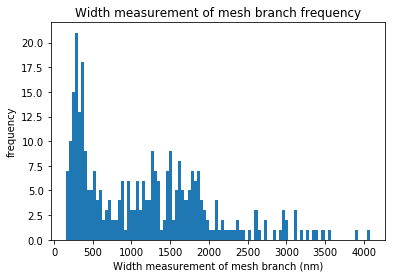

In [291]:
from matplotlib import pyplot as plt
fig,ax = plt.subplots(1,1)
bins = plt.hist(np.array(total_widths),bins=100)
ax.set_xlabel("Width measurement of mesh branch (nm)")
ax.set_ylabel("frequency")
ax.set_title("Width measurement of mesh branch frequency")
plt.show()

In [ ]:
sk.graph_skeleton_and_mesh(other_meshes=total_branch_meshes,
                          other_meshes_colors="random",
                          other_skeletons=total_branch_skeletons,
                          other_skeletons_colors="random",
                          html_path="two_soma_mesh_skeleton_decomp.html")

In [ ]:

sk.graph_skeleton_and_mesh(other_meshes=total_branch_meshes[:75],
                          other_meshes_colors="random",
                          other_skeletons=total_branch_skeletons[:75],
                          other_skeletons_colors="random",
                          html_path="two_soma_mesh_skeleton_decomp.html")

# Checking out the Spine Stuff

In [282]:
# Visualizing one mesh that as been completely labeled
# Visualizing one mesh that has been completely labeled
for check_index in range(55,75):
#check_index = 10
    print(f"check_index = {check_index}")
    print(f"divided_submeshes[check_index] = {len(total_branch_meshes[check_index].faces)}")
    print(f"The width = {total_widths[check_index]}")
    sk.graph_skeleton_and_mesh(
                                other_meshes=[total_branch_meshes[check_index]],
                              other_meshes_colors="black",
                               other_skeletons=[total_branch_skeletons[check_index]],
                               other_skeletons_colors="black")

check_index = 55
divided_submeshes[check_index] = 425
The width = 410.0326402127557


check_index = 56
divided_submeshes[check_index] = 13844
The width = 1381.4729696443833


check_index = 57
divided_submeshes[check_index] = 9054
The width = 1457.5057982261567


check_index = 58
divided_submeshes[check_index] = 10210
The width = 1655.0832539443818


check_index = 59
divided_submeshes[check_index] = 2787
The width = 1281.222630179517


check_index = 60
divided_submeshes[check_index] = 2181
The width = 1654.28033742761


check_index = 61
divided_submeshes[check_index] = 1659
The width = 1514.3596146996495


check_index = 62
divided_submeshes[check_index] = 611
The width = 313.46699100813976


check_index = 63
divided_submeshes[check_index] = 14296
The width = 1674.1010216570612


check_index = 64
divided_submeshes[check_index] = 241
The width = 685.7086082946676


check_index = 65
divided_submeshes[check_index] = 6919
The width = 1917.1703572717693


check_index = 66
divided_submeshes[check_index] = 1327
The width = 335.3710107830176


check_index = 67
divided_submeshes[check_index] = 2749
The width = 1862.6508357455086


check_index = 68
divided_submeshes[check_index] = 1633
The width = 532.3842317122679


check_index = 69
divided_submeshes[check_index] = 1388
The width = 1069.1301861314143


check_index = 70
divided_submeshes[check_index] = 29
The width = 3137.056297539393


check_index = 71
divided_submeshes[check_index] = 587
The width = 2196.6676106715167


check_index = 72
divided_submeshes[check_index] = 36
The width = 2606.8065055917295


check_index = 73
divided_submeshes[check_index] = 10780
The width = 892.8856622068515


check_index = 74
divided_submeshes[check_index] = 366
The width = 290.77587385858004


# Look at what clustering algorithm would look like on each of these segments

In [397]:
"""
Pseudocode: 
1) make sure the cgal temp folder exists
2) run the segmentation command
3) Read int csv 
4) Visualize the results using the graph function

"""
import cgal_Segmentation_Module as csm

clusters=2
smoothness = 0.03

from pathlib import Path
cgal_folder = Path("./cgal_temp")
if not cgal_folder.exists():
    cgal_folder.mkdir(parents=True,exist_ok=False)

check_index = 66
current_mesh = total_branch_meshes[check_index]

file_to_write = cgal_folder / Path(f"segment_{check_index}.off")

written_file_location = tu.write_neuron_off(current_mesh,file_to_write)

if written_file_location[-4:] == ".off":
    cgal_mesh_file = written_file_location[:-4]
else:
    cgal_mesh_file = written_file_location
    
print(f"Going to run cgal segmentation with:"
     f"\nFile: {cgal_mesh_file} \nclusters:{clusters} \nsmoothness:{smoothness}")
    
csm.cgal_segmentation(cgal_mesh_file,clusters,smoothness)

#read in the csv file
cgal_output_file = Path(cgal_mesh_file + "-cgal_" + str(np.round(clusters,2)) + "_" + "{:.2f}".format(smoothness) + ".csv" )

cgal_data = np.genfromtxt(str(cgal_output_file.absolute()), delimiter='\n')

#get a look at how many groups and what distribution:
from collections import Counter
print(f"Counter of data = {Counter(cgal_data)}")

split_meshes,split_meshes_idx = tu.split_mesh_into_face_groups(current_mesh,cgal_data,return_idx=True,
                               check_connect_comp = False)

split_meshes,split_meshes_idx
# plot the face mapping 
sk.graph_skeleton_and_mesh(other_meshes=[k for k in split_meshes.values()],
                          other_meshes_colors="random")

Going to run cgal segmentation with:
File: /notebooks/neuron_mesh_tools/meshAfterParty/development/cgal_temp/segment_66 
clusters:2 
smoothness:0.03
Counter of data = Counter({2.0: 437, 7.0: 326, 4.0: 177, 1.0: 103, 5.0: 102, 6.0: 94, 3.0: 81, 0.0: 6})


/usr/local/lib/python3.6/dist-packages/traittypes/traittypes.py:101: UserWarning: Given trait value dtype "float64" does not match required type "float64". A coerced copy has been created.
  np.dtype(self.dtype).name))


In [ ]:
"""
Pseudocode: 
1) make sure the cgal temp folder exists
2) run the segmentation command
3) Read int csv 
4) Visualize the results using the graph function

Notes on what worked well:
segment = 56: cluster=2,smoothness=0.03

"""
import cgal_Segmentation_Module as csm

clusters=2
smoothness = 0.03
check_index = 56

from pathlib import Path
cgal_folder = Path("./cgal_temp")
if not cgal_folder.exists():
    cgal_folder.mkdir(parents=True,exist_ok=False)


current_mesh = total_branch_meshes[check_index]

file_to_write = cgal_folder / Path(f"segment_{check_index}.off")

written_file_location = tu.write_neuron_off(current_mesh,file_to_write)

if written_file_location[-4:] == ".off":
    cgal_mesh_file = written_file_location[:-4]
else:
    cgal_mesh_file = written_file_location
    
print(f"Going to run cgal segmentation with:"
     f"\nFile: {cgal_mesh_file} \nclusters:{clusters} \nsmoothness:{smoothness}")
    
csm.cgal_segmentation(cgal_mesh_file,clusters,smoothness)

#read in the csv file
cgal_output_file = Path(cgal_mesh_file + "-cgal_" + str(np.round(clusters,2)) + "_" + "{:.2f}".format(smoothness) + ".csv" )

cgal_data = np.genfromtxt(str(cgal_output_file.absolute()), delimiter='\n')

#get a look at how many groups and what distribution:
from collections import Counter
print(f"Counter of data = {Counter(cgal_data)}")

split_meshes,split_meshes_idx = tu.split_mesh_into_face_groups(current_mesh,cgal_data,return_idx=True,
                               check_connect_comp = False)

split_meshes,split_meshes_idx
# plot the face mapping 
sk.graph_skeleton_and_mesh(other_meshes=[k for k in split_meshes.values()],
                          other_meshes_colors="random",
                           mesh_alpha=1)

In [283]:
sk.graph_skeleton_and_mesh(other_meshes=[k for k in split_meshes.values()],
                          other_meshes_colors="random",
                           mesh_alpha=1)

# if did just a width threshold on the segments to identify axon types

In [ ]:
threshold = 400
axon_meshes = np.where(np.array(total_widths) < threshold)[0]

sk.graph_skeleton_and_mesh(main_mesh_verts=current_neuron.vertices,
                           main_mesh_faces=current_neuron.faces,
                           main_mesh_color=[0.,1.,0.,0.1],
                    other_meshes=[total_branch_meshes[k] for k in axon_meshes],
                          other_meshes_colors="random",
                          other_skeletons=[total_branch_skeletons[k] for k in axon_meshes],
                          other_skeletons_colors="random",
                        
                          html_path=f"axon_meshes_{threshold}.html")

In [ ]:
"""
Pseudocode from here: 
0
0) Put the data into the Neuron class where has concept network, branches, limbs and somas
with all of their connectivity
1) Make sure these limbs can delete branches, do the autofilling algorithm to clean themselved up
2) Find the branches that are wierd and should be filtered away
3) Delete the wierd branches (make sure that still connected component) and run the autofill in algorithm
4) Develop the capabilities to export skeleton, labeled mesh, concept skeleton for: 
i) all neuron
ii) sobset of limbs
iii) subset of branches on subset of limbs....
"""

In [ ]:
"""
How to determine 

"""

# PART 3: LAST PART OF ANALYSIS WHERE MAKES CONCEPT GRAPHS

# determining the starting endpoint for limb

In [286]:
current_mesh_data[0]["soma_to_piece_connectivity"]

{0: [0, 1, 2, 3, 5, 10], 1: [1, 4, 6, 7, 8, 9]}

In [287]:
current_mesh_data[0]["soma_meshes"]

array([<trimesh.Trimesh(vertices.shape=(20481, 3), faces.shape=(40659, 3))>,
       <trimesh.Trimesh(vertices.shape=(14158, 3), faces.shape=(28309, 3))>],
      dtype=object)

In [217]:
sk.graph_skeleton_and_mesh(other_meshes=[curr_limb_divided_meshes[44]] + list(current_mesh_data[0]["soma_meshes"]),
                           other_meshes_colors="random")

/usr/local/lib/python3.6/dist-packages/traittypes/traittypes.py:101: UserWarning: Given trait value dtype "float64" does not match required type "float64". A coerced copy has been created.
  np.dtype(self.dtype).name))


In [227]:
current_mesh_data[0].keys()

dict_keys(['branch_meshes', 'soma_meshes', 'soma_to_piece_connectivity', 'branch_skeletons', 'branch_skeletons_cleaned'])

In [300]:
"""
Pseudocode: 
1) Get all of the meshes for that limb (that were decomposed)
2) Use the entire neuron, the soma meshes and the list of meshes and find out shich one is touching the soma
3) With the one that is touching the soma, find the enpoints of the skeleton
4) Find the closest matching endpoint
5) Send the deocmposed skeleton branches to the branches_to_concept_graph function
6) Graph the concept graph using the mesh centers
"""

tu = reload(tu)

limb_idx = 0
curr_limb_divided_meshes = [v["branch_mesh"] for v in limb_correspondence[limb_idx].values()]
#curr_limb_divided_meshes_idx = [v["branch_face_idx"] for v in limb_correspondence[limb_idx].values()]
curr_limb_divided_skeletons = [k["branch_skeleton"] for k in limb_correspondence[limb_idx].values()]

#find what mesh piece was touching
touching_soma_indexes = []
for k,v in current_mesh_data[0]["soma_to_piece_connectivity"].items():
    if limb_idx in v:
        touching_soma_indexes.append(k)
    
if len(touching_soma_indexes) >= 2:
    raise Exception("Merge limb detected")

soma_idx = touching_soma_indexes[0]
curr_soma_mesh = current_mesh_data[0]["soma_meshes"][soma_idx]

touching_pieces = tu.mesh_pieces_connectivity(main_mesh=current_neuron,
                            central_piece = curr_soma_mesh,
                            periphery_pieces = curr_limb_divided_meshes)
if len(touching_pieces) >= 2:
    raise Exception("More than one touching point to soma")
if len(touching_pieces) < 1:
    raise Exception("No touching pieces")


Total time for mesh mapping: 0.45693230628967285
Total time for mesh mapping: 0.1301412582397461
Total time for mesh mapping: 0.04503965377807617
Total time for mesh mapping: 0.06808090209960938
Total time for mesh mapping: 0.10612082481384277
Total time for mesh mapping: 0.05668282508850098
Total time for mesh mapping: 0.14809894561767578
Total time for mesh mapping: 0.06456828117370605
Total time for mesh mapping: 0.05447721481323242
Total time for mesh mapping: 0.17206335067749023
Total time for mesh mapping: 0.49091672897338867
Total time for mesh mapping: 0.041941165924072266
Total time for mesh mapping: 0.1515827178955078
Total time for mesh mapping: 0.15367460250854492
Total time for mesh mapping: 0.06595492362976074
Total time for mesh mapping: 0.06621289253234863
Total time for mesh mapping: 0.09574055671691895
Total time for mesh mapping: 0.15555024147033691
Total time for mesh mapping: 0.3750159740447998
Total time for mesh mapping: 0.20351409912109375
Total time for mesh ma

In [301]:
touching_pieces

[44]

In [302]:
#3) With the one that is touching the soma, find the enpoints of the skeleton
from neuron import Branch
touching_branch = Branch(curr_limb_divided_skeletons[touching_pieces[0]])
endpoints = touching_branch.endpoints
soma_midpoint = np.mean(curr_soma_mesh.vertices,axis=0)

#4) Find the closest matching endpoint
closest_idx = np.argmin([np.linalg.norm(soma_midpoint-k) for k in endpoints])
closest_endpoint = endpoints[closest_idx]

#check that it is the closest midpoint
sk.graph_skeleton_and_mesh(other_skeletons=[touching_branch.skeleton],
                          other_scatter=closest_endpoint.reshape(-1,3),
                          other_meshes=[curr_soma_mesh],
                           scatter_size=3
                          )

/usr/local/lib/python3.6/dist-packages/traittypes/traittypes.py:101: UserWarning: Given trait value dtype "float64" does not match required type "float64". A coerced copy has been created.
  np.dtype(self.dtype).name))


edge_endpoints_to_process was empty so exiting loop after 73 iterations
Total time for branches to concept conversion = 0.33810877799987793



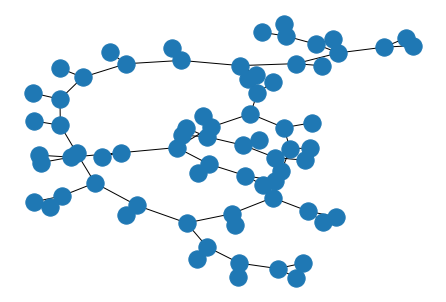

In [303]:
#5) Send the deocmposed skeleton branches to the branches_to_concept_graph function
curr_limb_concept_graph = sk.branches_to_concept_graph(curr_limb_divided_skeletons,closest_endpoint)
nx.draw(concept_graph)

# --- Showing off the new concept map --

In [304]:
sk = reload(sk)
mu = reload(mu)
random_colors_used = sk.graph_skeleton_and_mesh(other_meshes=curr_limb_divided_meshes + [curr_soma_mesh],
                          other_meshes_colors="random",
                          other_skeletons=curr_limb_divided_skeletons,
                          other_skeletons_colors="random",
                            mesh_alpha=0.2,
                          return_other_colors=True)
random_colors_used_no_alpha = random_colors_used[:,:-1]

In [305]:
# Try plotting the points in 3D: random_colors_used = sk.graph_skeleton_and_mesh(other_meshes=total_branch_meshes[:node_to_check_to],
mesh_midpoints =  [np.array([np.mean(k.vertices,axis=0)]) for k in curr_limb_divided_meshes]
graph_nodes_skeleton = np.array(mesh_midpoints)[concept_graph.edges_ordered()].reshape(-1,2,3)
#[k for k in graph_nodes_skeleton]
random_colors_used_saved = random_colors_used.copy()
random_colors_used[:,-1] = 1


sk.graph_skeleton_and_mesh(other_meshes=curr_limb_divided_meshes + [curr_soma_mesh],
                           other_meshes_colors=random_colors_used_saved,
                          other_scatter=mesh_midpoints,
                          other_scatter_colors=random_colors_used,
                          other_skeletons=graph_nodes_skeleton,
                           mesh_alpha=0.4,
                          other_skeletons_colors="black",
                                               scatter_size=0.5,
                          html_path="mesh_with_concept_overlay.html")

In [306]:
sk.graph_skeleton_and_mesh(other_meshes=[curr_soma_mesh],
                           other_meshes_colors=random_colors_used_saved,
                          other_scatter=mesh_midpoints,
                          other_scatter_colors=random_colors_used,
                          other_skeletons=graph_nodes_skeleton,
                           mesh_alpha=0.4,
                          other_skeletons_colors="black",
                                               scatter_size=0.5,
                          html_path="concept_overlay_alone.html")

In [312]:
current_mesh_data[0].keys()

dict_keys(['branch_meshes', 'soma_meshes', 'soma_to_piece_connectivity', 'branch_skeletons', 'branch_skeletons_cleaned'])

In [314]:
limb_correspondence[0].keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72])

In [341]:
# sk.graph_skeleton_and_mesh(other_meshes = [current_neuron,limb_correspondence[10][0]["branch_mesh"]],
#                            other_meshes_colors=["black","red"])

In [374]:
limb_idx_to_mesh_dict = [1,3,10]
limb_idx_to_branch_skeletons_dict = [1,3,10]


set(list(limb_idx_to_mesh_dict)) == set(list(limb_idx_to_branch_skeletons_dict))

True

In [378]:
# """
# converting process to function:

# Things it needs: 
# - branch_mehses
# - branch skeletons
# - soma meshes
# - whole neuron
# - soma_to_piece_connectivity

# What it returns:
# - concept networks
# - branch labels



# """

# tu = reload(tu)
# sk = reload(sk)
# xu = reload(xu)

# def generate_limb_concept_networks_from_global_connectivity(
#     limb_idx_to_branch_meshes_dict,
#     limb_idx_to_branch_skeletons_dict,
#     soma_idx_to_mesh_dict,
#     soma_idx_connectivity,
#     current_neuron,
#     return_limb_labels=True
#     ):
    
#     if set(list(limb_idx_to_mesh_dict.keys())) != set(list(limb_idx_to_branch_skeletons_dict.keys())):
#         raise Exception("There was a difference in the keys for the limb_idx_to_mesh_dict and limb_idx_to_branch_skeletons_dict")
        
#     global_concept_time = time.time()
    
#     total_limb_concept_networks = dict()
#     total_limb_labels = dict()
#     for limb_idx in limb_idx_to_mesh_dict.keys():
        
#         local_concept_time = time.time()
#         print(f"\n\n------Working on limb {limb_idx} -------")
#         curr_concept_network = dict()
        
#         curr_limb_divided_meshes = limb_idx_to_branch_meshes_dict[limb_idx]
#         #curr_limb_divided_meshes_idx = [v["branch_face_idx"] for v in limb_correspondence[limb_idx].values()]
#         curr_limb_divided_skeletons = limb_idx_to_branch_skeletons_dict[limb_idx]
        
#         #find what mesh piece was touching
#         touching_soma_indexes = []
#         for k,v in soma_idx_connectivity.items():
#             if limb_idx in v:
#                 touching_soma_indexes.append(k)
        
#         if len(touching_soma_indexes) == 0:
#             raise Exception("Did not find touching soma index")
#         if len(touching_soma_indexes) >= 2:
#             print("Merge limb detected")
            
#         for soma_idx in touching_soma_indexes:
#             curr_soma_mesh = soma_idx_to_mesh_dict[soma_idx]

#             touching_pieces = tu.mesh_pieces_connectivity(main_mesh=current_neuron,
#                                         central_piece = curr_soma_mesh,
#                                         periphery_pieces = curr_limb_divided_meshes)
#             if len(touching_pieces) >= 2:
#                 raise Exception("More than one touching point to soma")
#             if len(touching_pieces) < 1:
#                 raise Exception("No touching pieces")
                
#             #3) With the one that is touching the soma, find the enpoints of the skeleton
#             from neuron import Branch
#             touching_branch = Branch(curr_limb_divided_skeletons[touching_pieces[0]])
#             endpoints = touching_branch.endpoints
#             soma_midpoint = np.mean(curr_soma_mesh.vertices,axis=0)

#             #4) Find the closest matching endpoint
#             closest_idx = np.argmin([np.linalg.norm(soma_midpoint-k) for k in endpoints])
#             closest_endpoint = endpoints[closest_idx]
            
#             curr_limb_concept_graph = sk.branches_to_concept_graph(curr_limb_divided_skeletons,closest_endpoint)
#             curr_concept_network[soma_idx] = curr_limb_concept_graph


#         total_limb_concept_networks[limb_idx] = curr_concept_network
        
#         if len(curr_concept_network) > 1:
#             total_limb_labels[limb_idx] = "MergeError"
#         else:
#             total_limb_labels[limb_idx] = "Normal"
            
#         print(f"Local time for concept mapping = {time.time() - local_concept_time}")

#     print(f"Total time for concept mapping = {time.time() - global_concept_time}")
        
        
#     #returning from the function    
        
#     if return_limb_labels:
#         return total_limb_concept_networks,total_limb_labels
#     else:
#         return total_limb_concept_networks

In [390]:
print(k)
limb_correspondence[k].keys()

3


dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41])

In [396]:
import neuron
neuron = reload(neuron)

#getting mesh and skeleton dictionaries
limb_idx_to_branch_meshes_dict = dict()
limb_idx_to_branch_skeletons_dict = dict()
for k in limb_correspondence.keys():
    limb_idx_to_branch_meshes_dict[k] = [limb_correspondence[k][j]["branch_mesh"] for j in limb_correspondence[k].keys()]
    limb_idx_to_branch_skeletons_dict[k] = [limb_correspondence[k][j]["branch_skeleton"] for j in limb_correspondence[k].keys()]      

#getting the soma dictionaries
soma_idx_to_mesh_dict = dict()
for k,v in enumerate(current_mesh_data[0]["soma_meshes"]):
    soma_idx_to_mesh_dict[k] = v

soma_idx_connectivity = current_mesh_data[0]["soma_to_piece_connectivity"]


limb_concept_networkx,limb_labels = neuron.generate_limb_concept_networks_from_global_connectivity(
    limb_idx_to_branch_meshes_dict = limb_idx_to_branch_meshes_dict,
    limb_idx_to_branch_skeletons_dict = limb_idx_to_branch_skeletons_dict,
    soma_idx_to_mesh_dict = soma_idx_to_mesh_dict,
    soma_idx_connectivity = soma_idx_connectivity,
    current_neuron=current_neuron,
    return_limb_labels=True
    )



------Working on limb 0 -------
At the start, starting_node = [48]
edge_endpoints_to_process was empty so exiting loop after 73 iterations
starting_node = [48]
Total time for branches to concept conversion = 0.3078625202178955

Local time for concept mapping = 12.111968278884888


------Working on limb 1 -------
Merge limb detected
At the start, starting_node = [10]
edge_endpoints_to_process was empty so exiting loop after 47 iterations
starting_node = [10]
Total time for branches to concept conversion = 0.2228548526763916

At the start, starting_node = [44]
edge_endpoints_to_process was empty so exiting loop after 47 iterations
starting_node = [44]
Total time for branches to concept conversion = 0.2217254638671875

Local time for concept mapping = 14.283888339996338


------Working on limb 2 -------
At the start, starting_node = [0]
edge_endpoints_to_process was empty so exiting loop after 51 iterations
starting_node = [0]
Total time for branches to concept conversion = 0.1654968261

In [357]:
# Compiling the concept maps for all limbs (some may have multiple if touching different somas --> and label as merge branch)

"""
Pseudocode: 
1) Get all of the meshes for that limb (that were decomposed)
2) Use the entire neuron, the soma meshes and the list of meshes and find out shich one is touching the soma
3) With the one that is touching the soma, find the enpoints of the skeleton
4) Find the closest matching endpoint
5) Send the deocmposed skeleton branches to the branches_to_concept_graph function
6) Graph the concept graph using the mesh centers

Goals: 
1) Find concept skeleton for every branch
2) Classify every branch as a merge branch or not
** put these in the current_mesh_data
"""
global_concept_time = time.time()

tu = reload(tu)
sk = reload(sk)
xu = reload(xu)
current_mesh_data[0]["branch_concept_networks"] = [] #will hold the concept maps that are pre-computed
current_mesh_data[0]["branch_label"] = [] #will have if merge branch or not

for limb_idx in limb_correspondence.keys():
    local_concept_time = time.time()
    print(f"\n\n------Working on limb {limb_idx} -------")
    curr_concept_network = dict()
    
    curr_limb_divided_meshes = [v["branch_mesh"] for v in limb_correspondence[limb_idx].values()]
    #curr_limb_divided_meshes_idx = [v["branch_face_idx"] for v in limb_correspondence[limb_idx].values()]
    curr_limb_divided_skeletons = [k["branch_skeleton"] for k in limb_correspondence[limb_idx].values()]

    #find what mesh piece was touching
    touching_soma_indexes = []
    for k,v in current_mesh_data[0]["soma_to_piece_connectivity"].items():
        if limb_idx in v:
            touching_soma_indexes.append(k)

    if len(touching_soma_indexes) == 0:
        raise Exception("Did not find touching soma index")
    if len(touching_soma_indexes) >= 2:
        print("Merge limb detected")

    for soma_idx in touching_soma_indexes:
        curr_soma_mesh = current_mesh_data[0]["soma_meshes"][soma_idx]

        touching_pieces = tu.mesh_pieces_connectivity(main_mesh=current_neuron,
                                    central_piece = curr_soma_mesh,
                                    periphery_pieces = curr_limb_divided_meshes)
        if len(touching_pieces) >= 2:
            raise Exception("More than one touching point to soma")
        if len(touching_pieces) < 1:
            raise Exception("No touching pieces")

            
        #3) With the one that is touching the soma, find the enpoints of the skeleton
        from neuron import Branch
        touching_branch = Branch(curr_limb_divided_skeletons[touching_pieces[0]])
        endpoints = touching_branch.endpoints
        soma_midpoint = np.mean(curr_soma_mesh.vertices,axis=0)

        #4) Find the closest matching endpoint
        closest_idx = np.argmin([np.linalg.norm(soma_midpoint-k) for k in endpoints])
        closest_endpoint = endpoints[closest_idx]

        #check that it is the closest midpoint
#         sk.graph_skeleton_and_mesh(other_skeletons=[touching_branch.skeleton],
#                                   other_scatter=closest_endpoint.reshape(-1,3),
#                                   other_meshes=[curr_soma_mesh],
#                                    scatter_size=3
#                                   )

        curr_limb_concept_graph = sk.branches_to_concept_graph(curr_limb_divided_skeletons,closest_endpoint)
        curr_concept_network[soma_idx] = curr_limb_concept_graph
    current_mesh_data[0]["branch_concept_networks"].append(curr_concept_network)
    if len(curr_concept_network) > 1:
        current_mesh_data[0]["branch_label"].append("MergeError")
    else:
        current_mesh_data[0]["branch_label"].append("Normal")
    print(f"Local time for concept mapping = {time.time() - local_concept_time}")
        
print(f"Total time for concept mapping = {time.time() - global_concept_time}")



------Working on limb 0 -------
At the start, starting_node = [48]
edge_endpoints_to_process was empty so exiting loop after 73 iterations
starting_node = [48]
Total time for branches to concept conversion = 0.32949376106262207

Local time for concept mapping = 12.126757144927979


------Working on limb 1 -------
Merge limb detected
At the start, starting_node = [10]
edge_endpoints_to_process was empty so exiting loop after 47 iterations
starting_node = [10]
Total time for branches to concept conversion = 0.22495341300964355

At the start, starting_node = [44]
edge_endpoints_to_process was empty so exiting loop after 47 iterations
starting_node = [44]
Total time for branches to concept conversion = 0.22518372535705566

Local time for concept mapping = 14.195569276809692


------Working on limb 2 -------
At the start, starting_node = [0]
edge_endpoints_to_process was empty so exiting loop after 51 iterations
starting_node = [0]
Total time for branches to concept conversion = 0.1603381

In [358]:
current_mesh_data[0]["soma_to_piece_connectivity"]

{0: [0, 1, 2, 3, 5, 10], 1: [1, 4, 6, 7, 8, 9]}

In [359]:
current_mesh_data[0]["branch_label"]

['Normal',
 'MergeError',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal']

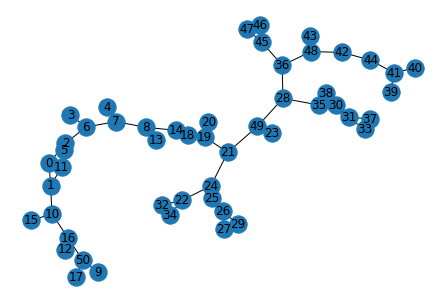

In [368]:
test_limb = 2
nx.draw(current_mesh_data[0]["branch_concept_networks"][test_limb][0],with_labels=True)

# -----creating a concept network for each limb (BUT NEED THE STARTING NODE TO DO THIS)-----

edge_endpoints_to_process was empty so exiting loop after 10 iterations
Total time for branches to concept conversion = 0.06314969062805176



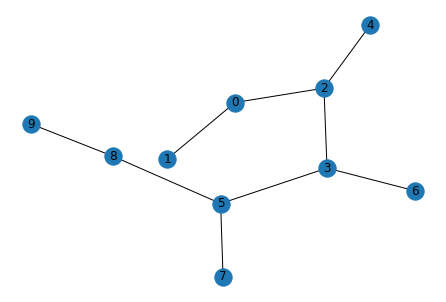

In [22]:
limb_idx = 0
divided_branches = [limb_correspondence[limb_idx][k]["branch_skeleton"] for k in limb_correspondence[limb_idx]]

xu = reload(xu)
sk = reload(sk)

node_to_check_to = 10

starting_coordinate = np.array([ 513037.3, 1056063. ,  906505.2])
concept_graph = sk.branches_to_concept_graph(divided_branches[:node_to_check_to],starting_coordinate)
nx.draw(concept_graph,with_labels=True)

# finding the branches of the decomposition that should not be included

In [ ]:
# check the parts that have that ratio
width_to_face_ratio = 500/100

wierd_meshes = []
for k in limb_correspondence[limb_idx]:
    curr_width = limb_correspondence[limb_idx][k]["width_from_skeleton"]
    curr_face_count = len(divided_submeshes[k].faces)
    if curr_width/curr_face_count > width_to_face_ratio:
        wierd_meshes.append(k)
    
wierd_meshes #could then eliminate them if endpoints

limb_graph_degree_1 = xu.get_nodes_of_degree_k(limb_graph,1)
print(f"wierd_meshes before = {wierd_meshes}")
set(wierd_meshes).intersection(set(limb_graph_degree_1))

# Plotting for visualizataions (used for platinum update report)

In [25]:
sk = reload(sk)
mu = reload(mu)
random_colors_used = sk.graph_skeleton_and_mesh(other_meshes=total_branch_meshes[:node_to_check_to],
                          other_meshes_colors="random",
                          other_skeletons=divided_branches[:node_to_check_to],
                          other_skeletons_colors="random",
                            mesh_alpha=0.8,
                          return_other_colors=True)
random_colors_used_no_alpha = random_colors_used[:,:-1]

/usr/local/lib/python3.6/dist-packages/traittypes/traittypes.py:101: UserWarning: Given trait value dtype "float64" does not match required type "float64". A coerced copy has been created.
  np.dtype(self.dtype).name))


In [26]:
sk = reload(sk)
mu = reload(mu)
sk.graph_skeleton_and_mesh(#other_meshes=total_branch_meshes[:node_to_check_to],
                          #other_meshes_colors="random",
                          other_skeletons=divided_branches[:node_to_check_to],
                          other_skeletons_colors="random",
                            mesh_alpha=0.05)


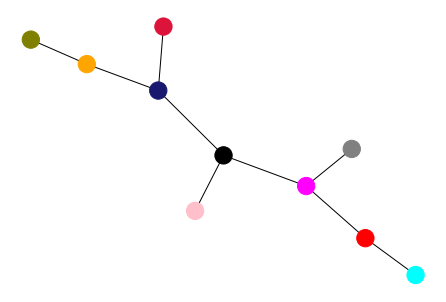

In [27]:
# plotting the concept network with the same colors
nx.draw(concept_graph,node_color=random_colors_used_no_alpha) 

In [29]:
# Try plotting the points in 3D: random_colors_used = sk.graph_skeleton_and_mesh(other_meshes=total_branch_meshes[:node_to_check_to],
mesh_midpoints =  [np.array([np.mean(k.vertices,axis=0)]) for k in total_branch_meshes[:node_to_check_to]]
graph_nodes_skeleton = np.array(mesh_midpoints)[concept_graph.edges_ordered()].reshape(-1,2,3)
[k for k in graph_nodes_skeleton]
random_colors_used[:,-1] = 1


sk.graph_skeleton_and_mesh(other_scatter=mesh_midpoints,
                          other_scatter_colors=random_colors_used,
                          other_skeletons=graph_nodes_skeleton,
                          other_skeletons_colors="black",
                                               scatter_size=3)

